### Linear Algebra, Calculus, and Gradient Descent

#### Objectives
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">

It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Recommendation engines are able to make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "./resources/netflix.png">

### Group 1: using code to explain vectors and scalars

In [ ]:
import numpy as np

## Vectors

An array with magnitude and direction. The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin.


Operations with vectores
Assume

$ \vec{v} = \begin{bmatrix}v_{1} \\v_{2}\end{bmatrix} $


$ \vec{w} = \begin{bmatrix}w_{1} \\w_{2}\end{bmatrix} $

$ \vec{v} + \vec{w} = \begin{bmatrix}v_{1} + w_{1} \\v_{2} + w_{2}\end{bmatrix} $

What is happening graphically? Let's look at an example:


In [ ]:

import numpy as np
v = np.array([2, 4])
w = np.array([3, 2])
v + w

#### Scalars

Have magnitude only. Can be multiplied by a vector or matrix to create a change in **scale** and/or direction.

What scalars would you need to change the direction of a vector?

In [ ]:
v * 4

### Group 2: Desmos to explore vectors and scalars

[link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)

To capture the relationship between (*a, b*), to capture the _direction_ rather than the length, what mathematical concept would you use?

### Group 3: Youtube vid

[Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Linear Combination
If $v_{1},...,v_{n}$ are vectors and $a_{1},...,a_{n}$ are scalars, then the linear combination of those vectors with those scalars as coefficients is

<img src = "./resources/linear_combinations.svg"> 

### Dot Product

Can be thought of as one vector projected onto another

The dot product of v and w is $v \cdot w = (v_{1})(w_{2}) + (v_{1})(v_{2}) $

### _**Details of dot product for those who are interested**_

If v and w are perpendicular ($90^\circ$), their dot product will be 0.

If the angle between v and w is < $90^\circ$, the dot product will be positive.

If the angle between v and w is between $90^\circ$ and $180^\circ$, the dot product will be negative.





“The scalar projection of A onto B multiplied by the magnitude of B”

“The scalar projection of B onto A multiplied by the magnitude of A”

<img src = "./resources/dot_product.png">

<img src = "./resources/dot_product_components.png">

We are essentially, rotating vectors to the point of 
a · b = |a| × |b| × cos(θ)

Analogy from https://www.youtube.com/watch?v=FrDAU2N0FEg

In [ ]:
v.dot(w)

## Application of dot product:

Imagine you are an e-commerce company. You have vectors to represent the transactions made with one of your items. Q is the quantity and represent the amount of cash either bought or sold.

$ Income = (q_{1},q_{2},q_{3})\cdot (p_{1},p_{2},p_{3}) $

What story is this telling?

In [ ]:
q = np.array([4,6,10])
p = np.array([50,-30,45])

q.dot(p)

Wait, does that look familiar somehow?

## Slide break!

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

**Good video on details of gradient decent**

https://www.youtube.com/watch?v=sDv4f4s2SB8

### Gradient Descent


[slide deck!](https://docs.google.com/presentation/d/15sZl0yjwrjXkOSftImmAlEOgJxB7Qc8e2vocvMUkRWI/edit?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [3]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

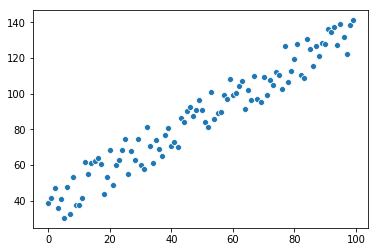

In [4]:
sns.scatterplot(x=x[:,1], y=y)

In [5]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

Iteration 0 | Cost: 190.601595
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 190.592590
[1.90687047 1.53452779]
Iteration 2 | Cost: 190.583937
[1.9077877  1.53470001]
Iteration 3 | Cost: 190.575444
[1.90870399 1.53481115]
Iteration 4 | Cost: 190.567022
[1.90961963 1.53488126]
Iteration 5 | Cost: 190.558633
[1.91053484 1.53492381]
Iteration 6 | Cost: 190.550259
[1.91144974 1.53494786]
Iteration 7 | Cost: 190.541893
[1.91236443 1.53495949]
Iteration 8 | Cost: 190.533529
[1.91327898 1.53496277]
Iteration 9 | Cost: 190.525168
[1.91419341 1.53496045]
Iteration 10 | Cost: 190.516807
[1.91510777 1.53495436]
Iteration 11 | Cost: 190.508447
[1.91602206 1.53494575]
Iteration 12 | Cost: 190.500088
[1.91693631 1.53493543]
Iteration 13 | Cost: 190.491729
[1.91785051 1.53492398]
Iteration 14 | Cost: 190.483370
[1.91876468 1.53491177]
Iteration 15 | Cost: 190.475012
[1.91967882 1.53489904]
Iteration 16 | Cost: 190.466655
[1.92059293 1.53488596]
Iteration 17 | Cost: 190.458298
[1.92150702 1.53487265]
It

Iteration 202 | Cost: 188.919495
[2.09021293 1.53233012]
Iteration 203 | Cost: 188.911217
[2.09112271 1.5323164 ]
Iteration 204 | Cost: 188.902938
[2.09203246 1.53230269]
Iteration 205 | Cost: 188.894661
[2.09294219 1.53228897]
Iteration 206 | Cost: 188.886383
[2.09385189 1.53227526]
Iteration 207 | Cost: 188.878106
[2.09476157 1.53226154]
Iteration 208 | Cost: 188.869830
[2.09567123 1.53224783]
Iteration 209 | Cost: 188.861553
[2.09658087 1.53223411]
Iteration 210 | Cost: 188.853278
[2.09749048 1.5322204 ]
Iteration 211 | Cost: 188.845002
[2.09840007 1.53220669]
Iteration 212 | Cost: 188.836728
[2.09930963 1.53219297]
Iteration 213 | Cost: 188.828453
[2.10021918 1.53217926]
Iteration 214 | Cost: 188.820179
[2.1011287  1.53216555]
Iteration 215 | Cost: 188.811905
[2.10203819 1.53215184]
Iteration 216 | Cost: 188.803632
[2.10294767 1.53213813]
Iteration 217 | Cost: 188.795359
[2.10385712 1.53212441]
Iteration 218 | Cost: 188.787087
[2.10476655 1.5321107 ]
Iteration 219 | Cost: 188.77881

Iteration 469 | Cost: 186.723944
[2.3323047  1.52868021]
Iteration 470 | Cost: 186.715776
[2.33320833 1.52866659]
Iteration 471 | Cost: 186.707610
[2.33411194 1.52865297]
Iteration 472 | Cost: 186.699443
[2.33501553 1.52863934]
Iteration 473 | Cost: 186.691277
[2.33591909 1.52862572]
Iteration 474 | Cost: 186.683112
[2.33682263 1.5286121 ]
Iteration 475 | Cost: 186.674946
[2.33772615 1.52859848]
Iteration 476 | Cost: 186.666782
[2.33862964 1.52858486]
Iteration 477 | Cost: 186.658617
[2.33953311 1.52857123]
Iteration 478 | Cost: 186.650453
[2.34043656 1.52855761]
Iteration 479 | Cost: 186.642290
[2.34133999 1.52854399]
Iteration 480 | Cost: 186.634127
[2.34224339 1.52853037]
Iteration 481 | Cost: 186.625964
[2.34314677 1.52851675]
Iteration 482 | Cost: 186.617802
[2.34405013 1.52850313]
Iteration 483 | Cost: 186.609640
[2.34495346 1.52848951]
Iteration 484 | Cost: 186.601478
[2.34585677 1.5284759 ]
Iteration 485 | Cost: 186.593317
[2.34676006 1.52846228]
Iteration 486 | Cost: 186.58515

Iteration 691 | Cost: 184.920942
[2.53234957 1.52566423]
Iteration 692 | Cost: 184.912866
[2.53324813 1.52565068]
Iteration 693 | Cost: 184.904791
[2.53414666 1.52563714]
Iteration 694 | Cost: 184.896716
[2.53504517 1.52562359]
Iteration 695 | Cost: 184.888641
[2.53594366 1.52561004]
Iteration 696 | Cost: 184.880567
[2.53684212 1.5255965 ]
Iteration 697 | Cost: 184.872493
[2.53774056 1.52558295]
Iteration 698 | Cost: 184.864420
[2.53863898 1.52556941]
Iteration 699 | Cost: 184.856347
[2.53953738 1.52555586]
Iteration 700 | Cost: 184.848275
[2.54043575 1.52554232]
Iteration 701 | Cost: 184.840203
[2.54133411 1.52552877]
Iteration 702 | Cost: 184.832131
[2.54223243 1.52551523]
Iteration 703 | Cost: 184.824060
[2.54313074 1.52550169]
Iteration 704 | Cost: 184.815989
[2.54402902 1.52548814]
Iteration 705 | Cost: 184.807918
[2.54492728 1.5254746 ]
Iteration 706 | Cost: 184.799848
[2.54582552 1.52546106]
Iteration 707 | Cost: 184.791779
[2.54672373 1.52544752]
Iteration 708 | Cost: 184.78370

Iteration 935 | Cost: 182.962553
[2.75092283 1.5223689 ]
Iteration 936 | Cost: 182.954577
[2.75181584 1.52235544]
Iteration 937 | Cost: 182.946601
[2.75270883 1.52234197]
Iteration 938 | Cost: 182.938625
[2.75360179 1.52232851]
Iteration 939 | Cost: 182.930650
[2.75449474 1.52231505]
Iteration 940 | Cost: 182.922675
[2.75538766 1.52230159]
Iteration 941 | Cost: 182.914701
[2.75628056 1.52228812]
Iteration 942 | Cost: 182.906727
[2.75717343 1.52227466]
Iteration 943 | Cost: 182.898754
[2.75806628 1.5222612 ]
Iteration 944 | Cost: 182.890780
[2.75895911 1.52224774]
Iteration 945 | Cost: 182.882808
[2.75985192 1.52223428]
Iteration 946 | Cost: 182.874835
[2.7607447  1.52222082]
Iteration 947 | Cost: 182.866863
[2.76163746 1.52220736]
Iteration 948 | Cost: 182.858892
[2.7625302 1.5221939]
Iteration 949 | Cost: 182.850921
[2.76342292 1.52218044]
Iteration 950 | Cost: 182.842950
[2.76431561 1.52216698]
Iteration 951 | Cost: 182.834980
[2.76520828 1.52215353]
Iteration 952 | Cost: 182.827010


Iteration 1179 | Cost: 181.028263
[2.96814716 1.51909391]
Iteration 1180 | Cost: 181.020385
[2.96903466 1.51908053]
Iteration 1181 | Cost: 181.012507
[2.96992214 1.51906715]
Iteration 1182 | Cost: 181.004629
[2.9708096  1.51905377]
Iteration 1183 | Cost: 180.996752
[2.97169703 1.51904039]
Iteration 1184 | Cost: 180.988876
[2.97258444 1.51902701]
Iteration 1185 | Cost: 180.980999
[2.97347182 1.51901363]
Iteration 1186 | Cost: 180.973124
[2.97435919 1.51900025]
Iteration 1187 | Cost: 180.965248
[2.97524653 1.51898687]
Iteration 1188 | Cost: 180.957373
[2.97613385 1.5189735 ]
Iteration 1189 | Cost: 180.949498
[2.97702115 1.51896012]
Iteration 1190 | Cost: 180.941624
[2.97790842 1.51894674]
Iteration 1191 | Cost: 180.933750
[2.97879567 1.51893337]
Iteration 1192 | Cost: 180.925877
[2.9796829  1.51891999]
Iteration 1193 | Cost: 180.918004
[2.98057011 1.51890661]
Iteration 1194 | Cost: 180.910131
[2.98145729 1.51889324]
Iteration 1195 | Cost: 180.902259
[2.98234446 1.51887986]
Iteration 1196

Iteration 1475 | Cost: 178.713669
[3.2298664  1.51514809]
Iteration 1476 | Cost: 178.705908
[3.23074726 1.51513481]
Iteration 1477 | Cost: 178.698148
[3.2316281  1.51512153]
Iteration 1478 | Cost: 178.690388
[3.23250891 1.51510825]
Iteration 1479 | Cost: 178.682628
[3.2333897  1.51509497]
Iteration 1480 | Cost: 178.674869
[3.23427047 1.51508169]
Iteration 1481 | Cost: 178.667110
[3.23515122 1.51506841]
Iteration 1482 | Cost: 178.659352
[3.23603195 1.51505513]
Iteration 1483 | Cost: 178.651594
[3.23691265 1.51504185]
Iteration 1484 | Cost: 178.643836
[3.23779333 1.51502858]
Iteration 1485 | Cost: 178.636079
[3.23867399 1.5150153 ]
Iteration 1486 | Cost: 178.628322
[3.23955463 1.51500202]
Iteration 1487 | Cost: 178.620565
[3.24043524 1.51498875]
Iteration 1488 | Cost: 178.612809
[3.24131583 1.51497547]
Iteration 1489 | Cost: 178.605054
[3.2421964  1.51496219]
Iteration 1490 | Cost: 178.597298
[3.24307695 1.51494892]
Iteration 1491 | Cost: 178.589543
[3.24395747 1.51493564]
Iteration 1492

Iteration 1693 | Cost: 177.031095
[3.42136613 1.51226093]
Iteration 1694 | Cost: 177.023420
[3.42224213 1.51224773]
Iteration 1695 | Cost: 177.015745
[3.42311811 1.51223452]
Iteration 1696 | Cost: 177.008070
[3.42399406 1.51222131]
Iteration 1697 | Cost: 177.000396
[3.42487    1.51220811]
Iteration 1698 | Cost: 176.992722
[3.42574591 1.5121949 ]
Iteration 1699 | Cost: 176.985048
[3.4266218 1.5121817]
Iteration 1700 | Cost: 176.977375
[3.42749767 1.51216849]
Iteration 1701 | Cost: 176.969703
[3.42837351 1.51215529]
Iteration 1702 | Cost: 176.962030
[3.42924934 1.51214208]
Iteration 1703 | Cost: 176.954358
[3.43012514 1.51212888]
Iteration 1704 | Cost: 176.946687
[3.43100092 1.51211567]
Iteration 1705 | Cost: 176.939016
[3.43187667 1.51210247]
Iteration 1706 | Cost: 176.931345
[3.43275241 1.51208927]
Iteration 1707 | Cost: 176.923675
[3.43362812 1.51207607]
Iteration 1708 | Cost: 176.916005
[3.43450381 1.51206286]
Iteration 1709 | Cost: 176.908335
[3.43537948 1.51204966]
Iteration 1710 |

[3.61703628 1.5093109 ]
Iteration 1918 | Cost: 175.313902
[3.61790732 1.50929777]
Iteration 1919 | Cost: 175.306314
[3.61877833 1.50928464]
Iteration 1920 | Cost: 175.298726
[3.61964932 1.50927151]
Iteration 1921 | Cost: 175.291139
[3.6205203  1.50925838]
Iteration 1922 | Cost: 175.283552
[3.62139124 1.50924525]
Iteration 1923 | Cost: 175.275965
[3.62226217 1.50923212]
Iteration 1924 | Cost: 175.268378
[3.62313307 1.50921899]
Iteration 1925 | Cost: 175.260793
[3.62400396 1.50920586]
Iteration 1926 | Cost: 175.253207
[3.62487481 1.50919273]
Iteration 1927 | Cost: 175.245622
[3.62574565 1.5091796 ]
Iteration 1928 | Cost: 175.238037
[3.62661647 1.50916647]
Iteration 1929 | Cost: 175.230452
[3.62748726 1.50915334]
Iteration 1930 | Cost: 175.222868
[3.62835803 1.50914021]
Iteration 1931 | Cost: 175.215285
[3.62922878 1.50912708]
Iteration 1932 | Cost: 175.207701
[3.63009951 1.50911396]
Iteration 1933 | Cost: 175.200119
[3.63097021 1.50910083]
Iteration 1934 | Cost: 175.192536
[3.6318409 1.5

Iteration 2167 | Cost: 173.436257
[3.83410903 1.5060382 ]
Iteration 2168 | Cost: 173.428764
[3.83497455 1.50602515]
Iteration 2169 | Cost: 173.421272
[3.83584006 1.5060121 ]
Iteration 2170 | Cost: 173.413779
[3.83670555 1.50599905]
Iteration 2171 | Cost: 173.406287
[3.83757101 1.505986  ]
Iteration 2172 | Cost: 173.398796
[3.83843645 1.50597296]
Iteration 2173 | Cost: 173.391305
[3.83930187 1.50595991]
Iteration 2174 | Cost: 173.383814
[3.84016727 1.50594686]
Iteration 2175 | Cost: 173.376324
[3.84103264 1.50593381]
Iteration 2176 | Cost: 173.368834
[3.841898   1.50592077]
Iteration 2177 | Cost: 173.361344
[3.84276333 1.50590772]
Iteration 2178 | Cost: 173.353855
[3.84362864 1.50589468]
Iteration 2179 | Cost: 173.346366
[3.84449393 1.50588163]
Iteration 2180 | Cost: 173.338878
[3.84535919 1.50586858]
Iteration 2181 | Cost: 173.331390
[3.84622444 1.50585554]
Iteration 2182 | Cost: 173.323902
[3.84708966 1.5058425 ]
Iteration 2183 | Cost: 173.316415
[3.84795486 1.50582945]
Iteration 2184

[4.04894919 1.50279915]
Iteration 2417 | Cost: 171.574788
[4.04980926 1.50278618]
Iteration 2418 | Cost: 171.567389
[4.05066932 1.50277322]
Iteration 2419 | Cost: 171.559991
[4.05152936 1.50276025]
Iteration 2420 | Cost: 171.552593
[4.05238937 1.50274729]
Iteration 2421 | Cost: 171.545196
[4.05324936 1.50273432]
Iteration 2422 | Cost: 171.537799
[4.05410933 1.50272135]
Iteration 2423 | Cost: 171.530402
[4.05496928 1.50270839]
Iteration 2424 | Cost: 171.523006
[4.0558292  1.50269542]
Iteration 2425 | Cost: 171.515610
[4.05668911 1.50268246]
Iteration 2426 | Cost: 171.508214
[4.05754899 1.5026695 ]
Iteration 2427 | Cost: 171.500819
[4.05840885 1.50265653]
Iteration 2428 | Cost: 171.493424
[4.05926869 1.50264357]
Iteration 2429 | Cost: 171.486030
[4.0601285  1.50263061]
Iteration 2430 | Cost: 171.478636
[4.0609883  1.50261764]
Iteration 2431 | Cost: 171.471242
[4.06184807 1.50260468]
Iteration 2432 | Cost: 171.463849
[4.06270782 1.50259172]
Iteration 2433 | Cost: 171.456456
[4.06356755 1.

[4.26243637 1.4995805 ]
Iteration 2666 | Cost: 169.744089
[4.26329104 1.49956762]
Iteration 2667 | Cost: 169.736783
[4.26414568 1.49955473]
Iteration 2668 | Cost: 169.729478
[4.26500029 1.49954185]
Iteration 2669 | Cost: 169.722173
[4.26585489 1.49952896]
Iteration 2670 | Cost: 169.714869
[4.26670947 1.49951608]
Iteration 2671 | Cost: 169.707564
[4.26756402 1.4995032 ]
Iteration 2672 | Cost: 169.700261
[4.26841855 1.49949031]
Iteration 2673 | Cost: 169.692957
[4.26927306 1.49947743]
Iteration 2674 | Cost: 169.685654
[4.27012755 1.49946455]
Iteration 2675 | Cost: 169.678351
[4.27098202 1.49945166]
Iteration 2676 | Cost: 169.671049
[4.27183646 1.49943878]
Iteration 2677 | Cost: 169.663747
[4.27269089 1.4994259 ]
Iteration 2678 | Cost: 169.656446
[4.27354529 1.49941302]
Iteration 2679 | Cost: 169.649144
[4.27439967 1.49940014]
Iteration 2680 | Cost: 169.641843
[4.27525403 1.49938726]
Iteration 2681 | Cost: 169.634543
[4.27610836 1.49937438]
Iteration 2682 | Cost: 169.627243
[4.27696268 1.

Iteration 2915 | Cost: 167.936376
[4.47542839 1.49636932]
Iteration 2916 | Cost: 167.929162
[4.47627765 1.49635652]
Iteration 2917 | Cost: 167.921948
[4.47712689 1.49634371]
Iteration 2918 | Cost: 167.914735
[4.4779761  1.49633091]
Iteration 2919 | Cost: 167.907522
[4.47882529 1.49631811]
Iteration 2920 | Cost: 167.900310
[4.47967447 1.4963053 ]
Iteration 2921 | Cost: 167.893097
[4.48052362 1.4962925 ]
Iteration 2922 | Cost: 167.885886
[4.48137275 1.4962797 ]
Iteration 2923 | Cost: 167.878674
[4.48222185 1.4962669 ]
Iteration 2924 | Cost: 167.871463
[4.48307094 1.4962541 ]
Iteration 2925 | Cost: 167.864253
[4.48392   1.4962413]
Iteration 2926 | Cost: 167.857042
[4.48476905 1.4962285 ]
Iteration 2927 | Cost: 167.849832
[4.48561807 1.4962157 ]
Iteration 2928 | Cost: 167.842623
[4.48646707 1.4962029 ]
Iteration 2929 | Cost: 167.835414
[4.48731604 1.4961901 ]
Iteration 2930 | Cost: 167.828205
[4.488165  1.4961773]
Iteration 2931 | Cost: 167.820996
[4.48901394 1.4961645 ]
Iteration 2932 | C

[4.68622979 1.49319116]
Iteration 3165 | Cost: 166.144236
[4.6870737  1.49317844]
Iteration 3166 | Cost: 166.137113
[4.68791759 1.49316572]
Iteration 3167 | Cost: 166.129990
[4.68876146 1.493153  ]
Iteration 3168 | Cost: 166.122868
[4.68960531 1.49314027]
Iteration 3169 | Cost: 166.115746
[4.69044913 1.49312755]
Iteration 3170 | Cost: 166.108624
[4.69129293 1.49311483]
Iteration 3171 | Cost: 166.101503
[4.69213671 1.49310211]
Iteration 3172 | Cost: 166.094382
[4.69298047 1.49308939]
Iteration 3173 | Cost: 166.087262
[4.69382421 1.49307667]
Iteration 3174 | Cost: 166.080142
[4.69466793 1.49306395]
Iteration 3175 | Cost: 166.073022
[4.69551163 1.49305123]
Iteration 3176 | Cost: 166.065902
[4.6963553  1.49303851]
Iteration 3177 | Cost: 166.058783
[4.69719895 1.49302579]
Iteration 3178 | Cost: 166.051665
[4.69804258 1.49301307]
Iteration 3179 | Cost: 166.044546
[4.6988862  1.49300035]
Iteration 3180 | Cost: 166.037428
[4.69972978 1.49298763]
Iteration 3181 | Cost: 166.030311
[4.70057335 1.

Iteration 3414 | Cost: 164.381720
[4.89654226 1.49002038]
Iteration 3415 | Cost: 164.374686
[4.89738083 1.49000774]
Iteration 3416 | Cost: 164.367653
[4.89821938 1.48999509]
Iteration 3417 | Cost: 164.360620
[4.89905791 1.48998245]
Iteration 3418 | Cost: 164.353588
[4.89989642 1.48996981]
Iteration 3419 | Cost: 164.346556
[4.90073491 1.48995717]
Iteration 3420 | Cost: 164.339524
[4.90157338 1.48994453]
Iteration 3421 | Cost: 164.332493
[4.90241183 1.48993189]
Iteration 3422 | Cost: 164.325461
[4.90325025 1.48991925]
Iteration 3423 | Cost: 164.318431
[4.90408866 1.48990661]
Iteration 3424 | Cost: 164.311400
[4.90492704 1.48989397]
Iteration 3425 | Cost: 164.304370
[4.9057654  1.48988133]
Iteration 3426 | Cost: 164.297341
[4.90660374 1.48986869]
Iteration 3427 | Cost: 164.290311
[4.90744206 1.48985605]
Iteration 3428 | Cost: 164.283282
[4.90828036 1.48984341]
Iteration 3429 | Cost: 164.276254
[4.90911863 1.48983077]
Iteration 3430 | Cost: 164.269226
[4.90995689 1.48981813]
Iteration 3431

Iteration 3593 | Cost: 163.128379
[5.04630858 1.48776242]
Iteration 3594 | Cost: 163.121409
[5.04714335 1.48774984]
Iteration 3595 | Cost: 163.114439
[5.04797811 1.48773725]
Iteration 3596 | Cost: 163.107470
[5.04881284 1.48772467]
Iteration 3597 | Cost: 163.100501
[5.04964755 1.48771208]
Iteration 3598 | Cost: 163.093533
[5.05048224 1.4876995 ]
Iteration 3599 | Cost: 163.086564
[5.05131691 1.48768691]
Iteration 3600 | Cost: 163.079597
[5.05215155 1.48767433]
Iteration 3601 | Cost: 163.072629
[5.05298618 1.48766175]
Iteration 3602 | Cost: 163.065662
[5.05382078 1.48764916]
Iteration 3603 | Cost: 163.058695
[5.05465537 1.48763658]
Iteration 3604 | Cost: 163.051729
[5.05548993 1.487624  ]
Iteration 3605 | Cost: 163.044763
[5.05632447 1.48761142]
Iteration 3606 | Cost: 163.037797
[5.05715899 1.48759883]
Iteration 3607 | Cost: 163.030832
[5.05799349 1.48758625]
Iteration 3608 | Cost: 163.023867
[5.05882797 1.48757367]
Iteration 3609 | Cost: 163.016902
[5.05966243 1.48756109]
Iteration 3610

Iteration 3888 | Cost: 161.087497
[5.29165084 1.48406351]
Iteration 3889 | Cost: 161.080630
[5.29247939 1.48405102]
Iteration 3890 | Cost: 161.073764
[5.29330792 1.48403853]
Iteration 3891 | Cost: 161.066899
[5.29413643 1.48402603]
Iteration 3892 | Cost: 161.060033
[5.29496491 1.48401354]
Iteration 3893 | Cost: 161.053168
[5.29579338 1.48400105]
Iteration 3894 | Cost: 161.046304
[5.29662182 1.48398856]
Iteration 3895 | Cost: 161.039439
[5.29745025 1.48397607]
Iteration 3896 | Cost: 161.032575
[5.29827865 1.48396358]
Iteration 3897 | Cost: 161.025712
[5.29910703 1.48395109]
Iteration 3898 | Cost: 161.018848
[5.29993539 1.48393861]
Iteration 3899 | Cost: 161.011985
[5.30076373 1.48392612]
Iteration 3900 | Cost: 161.005123
[5.30159205 1.48391363]
Iteration 3901 | Cost: 160.998261
[5.30242035 1.48390114]
Iteration 3902 | Cost: 160.991399
[5.30324862 1.48388865]
Iteration 3903 | Cost: 160.984537
[5.30407688 1.48387617]
Iteration 3904 | Cost: 160.977676
[5.30490511 1.48386368]
Iteration 3905

[5.51788905 1.48065262]
Iteration 4163 | Cost: 159.212297
[5.51871186 1.48064021]
Iteration 4164 | Cost: 159.205526
[5.51953465 1.48062781]
Iteration 4165 | Cost: 159.198755
[5.52035742 1.4806154 ]
Iteration 4166 | Cost: 159.191985
[5.52118017 1.480603  ]
Iteration 4167 | Cost: 159.185214
[5.52200289 1.4805906 ]
Iteration 4168 | Cost: 159.178445
[5.5228256  1.48057819]
Iteration 4169 | Cost: 159.171675
[5.52364828 1.48056579]
Iteration 4170 | Cost: 159.164906
[5.52447095 1.48055339]
Iteration 4171 | Cost: 159.158137
[5.52529359 1.48054098]
Iteration 4172 | Cost: 159.151368
[5.52611621 1.48052858]
Iteration 4173 | Cost: 159.144600
[5.52693881 1.48051618]
Iteration 4174 | Cost: 159.137832
[5.52776139 1.48050378]
Iteration 4175 | Cost: 159.131065
[5.52858395 1.48049138]
Iteration 4176 | Cost: 159.124298
[5.52940649 1.48047898]
Iteration 4177 | Cost: 159.117531
[5.53022901 1.48046657]
Iteration 4178 | Cost: 159.110765
[5.53105151 1.48045417]
Iteration 4179 | Cost: 159.103998
[5.53187398 1.

Iteration 4397 | Cost: 157.637150
[5.71067651 1.47774605]
Iteration 4398 | Cost: 157.630459
[5.71149443 1.47773372]
Iteration 4399 | Cost: 157.623768
[5.71231233 1.47772139]
Iteration 4400 | Cost: 157.617077
[5.7131302  1.47770906]
Iteration 4401 | Cost: 157.610387
[5.71394806 1.47769673]
Iteration 4402 | Cost: 157.603697
[5.7147659 1.4776844]
Iteration 4403 | Cost: 157.597007
[5.71558371 1.47767207]
Iteration 4404 | Cost: 157.590318
[5.71640151 1.47765974]
Iteration 4405 | Cost: 157.583629
[5.71721928 1.47764741]
Iteration 4406 | Cost: 157.576940
[5.71803703 1.47763508]
Iteration 4407 | Cost: 157.570252
[5.71885476 1.47762275]
Iteration 4408 | Cost: 157.563564
[5.71967247 1.47761042]
Iteration 4409 | Cost: 157.556877
[5.72049016 1.47759809]
Iteration 4410 | Cost: 157.550189
[5.72130783 1.47758577]
Iteration 4411 | Cost: 157.543502
[5.72212548 1.47757344]
Iteration 4412 | Cost: 157.536816
[5.72294311 1.47756111]
Iteration 4413 | Cost: 157.530130
[5.72376072 1.47754879]
Iteration 4414 |

[5.9258882 1.4745014]
Iteration 4662 | Cost: 155.875768
[5.92670066 1.47448915]
Iteration 4663 | Cost: 155.869166
[5.92751309 1.4744769 ]
Iteration 4664 | Cost: 155.862565
[5.92832551 1.47446466]
Iteration 4665 | Cost: 155.855964
[5.92913791 1.47445241]
Iteration 4666 | Cost: 155.849363
[5.92995028 1.47444016]
Iteration 4667 | Cost: 155.842762
[5.93076264 1.47442791]
Iteration 4668 | Cost: 155.836162
[5.93157497 1.47441567]
Iteration 4669 | Cost: 155.829562
[5.93238729 1.47440342]
Iteration 4670 | Cost: 155.822962
[5.93319958 1.47439117]
Iteration 4671 | Cost: 155.816363
[5.93401185 1.47437893]
Iteration 4672 | Cost: 155.809764
[5.93482411 1.47436668]
Iteration 4673 | Cost: 155.803165
[5.93563634 1.47435443]
Iteration 4674 | Cost: 155.796567
[5.93644855 1.47434219]
Iteration 4675 | Cost: 155.789969
[5.93726074 1.47432994]
Iteration 4676 | Cost: 155.783371
[5.93807291 1.4743177 ]
Iteration 4677 | Cost: 155.776774
[5.93888506 1.47430545]
Iteration 4678 | Cost: 155.770177
[5.93969719 1.47

Iteration 4901 | Cost: 154.307387
[6.12028822 1.47157052]
Iteration 4902 | Cost: 154.300865
[6.12109575 1.47155835]
Iteration 4903 | Cost: 154.294343
[6.12190325 1.47154617]
Iteration 4904 | Cost: 154.287821
[6.12271074 1.471534  ]
Iteration 4905 | Cost: 154.281300
[6.1235182  1.47152183]
Iteration 4906 | Cost: 154.274779
[6.12432565 1.47150965]
Iteration 4907 | Cost: 154.268258
[6.12513307 1.47149748]
Iteration 4908 | Cost: 154.261738
[6.12594048 1.47148531]
Iteration 4909 | Cost: 154.255218
[6.12674786 1.47147313]
Iteration 4910 | Cost: 154.248698
[6.12755522 1.47146096]
Iteration 4911 | Cost: 154.242179
[6.12836256 1.47144879]
Iteration 4912 | Cost: 154.235659
[6.12916988 1.47143662]
Iteration 4913 | Cost: 154.229141
[6.12997719 1.47142445]
Iteration 4914 | Cost: 154.222622
[6.13078447 1.47141228]
Iteration 4915 | Cost: 154.216104
[6.13159173 1.4714001 ]
Iteration 4916 | Cost: 154.209586
[6.13239896 1.47138793]
Iteration 4917 | Cost: 154.203069
[6.13320618 1.47137576]
Iteration 4918

[6.2572738  1.46950525]
Iteration 5072 | Cost: 153.196856
[6.25807785 1.46949313]
Iteration 5073 | Cost: 153.190390
[6.25888188 1.46948101]
Iteration 5074 | Cost: 153.183924
[6.25968589 1.46946889]
Iteration 5075 | Cost: 153.177459
[6.26048988 1.46945677]
Iteration 5076 | Cost: 153.170994
[6.26129385 1.46944465]
Iteration 5077 | Cost: 153.164529
[6.26209779 1.46943252]
Iteration 5078 | Cost: 153.158065
[6.26290172 1.4694204 ]
Iteration 5079 | Cost: 153.151601
[6.26370563 1.46940828]
Iteration 5080 | Cost: 153.145137
[6.26450952 1.46939616]
Iteration 5081 | Cost: 153.138674
[6.26531339 1.46938404]
Iteration 5082 | Cost: 153.132211
[6.26611723 1.46937193]
Iteration 5083 | Cost: 153.125748
[6.26692106 1.46935981]
Iteration 5084 | Cost: 153.119285
[6.26772487 1.46934769]
Iteration 5085 | Cost: 153.112823
[6.26852865 1.46933557]
Iteration 5086 | Cost: 153.106362
[6.26933242 1.46932345]
Iteration 5087 | Cost: 153.099900
[6.27013616 1.46931133]
Iteration 5088 | Cost: 153.093439
[6.27093989 1.

[6.62022313 1.46403323]
Iteration 5526 | Cost: 150.294758
[6.62101797 1.46402125]
Iteration 5527 | Cost: 150.288439
[6.62181279 1.46400927]
Iteration 5528 | Cost: 150.282121
[6.6226076  1.46399728]
Iteration 5529 | Cost: 150.275803
[6.62340238 1.4639853 ]
Iteration 5530 | Cost: 150.269485
[6.62419714 1.46397332]
Iteration 5531 | Cost: 150.263167
[6.62499188 1.46396134]
Iteration 5532 | Cost: 150.256850
[6.6257866  1.46394935]
Iteration 5533 | Cost: 150.250533
[6.6265813  1.46393737]
Iteration 5534 | Cost: 150.244217
[6.62737598 1.46392539]
Iteration 5535 | Cost: 150.237900
[6.62817064 1.46391341]
Iteration 5536 | Cost: 150.231585
[6.62896529 1.46390143]
Iteration 5537 | Cost: 150.225269
[6.62975991 1.46388945]
Iteration 5538 | Cost: 150.218954
[6.63055451 1.46387747]
Iteration 5539 | Cost: 150.212639
[6.63134909 1.46386549]
Iteration 5540 | Cost: 150.206324
[6.63214365 1.46385351]
Iteration 5541 | Cost: 150.200010
[6.63293819 1.46384153]
Iteration 5542 | Cost: 150.193696
[6.63373271 1.

Iteration 5828 | Cost: 148.400986
[6.86014005 1.46041612]
Iteration 5829 | Cost: 148.394763
[6.8609288  1.46040422]
Iteration 5830 | Cost: 148.388541
[6.86171754 1.46039233]
Iteration 5831 | Cost: 148.382319
[6.86250625 1.46038044]
Iteration 5832 | Cost: 148.376097
[6.86329495 1.46036855]
Iteration 5833 | Cost: 148.369876
[6.86408363 1.46035666]
Iteration 5834 | Cost: 148.363654
[6.86487228 1.46034477]
Iteration 5835 | Cost: 148.357434
[6.86566092 1.46033288]
Iteration 5836 | Cost: 148.351213
[6.86644953 1.46032099]
Iteration 5837 | Cost: 148.344993
[6.86723813 1.4603091 ]
Iteration 5838 | Cost: 148.338773
[6.8680267  1.46029721]
Iteration 5839 | Cost: 148.332554
[6.86881526 1.46028532]
Iteration 5840 | Cost: 148.326334
[6.86960379 1.46027343]
Iteration 5841 | Cost: 148.320115
[6.87039231 1.46026155]
Iteration 5842 | Cost: 148.313897
[6.8711808  1.46024966]
Iteration 5843 | Cost: 148.307679
[6.87196928 1.46023777]
Iteration 5844 | Cost: 148.301461
[6.87275773 1.46022588]
Iteration 5845

Iteration 5988 | Cost: 147.409362
[6.9860867  1.45851728]
Iteration 5989 | Cost: 147.403189
[6.98687226 1.45850543]
Iteration 5990 | Cost: 147.397017
[6.9876578  1.45849359]
Iteration 5991 | Cost: 147.390845
[6.98844332 1.45848175]
Iteration 5992 | Cost: 147.384674
[6.98922882 1.4584699 ]
Iteration 5993 | Cost: 147.378503
[6.9900143  1.45845806]
Iteration 5994 | Cost: 147.372332
[6.99079976 1.45844622]
Iteration 5995 | Cost: 147.366162
[6.9915852  1.45843438]
Iteration 5996 | Cost: 147.359991
[6.99237063 1.45842254]
Iteration 5997 | Cost: 147.353822
[6.99315603 1.45841069]
Iteration 5998 | Cost: 147.347652
[6.99394141 1.45839885]
Iteration 5999 | Cost: 147.341483
[6.99472677 1.45838701]
Iteration 6000 | Cost: 147.335314
[6.99551211 1.45837517]
Iteration 6001 | Cost: 147.329145
[6.99629743 1.45836333]
Iteration 6002 | Cost: 147.322977
[6.99708273 1.45835149]
Iteration 6003 | Cost: 147.316809
[6.99786801 1.45833965]
Iteration 6004 | Cost: 147.310641
[6.99865327 1.45832781]
Iteration 6005

Iteration 6208 | Cost: 146.058958
[7.15843066 1.45591892]
Iteration 6209 | Cost: 146.052854
[7.15921184 1.45590715]
Iteration 6210 | Cost: 146.046750
[7.15999301 1.45589537]
Iteration 6211 | Cost: 146.040647
[7.16077416 1.45588359]
Iteration 6212 | Cost: 146.034544
[7.16155529 1.45587182]
Iteration 6213 | Cost: 146.028441
[7.1623364  1.45586004]
Iteration 6214 | Cost: 146.022339
[7.16311748 1.45584826]
Iteration 6215 | Cost: 146.016237
[7.16389855 1.45583649]
Iteration 6216 | Cost: 146.010135
[7.1646796  1.45582471]
Iteration 6217 | Cost: 146.004034
[7.16546063 1.45581294]
Iteration 6218 | Cost: 145.997933
[7.16624164 1.45580116]
Iteration 6219 | Cost: 145.991832
[7.16702263 1.45578939]
Iteration 6220 | Cost: 145.985732
[7.1678036  1.45577761]
Iteration 6221 | Cost: 145.979632
[7.16858455 1.45576584]
Iteration 6222 | Cost: 145.973532
[7.16936548 1.45575407]
Iteration 6223 | Cost: 145.967432
[7.17014639 1.45574229]
Iteration 6224 | Cost: 145.961333
[7.17092728 1.45573052]
Iteration 6225

Iteration 6407 | Cost: 144.850373
[7.31349714 1.45358106]
Iteration 6408 | Cost: 144.844331
[7.31427439 1.45356934]
Iteration 6409 | Cost: 144.838289
[7.31505163 1.45355762]
Iteration 6410 | Cost: 144.832247
[7.31582884 1.4535459 ]
Iteration 6411 | Cost: 144.826205
[7.31660603 1.45353419]
Iteration 6412 | Cost: 144.820164
[7.31738321 1.45352247]
Iteration 6413 | Cost: 144.814123
[7.31816036 1.45351075]
Iteration 6414 | Cost: 144.808082
[7.3189375  1.45349904]
Iteration 6415 | Cost: 144.802042
[7.31971461 1.45348732]
Iteration 6416 | Cost: 144.796002
[7.32049171 1.4534756 ]
Iteration 6417 | Cost: 144.789962
[7.32126878 1.45346389]
Iteration 6418 | Cost: 144.783923
[7.32204584 1.45345217]
Iteration 6419 | Cost: 144.777883
[7.32282288 1.45344046]
Iteration 6420 | Cost: 144.771845
[7.32359989 1.45342874]
Iteration 6421 | Cost: 144.765806
[7.32437689 1.45341703]
Iteration 6422 | Cost: 144.759768
[7.32515387 1.45340531]
Iteration 6423 | Cost: 144.753730
[7.32593082 1.4533936 ]
Iteration 6424

Iteration 6657 | Cost: 143.349246
[7.50719795 1.45066072]
Iteration 6658 | Cost: 143.343280
[7.50797029 1.45064908]
Iteration 6659 | Cost: 143.337314
[7.50874261 1.45063743]
Iteration 6660 | Cost: 143.331348
[7.50951491 1.45062579]
Iteration 6661 | Cost: 143.325383
[7.51028719 1.45061414]
Iteration 6662 | Cost: 143.319417
[7.51105945 1.4506025 ]
Iteration 6663 | Cost: 143.313453
[7.51183169 1.45059086]
Iteration 6664 | Cost: 143.307488
[7.51260391 1.45057922]
Iteration 6665 | Cost: 143.301524
[7.51337611 1.45056757]
Iteration 6666 | Cost: 143.295560
[7.51414829 1.45055593]
Iteration 6667 | Cost: 143.289596
[7.51492046 1.45054429]
Iteration 6668 | Cost: 143.283633
[7.5156926  1.45053265]
Iteration 6669 | Cost: 143.277670
[7.51646472 1.45052101]
Iteration 6670 | Cost: 143.271707
[7.51723683 1.45050937]
Iteration 6671 | Cost: 143.265745
[7.51800891 1.45049773]
Iteration 6672 | Cost: 143.259783
[7.51878097 1.45048609]
Iteration 6673 | Cost: 143.253821
[7.51955302 1.45047445]
Iteration 6674

[7.69890656 1.44777042]
Iteration 6907 | Cost: 141.867041
[7.69967403 1.44775885]
Iteration 6908 | Cost: 141.861150
[7.70044149 1.44774728]
Iteration 6909 | Cost: 141.855259
[7.70120892 1.44773571]
Iteration 6910 | Cost: 141.849369
[7.70197634 1.44772414]
Iteration 6911 | Cost: 141.843479
[7.70274374 1.44771257]
Iteration 6912 | Cost: 141.837589
[7.70351111 1.447701  ]
Iteration 6913 | Cost: 141.831699
[7.70427847 1.44768943]
Iteration 6914 | Cost: 141.825810
[7.70504581 1.44767786]
Iteration 6915 | Cost: 141.819921
[7.70581313 1.44766629]
Iteration 6916 | Cost: 141.814032
[7.70658043 1.44765472]
Iteration 6917 | Cost: 141.808143
[7.70734771 1.44764315]
Iteration 6918 | Cost: 141.802255
[7.70811497 1.44763159]
Iteration 6919 | Cost: 141.796367
[7.70888221 1.44762002]
Iteration 6920 | Cost: 141.790480
[7.70964943 1.44760845]
Iteration 6921 | Cost: 141.784593
[7.71041664 1.44759688]
Iteration 6922 | Cost: 141.778706
[7.71118382 1.44758532]
Iteration 6923 | Cost: 141.772819
[7.71195098 1.

Iteration 7156 | Cost: 140.409338
[7.89017051 1.44488682]
Iteration 7157 | Cost: 140.403521
[7.89093313 1.44487532]
Iteration 7158 | Cost: 140.397704
[7.89169573 1.44486382]
Iteration 7159 | Cost: 140.391887
[7.89245831 1.44485233]
Iteration 7160 | Cost: 140.386071
[7.89322088 1.44484083]
Iteration 7161 | Cost: 140.380255
[7.89398342 1.44482933]
Iteration 7162 | Cost: 140.374439
[7.89474595 1.44481784]
Iteration 7163 | Cost: 140.368624
[7.89550846 1.44480634]
Iteration 7164 | Cost: 140.362809
[7.89627094 1.44479484]
Iteration 7165 | Cost: 140.356994
[7.89703341 1.44478335]
Iteration 7166 | Cost: 140.351179
[7.89779586 1.44477185]
Iteration 7167 | Cost: 140.345365
[7.89855829 1.44476036]
Iteration 7168 | Cost: 140.339551
[7.8993207  1.44474886]
Iteration 7169 | Cost: 140.333738
[7.90008309 1.44473737]
Iteration 7170 | Cost: 140.327924
[7.90084546 1.44472588]
Iteration 7171 | Cost: 140.322111
[7.90160781 1.44471438]
Iteration 7172 | Cost: 140.316299
[7.90237014 1.44470289]
Iteration 7173

[8.07946731 1.44203288]
Iteration 7406 | Cost: 138.964193
[8.08022513 1.44202145]
Iteration 7407 | Cost: 138.958449
[8.08098293 1.44201003]
Iteration 7408 | Cost: 138.952705
[8.08174072 1.4419986 ]
Iteration 7409 | Cost: 138.946962
[8.08249848 1.44198718]
Iteration 7410 | Cost: 138.941219
[8.08325622 1.44197575]
Iteration 7411 | Cost: 138.935476
[8.08401394 1.44196433]
Iteration 7412 | Cost: 138.929734
[8.08477165 1.44195291]
Iteration 7413 | Cost: 138.923992
[8.08552933 1.44194148]
Iteration 7414 | Cost: 138.918250
[8.086287   1.44193006]
Iteration 7415 | Cost: 138.912508
[8.08704465 1.44191864]
Iteration 7416 | Cost: 138.906767
[8.08780227 1.44190721]
Iteration 7417 | Cost: 138.901026
[8.08855988 1.44189579]
Iteration 7418 | Cost: 138.895286
[8.08931747 1.44188437]
Iteration 7419 | Cost: 138.889545
[8.09007504 1.44187295]
Iteration 7420 | Cost: 138.883805
[8.09083259 1.44186153]
Iteration 7421 | Cost: 138.878065
[8.09159012 1.44185011]
Iteration 7422 | Cost: 138.872326
[8.09234763 1.

[8.26832506 1.43918556]
Iteration 7656 | Cost: 137.537264
[8.26907809 1.4391742 ]
Iteration 7657 | Cost: 137.531593
[8.2698311  1.43916285]
Iteration 7658 | Cost: 137.525922
[8.27058409 1.4391515 ]
Iteration 7659 | Cost: 137.520251
[8.27133706 1.43914014]
Iteration 7660 | Cost: 137.514580
[8.27209001 1.43912879]
Iteration 7661 | Cost: 137.508910
[8.27284294 1.43911744]
Iteration 7662 | Cost: 137.503240
[8.27359586 1.43910609]
Iteration 7663 | Cost: 137.497570
[8.27434875 1.43909474]
Iteration 7664 | Cost: 137.491901
[8.27510162 1.43908339]
Iteration 7665 | Cost: 137.486231
[8.27585448 1.43907204]
Iteration 7666 | Cost: 137.480563
[8.27660732 1.43906069]
Iteration 7667 | Cost: 137.474894
[8.27736014 1.43904934]
Iteration 7668 | Cost: 137.469226
[8.27811294 1.43903799]
Iteration 7669 | Cost: 137.463558
[8.27886572 1.43902664]
Iteration 7670 | Cost: 137.457890
[8.27961848 1.43901529]
Iteration 7671 | Cost: 137.452223
[8.28037122 1.43900394]
Iteration 7672 | Cost: 137.446556
[8.28112394 1.

Iteration 7900 | Cost: 136.161929
[8.45224708 1.43641265]
Iteration 7901 | Cost: 136.156327
[8.45299544 1.43640136]
Iteration 7902 | Cost: 136.150726
[8.45374378 1.43639008]
Iteration 7903 | Cost: 136.145124
[8.45449211 1.4363788 ]
Iteration 7904 | Cost: 136.139524
[8.45524041 1.43636752]
Iteration 7905 | Cost: 136.133923
[8.4559887  1.43635624]
Iteration 7906 | Cost: 136.128323
[8.45673696 1.43634496]
Iteration 7907 | Cost: 136.122723
[8.45748521 1.43633367]
Iteration 7908 | Cost: 136.117123
[8.45823344 1.43632239]
Iteration 7909 | Cost: 136.111524
[8.45898165 1.43631111]
Iteration 7910 | Cost: 136.105925
[8.45972984 1.43629983]
Iteration 7911 | Cost: 136.100326
[8.46047801 1.43628855]
Iteration 7912 | Cost: 136.094727
[8.46122617 1.43627727]
Iteration 7913 | Cost: 136.089129
[8.4619743  1.43626599]
Iteration 7914 | Cost: 136.083531
[8.46272242 1.43625472]
Iteration 7915 | Cost: 136.077934
[8.46347051 1.43624344]
Iteration 7916 | Cost: 136.072336
[8.46421859 1.43623216]
Iteration 7917

[8.60079765 1.43417302]
Iteration 8100 | Cost: 135.047235
[8.60154224 1.43416179]
Iteration 8101 | Cost: 135.041690
[8.60228682 1.43415057]
Iteration 8102 | Cost: 135.036145
[8.60303137 1.43413934]
Iteration 8103 | Cost: 135.030600
[8.60377591 1.43412812]
Iteration 8104 | Cost: 135.025056
[8.60452043 1.43411689]
Iteration 8105 | Cost: 135.019512
[8.60526493 1.43410567]
Iteration 8106 | Cost: 135.013968
[8.6060094  1.43409444]
Iteration 8107 | Cost: 135.008425
[8.60675387 1.43408322]
Iteration 8108 | Cost: 135.002882
[8.60749831 1.434072  ]
Iteration 8109 | Cost: 134.997339
[8.60824273 1.43406077]
Iteration 8110 | Cost: 134.991796
[8.60898713 1.43404955]
Iteration 8111 | Cost: 134.986254
[8.60973152 1.43403833]
Iteration 8112 | Cost: 134.980712
[8.61047589 1.4340271 ]
Iteration 8113 | Cost: 134.975170
[8.61122023 1.43401588]
Iteration 8114 | Cost: 134.969629
[8.61196456 1.43400466]
Iteration 8115 | Cost: 134.964088
[8.61270887 1.43399344]
Iteration 8116 | Cost: 134.958547
[8.61345316 1.

Iteration 8273 | Cost: 134.092107
[8.73007291 1.43222399]
Iteration 8274 | Cost: 134.086611
[8.73081422 1.43221282]
Iteration 8275 | Cost: 134.081114
[8.73155552 1.43220164]
Iteration 8276 | Cost: 134.075618
[8.73229679 1.43219047]
Iteration 8277 | Cost: 134.070122
[8.73303805 1.43217929]
Iteration 8278 | Cost: 134.064627
[8.73377929 1.43216811]
Iteration 8279 | Cost: 134.059132
[8.7345205  1.43215694]
Iteration 8280 | Cost: 134.053637
[8.73526171 1.43214577]
Iteration 8281 | Cost: 134.048142
[8.73600289 1.43213459]
Iteration 8282 | Cost: 134.042648
[8.73674405 1.43212342]
Iteration 8283 | Cost: 134.037154
[8.73748519 1.43211224]
Iteration 8284 | Cost: 134.031660
[8.73822632 1.43210107]
Iteration 8285 | Cost: 134.026166
[8.73896742 1.4320899 ]
Iteration 8286 | Cost: 134.020673
[8.73970851 1.43207872]
Iteration 8287 | Cost: 134.015180
[8.74044958 1.43206755]
Iteration 8288 | Cost: 134.009687
[8.74119063 1.43205638]
Iteration 8289 | Cost: 134.004195
[8.74193166 1.43204521]
Iteration 8290

Iteration 8525 | Cost: 132.715740
[8.91629025 1.42941648]
Iteration 8526 | Cost: 132.710313
[8.91702683 1.42940538]
Iteration 8527 | Cost: 132.704887
[8.9177634  1.42939427]
Iteration 8528 | Cost: 132.699460
[8.91849996 1.42938317]
Iteration 8529 | Cost: 132.694034
[8.91923649 1.42937206]
Iteration 8530 | Cost: 132.688609
[8.919973   1.42936096]
Iteration 8531 | Cost: 132.683183
[8.9207095  1.42934985]
Iteration 8532 | Cost: 132.677758
[8.92144597 1.42933875]
Iteration 8533 | Cost: 132.672333
[8.92218243 1.42932765]
Iteration 8534 | Cost: 132.666909
[8.92291887 1.42931654]
Iteration 8535 | Cost: 132.661484
[8.92365529 1.42930544]
Iteration 8536 | Cost: 132.656060
[8.92439169 1.42929434]
Iteration 8537 | Cost: 132.650637
[8.92512808 1.42928324]
Iteration 8538 | Cost: 132.645213
[8.92586444 1.42927214]
Iteration 8539 | Cost: 132.639790
[8.92660079 1.42926103]
Iteration 8540 | Cost: 132.634367
[8.92733711 1.42924993]
Iteration 8541 | Cost: 132.628944
[8.92807342 1.42923883]
Iteration 8542

Iteration 8710 | Cost: 131.716456
[9.05224155 1.42736681]
Iteration 8711 | Cost: 131.711080
[9.05297469 1.42735575]
Iteration 8712 | Cost: 131.705704
[9.05370781 1.4273447 ]
Iteration 8713 | Cost: 131.700328
[9.05444091 1.42733365]
Iteration 8714 | Cost: 131.694953
[9.055174   1.42732259]
Iteration 8715 | Cost: 131.689578
[9.05590706 1.42731154]
Iteration 8716 | Cost: 131.684203
[9.05664011 1.42730049]
Iteration 8717 | Cost: 131.678829
[9.05737314 1.42728944]
Iteration 8718 | Cost: 131.673455
[9.05810614 1.42727839]
Iteration 8719 | Cost: 131.668081
[9.05883914 1.42726734]
Iteration 8720 | Cost: 131.662707
[9.05957211 1.42725629]
Iteration 8721 | Cost: 131.657334
[9.06030506 1.42724524]
Iteration 8722 | Cost: 131.651961
[9.061038   1.42723419]
Iteration 8723 | Cost: 131.646588
[9.06177091 1.42722314]
Iteration 8724 | Cost: 131.641215
[9.06250381 1.42721209]
Iteration 8725 | Cost: 131.635843
[9.06323669 1.42720104]
Iteration 8726 | Cost: 131.630471
[9.06396955 1.42718999]
Iteration 8727

Iteration 8865 | Cost: 130.886410
[9.16565644 1.4256569 ]
Iteration 8866 | Cost: 130.881076
[9.1663867  1.42564589]
Iteration 8867 | Cost: 130.875742
[9.16711694 1.42563488]
Iteration 8868 | Cost: 130.870409
[9.16784717 1.42562387]
Iteration 8869 | Cost: 130.865075
[9.16857737 1.42561286]
Iteration 8870 | Cost: 130.859743
[9.16930756 1.42560185]
Iteration 8871 | Cost: 130.854410
[9.17003773 1.42559085]
Iteration 8872 | Cost: 130.849078
[9.17076788 1.42557984]
Iteration 8873 | Cost: 130.843746
[9.17149801 1.42556883]
Iteration 8874 | Cost: 130.838414
[9.17222813 1.42555782]
Iteration 8875 | Cost: 130.833082
[9.17295822 1.42554682]
Iteration 8876 | Cost: 130.827751
[9.1736883  1.42553581]
Iteration 8877 | Cost: 130.822420
[9.17441836 1.4255248 ]
Iteration 8878 | Cost: 130.817089
[9.17514839 1.4255138 ]
Iteration 8879 | Cost: 130.811759
[9.17587842 1.42550279]
Iteration 8880 | Cost: 130.806429
[9.17660842 1.42549178]
Iteration 8881 | Cost: 130.801099
[9.1773384  1.42548078]
Iteration 8882

[9.37448303 1.42250852]
Iteration 9153 | Cost: 129.361359
[9.37520799 1.42249759]
Iteration 9154 | Cost: 129.356102
[9.37593294 1.42248666]
Iteration 9155 | Cost: 129.350846
[9.37665787 1.42247573]
Iteration 9156 | Cost: 129.345590
[9.37738277 1.4224648 ]
Iteration 9157 | Cost: 129.340334
[9.37810766 1.42245387]
Iteration 9158 | Cost: 129.335078
[9.37883254 1.42244294]
Iteration 9159 | Cost: 129.329823
[9.37955739 1.42243201]
Iteration 9160 | Cost: 129.324568
[9.38028222 1.42242109]
Iteration 9161 | Cost: 129.319313
[9.38100704 1.42241016]
Iteration 9162 | Cost: 129.314059
[9.38173184 1.42239923]
Iteration 9163 | Cost: 129.308805
[9.38245662 1.4223883 ]
Iteration 9164 | Cost: 129.303551
[9.38318138 1.42237738]
Iteration 9165 | Cost: 129.298297
[9.38390612 1.42236645]
Iteration 9166 | Cost: 129.293044
[9.38463085 1.42235552]
Iteration 9167 | Cost: 129.287791
[9.38535555 1.4223446 ]
Iteration 9168 | Cost: 129.282538
[9.38608024 1.42233367]
Iteration 9169 | Cost: 129.277285
[9.38680491 1.

Iteration 9526 | Cost: 127.419042
[9.64434054 1.41844   ]
Iteration 9527 | Cost: 127.413884
[9.64505866 1.41842917]
Iteration 9528 | Cost: 127.408726
[9.64577676 1.41841835]
Iteration 9529 | Cost: 127.403569
[9.64649484 1.41840752]
Iteration 9530 | Cost: 127.398411
[9.6472129  1.41839669]
Iteration 9531 | Cost: 127.393254
[9.64793094 1.41838587]
Iteration 9532 | Cost: 127.388098
[9.64864897 1.41837504]
Iteration 9533 | Cost: 127.382941
[9.64936698 1.41836422]
Iteration 9534 | Cost: 127.377785
[9.65008497 1.41835339]
Iteration 9535 | Cost: 127.372629
[9.65080294 1.41834257]
Iteration 9536 | Cost: 127.367473
[9.65152089 1.41833175]
Iteration 9537 | Cost: 127.362318
[9.65223883 1.41832092]
Iteration 9538 | Cost: 127.357163
[9.65295674 1.4183101 ]
Iteration 9539 | Cost: 127.352008
[9.65367464 1.41829927]
Iteration 9540 | Cost: 127.346853
[9.65439252 1.41828845]
Iteration 9541 | Cost: 127.341699
[9.65511038 1.41827763]
Iteration 9542 | Cost: 127.336545
[9.65582823 1.41826681]
Iteration 9543

Iteration 9781 | Cost: 126.112184
[9.82687163 1.41568806]
Iteration 9782 | Cost: 126.107093
[9.82758511 1.41567731]
Iteration 9783 | Cost: 126.102001
[9.82829858 1.41566655]
Iteration 9784 | Cost: 126.096910
[9.82901203 1.41565579]
Iteration 9785 | Cost: 126.091819
[9.82972546 1.41564504]
Iteration 9786 | Cost: 126.086728
[9.83043888 1.41563428]
Iteration 9787 | Cost: 126.081638
[9.83115227 1.41562353]
Iteration 9788 | Cost: 126.076548
[9.83186565 1.41561277]
Iteration 9789 | Cost: 126.071458
[9.83257901 1.41560201]
Iteration 9790 | Cost: 126.066368
[9.83329235 1.41559126]
Iteration 9791 | Cost: 126.061279
[9.83400567 1.41558051]
Iteration 9792 | Cost: 126.056190
[9.83471898 1.41556975]
Iteration 9793 | Cost: 126.051101
[9.83543227 1.415559  ]
Iteration 9794 | Cost: 126.046012
[9.83614554 1.41554824]
Iteration 9795 | Cost: 126.040924
[9.83685879 1.41553749]
Iteration 9796 | Cost: 126.035836
[9.83757202 1.41552674]
Iteration 9797 | Cost: 126.030748
[9.83828523 1.41551598]
Iteration 9798

Iteration 10089 | Cost: 124.556088
[10.04577173  1.41238781]
Iteration 10090 | Cost: 124.551075
[10.04647966  1.41237713]
Iteration 10091 | Cost: 124.546062
[10.04718758  1.41236646]
Iteration 10092 | Cost: 124.541050
[10.04789548  1.41235579]
Iteration 10093 | Cost: 124.536038
[10.04860335  1.41234511]
Iteration 10094 | Cost: 124.531026
[10.04931121  1.41233444]
Iteration 10095 | Cost: 124.526015
[10.05001906  1.41232377]
Iteration 10096 | Cost: 124.521004
[10.05072688  1.4123131 ]
Iteration 10097 | Cost: 124.515993
[10.05143469  1.41230243]
Iteration 10098 | Cost: 124.510982
[10.05214248  1.41229176]
Iteration 10099 | Cost: 124.505971
[10.05285025  1.41228109]
Iteration 10100 | Cost: 124.500961
[10.053558    1.41227042]
Iteration 10101 | Cost: 124.495951
[10.05426573  1.41225975]
Iteration 10102 | Cost: 124.490942
[10.05497345  1.41224908]
Iteration 10103 | Cost: 124.485932
[10.05568115  1.41223841]
Iteration 10104 | Cost: 124.480923
[10.05638883  1.41222774]
Iteration 10105 | Cost: 

[10.23555957  1.40952646]
Iteration 10359 | Cost: 123.211838
[10.23626269  1.40951586]
Iteration 10360 | Cost: 123.206894
[10.23696579  1.40950526]
Iteration 10361 | Cost: 123.201949
[10.23766887  1.40949466]
Iteration 10362 | Cost: 123.197005
[10.23837193  1.40948406]
Iteration 10363 | Cost: 123.192061
[10.23907498  1.40947346]
Iteration 10364 | Cost: 123.187118
[10.23977801  1.40946286]
Iteration 10365 | Cost: 123.182175
[10.24048102  1.40945226]
Iteration 10366 | Cost: 123.177232
[10.24118401  1.40944166]
Iteration 10367 | Cost: 123.172289
[10.24188698  1.40943107]
Iteration 10368 | Cost: 123.167346
[10.24258994  1.40942047]
Iteration 10369 | Cost: 123.162404
[10.24329288  1.40940987]
Iteration 10370 | Cost: 123.157462
[10.2439958   1.40939927]
Iteration 10371 | Cost: 123.152520
[10.2446987   1.40938868]
Iteration 10372 | Cost: 123.147579
[10.24540159  1.40937808]
Iteration 10373 | Cost: 123.142637
[10.24610446  1.40936748]
Iteration 10374 | Cost: 123.137696
[10.24680731  1.40935688

Iteration 10540 | Cost: 122.320950
[10.36323353  1.40760158]
Iteration 10541 | Cost: 122.316050
[10.36393341  1.40759103]
Iteration 10542 | Cost: 122.311151
[10.36463327  1.40758048]
Iteration 10543 | Cost: 122.306252
[10.36533311  1.40756993]
Iteration 10544 | Cost: 122.301354
[10.36603293  1.40755937]
Iteration 10545 | Cost: 122.296455
[10.36673274  1.40754882]
Iteration 10546 | Cost: 122.291557
[10.36743253  1.40753827]
Iteration 10547 | Cost: 122.286659
[10.3681323   1.40752772]
Iteration 10548 | Cost: 122.281762
[10.36883206  1.40751717]
Iteration 10549 | Cost: 122.276864
[10.36953179  1.40750662]
Iteration 10550 | Cost: 122.271967
[10.37023151  1.40749607]
Iteration 10551 | Cost: 122.267070
[10.37093121  1.40748553]
Iteration 10552 | Cost: 122.262174
[10.37163089  1.40747498]
Iteration 10553 | Cost: 122.257277
[10.37233056  1.40746443]
Iteration 10554 | Cost: 122.252381
[10.37303021  1.40745388]
Iteration 10555 | Cost: 122.247486
[10.37372983  1.40744333]
Iteration 10556 | Cost: 

Iteration 10871 | Cost: 120.712769
[10.59392606  1.40412353]
Iteration 10872 | Cost: 120.707951
[10.59462008  1.40411307]
Iteration 10873 | Cost: 120.703134
[10.59531409  1.40410261]
Iteration 10874 | Cost: 120.698317
[10.59600808  1.40409214]
Iteration 10875 | Cost: 120.693500
[10.59670205  1.40408168]
Iteration 10876 | Cost: 120.688683
[10.59739601  1.40407122]
Iteration 10877 | Cost: 120.683866
[10.59808994  1.40406076]
Iteration 10878 | Cost: 120.679050
[10.59878386  1.4040503 ]
Iteration 10879 | Cost: 120.674234
[10.59947776  1.40403983]
Iteration 10880 | Cost: 120.669418
[10.60017165  1.40402937]
Iteration 10881 | Cost: 120.664603
[10.60086551  1.40401891]
Iteration 10882 | Cost: 120.659787
[10.60155936  1.40400845]
Iteration 10883 | Cost: 120.654972
[10.60225319  1.40399799]
Iteration 10884 | Cost: 120.650157
[10.60294701  1.40398753]
Iteration 10885 | Cost: 120.645343
[10.6036408   1.40397707]
Iteration 10886 | Cost: 120.640529
[10.60433458  1.40396661]
Iteration 10887 | Cost: 

Iteration 11081 | Cost: 119.706389
[10.73928559  1.40193202]
Iteration 11082 | Cost: 119.701622
[10.73997592  1.40192161]
Iteration 11083 | Cost: 119.696856
[10.74066624  1.4019112 ]
Iteration 11084 | Cost: 119.692090
[10.74135655  1.40190079]
Iteration 11085 | Cost: 119.687324
[10.74204683  1.40189039]
Iteration 11086 | Cost: 119.682558
[10.7427371   1.40187998]
Iteration 11087 | Cost: 119.677793
[10.74342735  1.40186957]
Iteration 11088 | Cost: 119.673027
[10.74411758  1.40185917]
Iteration 11089 | Cost: 119.668262
[10.74480779  1.40184876]
Iteration 11090 | Cost: 119.663498
[10.74549799  1.40183835]
Iteration 11091 | Cost: 119.658733
[10.74618817  1.40182795]
Iteration 11092 | Cost: 119.653969
[10.74687833  1.40181754]
Iteration 11093 | Cost: 119.649205
[10.74756848  1.40180714]
Iteration 11094 | Cost: 119.644441
[10.7482586   1.40179673]
Iteration 11095 | Cost: 119.639678
[10.74894871  1.40178633]
Iteration 11096 | Cost: 119.634914
[10.7496388   1.40177592]
Iteration 11097 | Cost: 

Iteration 11262 | Cost: 118.847549
[10.86395173  1.40005248]
Iteration 11263 | Cost: 118.842826
[10.8646389   1.40004212]
Iteration 11264 | Cost: 118.838103
[10.86532606  1.40003176]
Iteration 11265 | Cost: 118.833380
[10.8660132  1.4000214]
Iteration 11266 | Cost: 118.828658
[10.86670032  1.40001104]
Iteration 11267 | Cost: 118.823936
[10.86738742  1.40000068]
Iteration 11268 | Cost: 118.819214
[10.86807451  1.39999032]
Iteration 11269 | Cost: 118.814492
[10.86876158  1.39997997]
Iteration 11270 | Cost: 118.809771
[10.86944863  1.39996961]
Iteration 11271 | Cost: 118.805050
[10.87013567  1.39995925]
Iteration 11272 | Cost: 118.800329
[10.87082268  1.39994889]
Iteration 11273 | Cost: 118.795608
[10.87150968  1.39993853]
Iteration 11274 | Cost: 118.790887
[10.87219667  1.39992818]
Iteration 11275 | Cost: 118.786167
[10.87288363  1.39991782]
Iteration 11276 | Cost: 118.781447
[10.87357058  1.39990746]
Iteration 11277 | Cost: 118.776728
[10.87425751  1.39989711]
Iteration 11278 | Cost: 11

[10.95793236  1.39863558]
Iteration 11400 | Cost: 118.198022
[10.95861715  1.39862525]
Iteration 11401 | Cost: 118.193332
[10.95930192  1.39861493]
Iteration 11402 | Cost: 118.188642
[10.95998668  1.39860461]
Iteration 11403 | Cost: 118.183952
[10.96067141  1.39859428]
Iteration 11404 | Cost: 118.179263
[10.96135614  1.39858396]
Iteration 11405 | Cost: 118.174573
[10.96204084  1.39857364]
Iteration 11406 | Cost: 118.169884
[10.96272552  1.39856331]
Iteration 11407 | Cost: 118.165196
[10.96341019  1.39855299]
Iteration 11408 | Cost: 118.160507
[10.96409484  1.39854267]
Iteration 11409 | Cost: 118.155819
[10.96477948  1.39853235]
Iteration 11410 | Cost: 118.151131
[10.96546409  1.39852203]
Iteration 11411 | Cost: 118.146443
[10.96614869  1.3985117 ]
Iteration 11412 | Cost: 118.141756
[10.96683327  1.39850138]
Iteration 11413 | Cost: 118.137068
[10.96751784  1.39849106]
Iteration 11414 | Cost: 118.132381
[10.96820238  1.39848074]
Iteration 11415 | Cost: 118.127695
[10.96888691  1.39847042

[11.12859018  1.39606265]
Iteration 11650 | Cost: 117.032863
[11.12927064  1.39605239]
Iteration 11651 | Cost: 117.028232
[11.12995109  1.39604213]
Iteration 11652 | Cost: 117.023601
[11.13063151  1.39603187]
Iteration 11653 | Cost: 117.018971
[11.13131192  1.39602161]
Iteration 11654 | Cost: 117.014340
[11.13199231  1.39601136]
Iteration 11655 | Cost: 117.009710
[11.13267269  1.3960011 ]
Iteration 11656 | Cost: 117.005081
[11.13335304  1.39599084]
Iteration 11657 | Cost: 117.000451
[11.13403338  1.39598058]
Iteration 11658 | Cost: 116.995822
[11.1347137   1.39597033]
Iteration 11659 | Cost: 116.991192
[11.13539401  1.39596007]
Iteration 11660 | Cost: 116.986564
[11.1360743   1.39594981]
Iteration 11661 | Cost: 116.981935
[11.13675457  1.39593956]
Iteration 11662 | Cost: 116.977306
[11.13743482  1.3959293 ]
Iteration 11663 | Cost: 116.972678
[11.13811505  1.39591905]
Iteration 11664 | Cost: 116.968050
[11.13879527  1.39590879]
Iteration 11665 | Cost: 116.963423
[11.13947547  1.39589854

Iteration 11899 | Cost: 115.886965
[11.29816898  1.39350599]
Iteration 11900 | Cost: 115.882392
[11.29884513  1.39349579]
Iteration 11901 | Cost: 115.877819
[11.29952127  1.3934856 ]
Iteration 11902 | Cost: 115.873247
[11.3001974  1.3934754]
Iteration 11903 | Cost: 115.868675
[11.3008735   1.39346521]
Iteration 11904 | Cost: 115.864103
[11.30154959  1.39345502]
Iteration 11905 | Cost: 115.859531
[11.30222567  1.39344483]
Iteration 11906 | Cost: 115.854960
[11.30290172  1.39343463]
Iteration 11907 | Cost: 115.850389
[11.30357776  1.39342444]
Iteration 11908 | Cost: 115.845818
[11.30425378  1.39341425]
Iteration 11909 | Cost: 115.841247
[11.30492978  1.39340406]
Iteration 11910 | Cost: 115.836676
[11.30560577  1.39339387]
Iteration 11911 | Cost: 115.832106
[11.30628174  1.39338367]
Iteration 11912 | Cost: 115.827536
[11.30695769  1.39337348]
Iteration 11913 | Cost: 115.822966
[11.30763362  1.39336329]
Iteration 11914 | Cost: 115.818396
[11.30830954  1.3933531 ]
Iteration 11915 | Cost: 11

Iteration 12149 | Cost: 114.750939
[11.46667556  1.39096549]
Iteration 12150 | Cost: 114.746423
[11.46734744  1.39095536]
Iteration 12151 | Cost: 114.741908
[11.46801931  1.39094523]
Iteration 12152 | Cost: 114.737394
[11.46869115  1.3909351 ]
Iteration 12153 | Cost: 114.732879
[11.46936299  1.39092497]
Iteration 12154 | Cost: 114.728365
[11.4700348   1.39091484]
Iteration 12155 | Cost: 114.723851
[11.4707066   1.39090472]
Iteration 12156 | Cost: 114.719337
[11.47137838  1.39089459]
Iteration 12157 | Cost: 114.714823
[11.47205014  1.39088446]
Iteration 12158 | Cost: 114.710310
[11.47272189  1.39087433]
Iteration 12159 | Cost: 114.705797
[11.47339362  1.3908642 ]
Iteration 12160 | Cost: 114.701284
[11.47406533  1.39085408]
Iteration 12161 | Cost: 114.696771
[11.47473702  1.39084395]
Iteration 12162 | Cost: 114.692259
[11.4754087   1.39083382]
Iteration 12163 | Cost: 114.687746
[11.47608036  1.3908237 ]
Iteration 12164 | Cost: 114.683234
[11.47675201  1.39081357]
Iteration 12165 | Cost: 

[11.63344906  1.38845112]
Iteration 12399 | Cost: 113.629233
[11.63411671  1.38844106]
Iteration 12400 | Cost: 113.624774
[11.63478434  1.38843099]
Iteration 12401 | Cost: 113.620316
[11.63545196  1.38842093]
Iteration 12402 | Cost: 113.615858
[11.63611956  1.38841086]
Iteration 12403 | Cost: 113.611401
[11.63678714  1.3884008 ]
Iteration 12404 | Cost: 113.606943
[11.63745471  1.38839073]
Iteration 12405 | Cost: 113.602486
[11.63812226  1.38838067]
Iteration 12406 | Cost: 113.598029
[11.63878979  1.3883706 ]
Iteration 12407 | Cost: 113.593573
[11.63945731  1.38836054]
Iteration 12408 | Cost: 113.589116
[11.64012481  1.38835048]
Iteration 12409 | Cost: 113.584660
[11.64079229  1.38834041]
Iteration 12410 | Cost: 113.580204
[11.64145975  1.38833035]
Iteration 12411 | Cost: 113.575748
[11.6421272   1.38832029]
Iteration 12412 | Cost: 113.571292
[11.64279463  1.38831022]
Iteration 12413 | Cost: 113.566837
[11.64346205  1.38830016]
Iteration 12414 | Cost: 113.562382
[11.64412944  1.3882901 

Iteration 12742 | Cost: 112.113224
[11.86212462  1.38500349]
Iteration 12743 | Cost: 112.108843
[11.86278647  1.38499351]
Iteration 12744 | Cost: 112.104462
[11.8634483   1.38498353]
Iteration 12745 | Cost: 112.100081
[11.86411012  1.38497355]
Iteration 12746 | Cost: 112.095700
[11.86477192  1.38496357]
Iteration 12747 | Cost: 112.091319
[11.8654337  1.3849536]
Iteration 12748 | Cost: 112.086939
[11.86609546  1.38494362]
Iteration 12749 | Cost: 112.082559
[11.86675721  1.38493364]
Iteration 12750 | Cost: 112.078179
[11.86741895  1.38492367]
Iteration 12751 | Cost: 112.073800
[11.86808066  1.38491369]
Iteration 12752 | Cost: 112.069420
[11.86874236  1.38490371]
Iteration 12753 | Cost: 112.065041
[11.86940404  1.38489374]
Iteration 12754 | Cost: 112.060662
[11.8700657   1.38488376]
Iteration 12755 | Cost: 112.056283
[11.87072735  1.38487379]
Iteration 12756 | Cost: 112.051905
[11.87138898  1.38486381]
Iteration 12757 | Cost: 112.047527
[11.8720506   1.38485384]
Iteration 12758 | Cost: 11

Iteration 13148 | Cost: 110.352535
[12.12945966  1.380973  ]
Iteration 13149 | Cost: 110.348243
[12.13011473  1.38096312]
Iteration 13150 | Cost: 110.343951
[12.13076978  1.38095325]
Iteration 13151 | Cost: 110.339659
[12.13142481  1.38094337]
Iteration 13152 | Cost: 110.335368
[12.13207983  1.38093349]
Iteration 13153 | Cost: 110.331077
[12.13273483  1.38092362]
Iteration 13154 | Cost: 110.326786
[12.13338981  1.38091374]
Iteration 13155 | Cost: 110.322495
[12.13404478  1.38090387]
Iteration 13156 | Cost: 110.318204
[12.13469973  1.380894  ]
Iteration 13157 | Cost: 110.313914
[12.13535466  1.38088412]
Iteration 13158 | Cost: 110.309624
[12.13600958  1.38087425]
Iteration 13159 | Cost: 110.305334
[12.13666448  1.38086437]
Iteration 13160 | Cost: 110.301045
[12.13731936  1.3808545 ]
Iteration 13161 | Cost: 110.296755
[12.13797423  1.38084463]
Iteration 13162 | Cost: 110.292466
[12.13862908  1.38083475]
Iteration 13163 | Cost: 110.288177
[12.13928392  1.38082488]
Iteration 13164 | Cost: 

Iteration 13398 | Cost: 109.286273
[12.29271017  1.37851174]
Iteration 13399 | Cost: 109.282035
[12.29336109  1.37850193]
Iteration 13400 | Cost: 109.277798
[12.294012    1.37849212]
Iteration 13401 | Cost: 109.273560
[12.29466289  1.3784823 ]
Iteration 13402 | Cost: 109.269323
[12.29531377  1.37847249]
Iteration 13403 | Cost: 109.265086
[12.29596463  1.37846268]
Iteration 13404 | Cost: 109.260849
[12.29661547  1.37845287]
Iteration 13405 | Cost: 109.256612
[12.2972663   1.37844305]
Iteration 13406 | Cost: 109.252376
[12.2979171   1.37843324]
Iteration 13407 | Cost: 109.248139
[12.2985679   1.37842343]
Iteration 13408 | Cost: 109.243903
[12.29921867  1.37841362]
Iteration 13409 | Cost: 109.239668
[12.29986943  1.37840381]
Iteration 13410 | Cost: 109.235432
[12.30052018  1.378394  ]
Iteration 13411 | Cost: 109.231197
[12.3011709   1.37838419]
Iteration 13412 | Cost: 109.226962
[12.30182161  1.37837438]
Iteration 13413 | Cost: 109.222727
[12.30247231  1.37836457]
Iteration 13414 | Cost: 

[12.45428165  1.37607581]
Iteration 13648 | Cost: 108.233453
[12.45492848  1.37606605]
Iteration 13649 | Cost: 108.229268
[12.45557529  1.3760563 ]
Iteration 13650 | Cost: 108.225084
[12.45622208  1.37604655]
Iteration 13651 | Cost: 108.220900
[12.45686886  1.3760368 ]
Iteration 13652 | Cost: 108.216716
[12.45751562  1.37602705]
Iteration 13653 | Cost: 108.212532
[12.45816236  1.3760173 ]
Iteration 13654 | Cost: 108.208349
[12.45880909  1.37600755]
Iteration 13655 | Cost: 108.204165
[12.4594558  1.3759978]
Iteration 13656 | Cost: 108.199982
[12.46010249  1.37598805]
Iteration 13657 | Cost: 108.195800
[12.46074917  1.3759783 ]
Iteration 13658 | Cost: 108.191617
[12.46139583  1.37596855]
Iteration 13659 | Cost: 108.187435
[12.46204248  1.3759588 ]
Iteration 13660 | Cost: 108.183252
[12.46268911  1.37594905]
Iteration 13661 | Cost: 108.179070
[12.46333572  1.3759393 ]
Iteration 13662 | Cost: 108.174889
[12.46398231  1.37592955]
Iteration 13663 | Cost: 108.170707
[12.46462889  1.3759198 ]


Iteration 13907 | Cost: 107.156725
[12.62190501  1.37354862]
Iteration 13908 | Cost: 107.152595
[12.62254758  1.37353894]
Iteration 13909 | Cost: 107.148465
[12.62319014  1.37352925]
Iteration 13910 | Cost: 107.144336
[12.62383268  1.37351956]
Iteration 13911 | Cost: 107.140207
[12.6244752   1.37350988]
Iteration 13912 | Cost: 107.136078
[12.62511771  1.37350019]
Iteration 13913 | Cost: 107.131949
[12.6257602  1.3734905]
Iteration 13914 | Cost: 107.127820
[12.62640267  1.37348082]
Iteration 13915 | Cost: 107.123692
[12.62704513  1.37347113]
Iteration 13916 | Cost: 107.119564
[12.62768758  1.37346144]
Iteration 13917 | Cost: 107.115436
[12.62833     1.37345176]
Iteration 13918 | Cost: 107.111308
[12.62897241  1.37344207]
Iteration 13919 | Cost: 107.107180
[12.62961481  1.37343239]
Iteration 13920 | Cost: 107.103053
[12.63025718  1.3734227 ]
Iteration 13921 | Cost: 107.098926
[12.63089954  1.37341302]
Iteration 13922 | Cost: 107.094799
[12.63154189  1.37340333]
Iteration 13923 | Cost: 10

Iteration 14147 | Cost: 106.171538
[12.77565589  1.37123059]
Iteration 14148 | Cost: 106.167458
[12.77629457  1.37122096]
Iteration 14149 | Cost: 106.163379
[12.77693322  1.37121134]
Iteration 14150 | Cost: 106.159299
[12.77757186  1.37120171]
Iteration 14151 | Cost: 106.155220
[12.77821049  1.37119208]
Iteration 14152 | Cost: 106.151141
[12.77884909  1.37118245]
Iteration 14153 | Cost: 106.147062
[12.77948768  1.37117282]
Iteration 14154 | Cost: 106.142983
[12.78012626  1.3711632 ]
Iteration 14155 | Cost: 106.138905
[12.78076482  1.37115357]
Iteration 14156 | Cost: 106.134827
[12.78140336  1.37114394]
Iteration 14157 | Cost: 106.130749
[12.78204189  1.37113431]
Iteration 14158 | Cost: 106.126671
[12.7826804   1.37112469]
Iteration 14159 | Cost: 106.122593
[12.78331889  1.37111506]
Iteration 14160 | Cost: 106.118516
[12.78395737  1.37110544]
Iteration 14161 | Cost: 106.114438
[12.78459583  1.37109581]
Iteration 14162 | Cost: 106.110361
[12.78523428  1.37108618]
Iteration 14163 | Cost: 

Iteration 14496 | Cost: 104.760152
[12.99757136  1.36788488]
Iteration 14497 | Cost: 104.756144
[12.9982044   1.36787533]
Iteration 14498 | Cost: 104.752136
[12.99883743  1.36786579]
Iteration 14499 | Cost: 104.748128
[12.99947044  1.36785624]
Iteration 14500 | Cost: 104.744120
[13.00010343  1.3678467 ]
Iteration 14501 | Cost: 104.740113
[13.00073641  1.36783716]
Iteration 14502 | Cost: 104.736106
[13.00136937  1.36782761]
Iteration 14503 | Cost: 104.732099
[13.00200232  1.36781807]
Iteration 14504 | Cost: 104.728092
[13.00263524  1.36780853]
Iteration 14505 | Cost: 104.724085
[13.00326816  1.36779899]
Iteration 14506 | Cost: 104.720079
[13.00390106  1.36778945]
Iteration 14507 | Cost: 104.716072
[13.00453394  1.3677799 ]
Iteration 14508 | Cost: 104.712066
[13.0051668   1.36777036]
Iteration 14509 | Cost: 104.708061
[13.00579965  1.36776082]
Iteration 14510 | Cost: 104.704055
[13.00643248  1.36775128]
Iteration 14511 | Cost: 104.700050
[13.0070653   1.36774174]
Iteration 14512 | Cost: 

Iteration 14659 | Cost: 104.109481
[13.10054542  1.36633238]
Iteration 14660 | Cost: 104.105505
[13.10117585  1.36632288]
Iteration 14661 | Cost: 104.101530
[13.10180627  1.36631337]
Iteration 14662 | Cost: 104.097556
[13.10243666  1.36630387]
Iteration 14663 | Cost: 104.093581
[13.10306705  1.36629437]
Iteration 14664 | Cost: 104.089606
[13.10369741  1.36628486]
Iteration 14665 | Cost: 104.085632
[13.10432776  1.36627536]
Iteration 14666 | Cost: 104.081658
[13.10495809  1.36626585]
Iteration 14667 | Cost: 104.077684
[13.10558841  1.36625635]
Iteration 14668 | Cost: 104.073711
[13.10621871  1.36624685]
Iteration 14669 | Cost: 104.069737
[13.106849    1.36623735]
Iteration 14670 | Cost: 104.065764
[13.10747927  1.36622784]
Iteration 14671 | Cost: 104.061791
[13.10810952  1.36621834]
Iteration 14672 | Cost: 104.057818
[13.10873976  1.36620884]
Iteration 14673 | Cost: 104.053845
[13.10936998  1.36619934]
Iteration 14674 | Cost: 104.049873
[13.11000018  1.36618984]
Iteration 14675 | Cost: 

Iteration 15093 | Cost: 102.403031
[13.37265435  1.36222992]
Iteration 15094 | Cost: 102.399143
[13.37327788  1.36222052]
Iteration 15095 | Cost: 102.395254
[13.37390139  1.36221112]
Iteration 15096 | Cost: 102.391366
[13.37452488  1.36220172]
Iteration 15097 | Cost: 102.387478
[13.37514836  1.36219232]
Iteration 15098 | Cost: 102.383590
[13.37577182  1.36218292]
Iteration 15099 | Cost: 102.379702
[13.37639527  1.36217352]
Iteration 15100 | Cost: 102.375815
[13.3770187   1.36216412]
Iteration 15101 | Cost: 102.371927
[13.37764211  1.36215472]
Iteration 15102 | Cost: 102.368040
[13.37826551  1.36214532]
Iteration 15103 | Cost: 102.364153
[13.3788889   1.36213593]
Iteration 15104 | Cost: 102.360267
[13.37951226  1.36212653]
Iteration 15105 | Cost: 102.356380
[13.38013561  1.36211713]
Iteration 15106 | Cost: 102.352494
[13.38075895  1.36210773]
Iteration 15107 | Cost: 102.348608
[13.38138227  1.36209833]
Iteration 15108 | Cost: 102.344722
[13.38200557  1.36208894]
Iteration 15109 | Cost: 

Iteration 15646 | Cost: 100.282431
[13.71506073  1.35706762]
Iteration 15647 | Cost: 100.278650
[13.71567557  1.35705835]
Iteration 15648 | Cost: 100.274869
[13.71629039  1.35704908]
Iteration 15649 | Cost: 100.271088
[13.7169052   1.35703981]
Iteration 15650 | Cost: 100.267307
[13.71751999  1.35703054]
Iteration 15651 | Cost: 100.263527
[13.71813476  1.35702127]
Iteration 15652 | Cost: 100.259747
[13.71874952  1.357012  ]
Iteration 15653 | Cost: 100.255967
[13.71936427  1.35700273]
Iteration 15654 | Cost: 100.252187
[13.719979    1.35699347]
Iteration 15655 | Cost: 100.248408
[13.72059371  1.3569842 ]
Iteration 15656 | Cost: 100.244629
[13.72120841  1.35697493]
Iteration 15657 | Cost: 100.240849
[13.72182309  1.35696566]
Iteration 15658 | Cost: 100.237070
[13.72243776  1.3569564 ]
Iteration 15659 | Cost: 100.233292
[13.72305241  1.35694713]
Iteration 15660 | Cost: 100.229513
[13.72366705  1.35693786]
Iteration 15661 | Cost: 100.225735
[13.72428167  1.3569286 ]
Iteration 15662 | Cost: 

Iteration 15803 | Cost: 99.691145
[13.81139958  1.35561516]
Iteration 15804 | Cost: 99.687394
[13.81201197  1.35560593]
Iteration 15805 | Cost: 99.683643
[13.81262435  1.35559669]
Iteration 15806 | Cost: 99.679893
[13.81323671  1.35558746]
Iteration 15807 | Cost: 99.676142
[13.81384906  1.35557823]
Iteration 15808 | Cost: 99.672392
[13.81446139  1.355569  ]
Iteration 15809 | Cost: 99.668642
[13.81507371  1.35555977]
Iteration 15810 | Cost: 99.664892
[13.81568601  1.35555054]
Iteration 15811 | Cost: 99.661142
[13.8162983  1.3555413]
Iteration 15812 | Cost: 99.657393
[13.81691057  1.35553207]
Iteration 15813 | Cost: 99.653643
[13.81752282  1.35552284]
Iteration 15814 | Cost: 99.649894
[13.81813506  1.35551361]
Iteration 15815 | Cost: 99.646145
[13.81874728  1.35550438]
Iteration 15816 | Cost: 99.642396
[13.81935949  1.35549515]
Iteration 15817 | Cost: 99.638648
[13.81997168  1.35548592]
Iteration 15818 | Cost: 99.634899
[13.82058386  1.35547669]
Iteration 15819 | Cost: 99.631151
[13.8211

Iteration 16284 | Cost: 97.908676
[14.10417481  1.35120112]
Iteration 16285 | Cost: 97.905015
[14.10477978  1.351192  ]
Iteration 16286 | Cost: 97.901355
[14.10538473  1.35118288]
Iteration 16287 | Cost: 97.897694
[14.10598966  1.35117376]
Iteration 16288 | Cost: 97.894034
[14.10659458  1.35116464]
Iteration 16289 | Cost: 97.890374
[14.10719949  1.35115552]
Iteration 16290 | Cost: 97.886715
[14.10780438  1.3511464 ]
Iteration 16291 | Cost: 97.883055
[14.10840925  1.35113728]
Iteration 16292 | Cost: 97.879396
[14.10901411  1.35112816]
Iteration 16293 | Cost: 97.875737
[14.10961895  1.35111904]
Iteration 16294 | Cost: 97.872078
[14.11022378  1.35110992]
Iteration 16295 | Cost: 97.868419
[14.11082859  1.35110081]
Iteration 16296 | Cost: 97.864760
[14.11143339  1.35109169]
Iteration 16297 | Cost: 97.861102
[14.11203817  1.35108257]
Iteration 16298 | Cost: 97.857444
[14.11264294  1.35107345]
Iteration 16299 | Cost: 97.853786
[14.11324769  1.35106433]
Iteration 16300 | Cost: 97.850128
[14.11

Iteration 16895 | Cost: 95.706294
[14.47096349  1.34567122]
Iteration 16896 | Cost: 95.702745
[14.47155915  1.34566224]
Iteration 16897 | Cost: 95.699197
[14.4721548   1.34565326]
Iteration 16898 | Cost: 95.695648
[14.47275043  1.34564428]
Iteration 16899 | Cost: 95.692100
[14.47334604  1.3456353 ]
Iteration 16900 | Cost: 95.688552
[14.47394164  1.34562632]
Iteration 16901 | Cost: 95.685004
[14.47453722  1.34561734]
Iteration 16902 | Cost: 95.681456
[14.47513279  1.34560836]
Iteration 16903 | Cost: 95.677908
[14.47572835  1.34559938]
Iteration 16904 | Cost: 95.674361
[14.47632389  1.3455904 ]
Iteration 16905 | Cost: 95.670814
[14.47691941  1.34558142]
Iteration 16906 | Cost: 95.667267
[14.47751492  1.34557244]
Iteration 16907 | Cost: 95.663720
[14.47811042  1.34556347]
Iteration 16908 | Cost: 95.660173
[14.47870589  1.34555449]
Iteration 16909 | Cost: 95.656626
[14.47930136  1.34554551]
Iteration 16910 | Cost: 95.653080
[14.47989681  1.34553653]
Iteration 16911 | Cost: 95.649534
[14.48

[14.76632809  1.34121814]
Iteration 17395 | Cost: 93.954134
[14.76691626  1.34120927]
Iteration 17396 | Cost: 93.950674
[14.76750441  1.34120041]
Iteration 17397 | Cost: 93.947214
[14.76809255  1.34119154]
Iteration 17398 | Cost: 93.943755
[14.76868067  1.34118267]
Iteration 17399 | Cost: 93.940295
[14.76926878  1.34117381]
Iteration 17400 | Cost: 93.936836
[14.76985687  1.34116494]
Iteration 17401 | Cost: 93.933377
[14.77044494  1.34115607]
Iteration 17402 | Cost: 93.929918
[14.77103301  1.34114721]
Iteration 17403 | Cost: 93.926459
[14.77162105  1.34113834]
Iteration 17404 | Cost: 93.923001
[14.77220909  1.34112948]
Iteration 17405 | Cost: 93.919542
[14.7727971   1.34112061]
Iteration 17406 | Cost: 93.916084
[14.77338511  1.34111175]
Iteration 17407 | Cost: 93.912626
[14.77397309  1.34110288]
Iteration 17408 | Cost: 93.909168
[14.77456107  1.34109402]
Iteration 17409 | Cost: 93.905710
[14.77514902  1.34108515]
Iteration 17410 | Cost: 93.902253
[14.77573697  1.34107629]
Iteration 1741

Iteration 17603 | Cost: 93.238227
[14.88893112  1.33936971]
Iteration 17604 | Cost: 93.234804
[14.88951617  1.33936089]
Iteration 17605 | Cost: 93.231380
[14.89010121  1.33935207]
Iteration 17606 | Cost: 93.227957
[14.89068624  1.33934325]
Iteration 17607 | Cost: 93.224534
[14.89127125  1.33933443]
Iteration 17608 | Cost: 93.221111
[14.89185625  1.33932561]
Iteration 17609 | Cost: 93.217688
[14.89244123  1.33931679]
Iteration 17610 | Cost: 93.214266
[14.8930262   1.33930797]
Iteration 17611 | Cost: 93.210843
[14.89361115  1.33929915]
Iteration 17612 | Cost: 93.207421
[14.89419609  1.33929033]
Iteration 17613 | Cost: 93.203999
[14.89478101  1.33928151]
Iteration 17614 | Cost: 93.200577
[14.89536592  1.3392727 ]
Iteration 17615 | Cost: 93.197155
[14.89595081  1.33926388]
Iteration 17616 | Cost: 93.193734
[14.89653569  1.33925506]
Iteration 17617 | Cost: 93.190312
[14.89712055  1.33924624]
Iteration 17618 | Cost: 93.186891
[14.8977054   1.33923743]
Iteration 17619 | Cost: 93.183470
[14.89

[15.08989717  1.33633984]
Iteration 17949 | Cost: 92.063957
[15.09047712  1.33633109]
Iteration 17950 | Cost: 92.060593
[15.09105707  1.33632235]
Iteration 17951 | Cost: 92.057229
[15.09163699  1.33631361]
Iteration 17952 | Cost: 92.053865
[15.09221691  1.33630486]
Iteration 17953 | Cost: 92.050501
[15.0927968   1.33629612]
Iteration 17954 | Cost: 92.047138
[15.09337669  1.33628738]
Iteration 17955 | Cost: 92.043775
[15.09395656  1.33627864]
Iteration 17956 | Cost: 92.040412
[15.09453641  1.33626989]
Iteration 17957 | Cost: 92.037049
[15.09511625  1.33626115]
Iteration 17958 | Cost: 92.033686
[15.09569608  1.33625241]
Iteration 17959 | Cost: 92.030324
[15.09627589  1.33624367]
Iteration 17960 | Cost: 92.026961
[15.09685568  1.33623493]
Iteration 17961 | Cost: 92.023599
[15.09743546  1.33622619]
Iteration 17962 | Cost: 92.020237
[15.09801523  1.33621745]
Iteration 17963 | Cost: 92.016875
[15.09859498  1.3362087 ]
Iteration 17964 | Cost: 92.013514
[15.09917472  1.33619996]
Iteration 1796

[15.20271097  1.334639  ]
Iteration 18144 | Cost: 91.411184
[15.20328806  1.3346303 ]
Iteration 18145 | Cost: 91.407853
[15.20386514  1.33462159]
Iteration 18146 | Cost: 91.404522
[15.20444221  1.33461289]
Iteration 18147 | Cost: 91.401192
[15.20501926  1.33460419]
Iteration 18148 | Cost: 91.397861
[15.20559629  1.3345955 ]
Iteration 18149 | Cost: 91.394531
[15.20617332  1.3345868 ]
Iteration 18150 | Cost: 91.391201
[15.20675032  1.3345781 ]
Iteration 18151 | Cost: 91.387871
[15.20732732  1.3345694 ]
Iteration 18152 | Cost: 91.384541
[15.20790429  1.3345607 ]
Iteration 18153 | Cost: 91.381212
[15.20848126  1.334552  ]
Iteration 18154 | Cost: 91.377882
[15.20905821  1.3345433 ]
Iteration 18155 | Cost: 91.374553
[15.20963514  1.3345346 ]
Iteration 18156 | Cost: 91.371224
[15.21021206  1.33452591]
Iteration 18157 | Cost: 91.367895
[15.21078896  1.33451721]
Iteration 18158 | Cost: 91.364566
[15.21136585  1.33450851]
Iteration 18159 | Cost: 91.361238
[15.21194273  1.33449981]
Iteration 1816

Iteration 18514 | Cost: 90.190205
[15.41581143  1.33142618]
Iteration 18515 | Cost: 90.186936
[15.41638312  1.33141756]
Iteration 18516 | Cost: 90.183668
[15.41695479  1.33140894]
Iteration 18517 | Cost: 90.180399
[15.41752645  1.33140032]
Iteration 18518 | Cost: 90.177131
[15.4180981  1.3313917]
Iteration 18519 | Cost: 90.173862
[15.41866973  1.33138308]
Iteration 18520 | Cost: 90.170594
[15.41924134  1.33137447]
Iteration 18521 | Cost: 90.167326
[15.41981295  1.33136585]
Iteration 18522 | Cost: 90.164058
[15.42038453  1.33135723]
Iteration 18523 | Cost: 90.160791
[15.42095611  1.33134861]
Iteration 18524 | Cost: 90.157523
[15.42152766  1.33134   ]
Iteration 18525 | Cost: 90.154256
[15.42209921  1.33133138]
Iteration 18526 | Cost: 90.150989
[15.42267074  1.33132276]
Iteration 18527 | Cost: 90.147722
[15.42324225  1.33131415]
Iteration 18528 | Cost: 90.144455
[15.42381375  1.33130553]
Iteration 18529 | Cost: 90.141188
[15.42438524  1.33129691]
Iteration 18530 | Cost: 90.137922
[15.4249

Iteration 19062 | Cost: 88.423438
[15.72693282  1.32673554]
Iteration 19063 | Cost: 88.420259
[15.72749661  1.32672704]
Iteration 19064 | Cost: 88.417080
[15.72806039  1.32671854]
Iteration 19065 | Cost: 88.413901
[15.72862416  1.32671004]
Iteration 19066 | Cost: 88.410722
[15.72918791  1.32670154]
Iteration 19067 | Cost: 88.407543
[15.72975165  1.32669304]
Iteration 19068 | Cost: 88.404365
[15.73031537  1.32668455]
Iteration 19069 | Cost: 88.401186
[15.73087908  1.32667605]
Iteration 19070 | Cost: 88.398008
[15.73144277  1.32666755]
Iteration 19071 | Cost: 88.394830
[15.73200645  1.32665905]
Iteration 19072 | Cost: 88.391652
[15.73257012  1.32665055]
Iteration 19073 | Cost: 88.388474
[15.73313377  1.32664205]
Iteration 19074 | Cost: 88.385297
[15.73369741  1.32663356]
Iteration 19075 | Cost: 88.382119
[15.73426103  1.32662506]
Iteration 19076 | Cost: 88.378942
[15.73482464  1.32661656]
Iteration 19077 | Cost: 88.375765
[15.73538824  1.32660806]
Iteration 19078 | Cost: 88.372588
[15.73

[16.05154378  1.32184153]
Iteration 19643 | Cost: 86.603165
[16.05209934  1.32183316]
Iteration 19644 | Cost: 86.600078
[16.05265488  1.32182478]
Iteration 19645 | Cost: 86.596991
[16.05321041  1.32181641]
Iteration 19646 | Cost: 86.593904
[16.05376593  1.32180803]
Iteration 19647 | Cost: 86.590818
[16.05432143  1.32179966]
Iteration 19648 | Cost: 86.587732
[16.05487692  1.32179128]
Iteration 19649 | Cost: 86.584645
[16.0554324   1.32178291]
Iteration 19650 | Cost: 86.581559
[16.05598786  1.32177453]
Iteration 19651 | Cost: 86.578474
[16.0565433   1.32176616]
Iteration 19652 | Cost: 86.575388
[16.05709874  1.32175778]
Iteration 19653 | Cost: 86.572302
[16.05765415  1.32174941]
Iteration 19654 | Cost: 86.569217
[16.05820956  1.32174104]
Iteration 19655 | Cost: 86.566132
[16.05876495  1.32173266]
Iteration 19656 | Cost: 86.563047
[16.05932033  1.32172429]
Iteration 19657 | Cost: 86.559962
[16.05987569  1.32171592]
Iteration 19658 | Cost: 86.556877
[16.06043103  1.32170754]
Iteration 1965

Iteration 20185 | Cost: 84.952786
[16.35114774  1.31732454]
Iteration 20186 | Cost: 84.949783
[16.3516957   1.31731628]
Iteration 20187 | Cost: 84.946779
[16.35224364  1.31730802]
Iteration 20188 | Cost: 84.943777
[16.35279157  1.31729976]
Iteration 20189 | Cost: 84.940774
[16.35333949  1.3172915 ]
Iteration 20190 | Cost: 84.937771
[16.35388739  1.31728324]
Iteration 20191 | Cost: 84.934769
[16.35443528  1.31727498]
Iteration 20192 | Cost: 84.931766
[16.35498315  1.31726672]
Iteration 20193 | Cost: 84.928764
[16.35553101  1.31725846]
Iteration 20194 | Cost: 84.925762
[16.35607886  1.3172502 ]
Iteration 20195 | Cost: 84.922760
[16.35662669  1.31724194]
Iteration 20196 | Cost: 84.919759
[16.35717451  1.31723368]
Iteration 20197 | Cost: 84.916757
[16.35772232  1.31722542]
Iteration 20198 | Cost: 84.913756
[16.35827011  1.31721716]
Iteration 20199 | Cost: 84.910755
[16.35881788  1.3172089 ]
Iteration 20200 | Cost: 84.907753
[16.35936565  1.31720064]
Iteration 20201 | Cost: 84.904752
[16.35

Iteration 20805 | Cost: 83.119726
[16.68822782  1.31224254]
Iteration 20806 | Cost: 83.116816
[16.68876723  1.31223441]
Iteration 20807 | Cost: 83.113906
[16.68930662  1.31222627]
Iteration 20808 | Cost: 83.110996
[16.689846    1.31221814]
Iteration 20809 | Cost: 83.108086
[16.69038536  1.31221001]
Iteration 20810 | Cost: 83.105176
[16.69092471  1.31220188]
Iteration 20811 | Cost: 83.102267
[16.69146405  1.31219375]
Iteration 20812 | Cost: 83.099358
[16.69200337  1.31218562]
Iteration 20813 | Cost: 83.096448
[16.69254268  1.31217749]
Iteration 20814 | Cost: 83.093539
[16.69308198  1.31216935]
Iteration 20815 | Cost: 83.090630
[16.69362126  1.31216122]
Iteration 20816 | Cost: 83.087722
[16.69416053  1.31215309]
Iteration 20817 | Cost: 83.084813
[16.69469979  1.31214496]
Iteration 20818 | Cost: 83.081905
[16.69523903  1.31213683]
Iteration 20819 | Cost: 83.078996
[16.69577826  1.3121287 ]
Iteration 20820 | Cost: 83.076088
[16.69631747  1.31212057]
Iteration 20821 | Cost: 83.073180
[16.69

Iteration 21363 | Cost: 81.518562
[16.98709949  1.30773659]
Iteration 21364 | Cost: 81.515733
[16.98763131  1.30772857]
Iteration 21365 | Cost: 81.512904
[16.98816312  1.30772055]
Iteration 21366 | Cost: 81.510076
[16.98869492  1.30771253]
Iteration 21367 | Cost: 81.507247
[16.9892267   1.30770452]
Iteration 21368 | Cost: 81.504419
[16.98975847  1.3076965 ]
Iteration 21369 | Cost: 81.501591
[16.99029023  1.30768848]
Iteration 21370 | Cost: 81.498762
[16.99082197  1.30768047]
Iteration 21371 | Cost: 81.495934
[16.9913537   1.30767245]
Iteration 21372 | Cost: 81.493107
[16.99188541  1.30766443]
Iteration 21373 | Cost: 81.490279
[16.99241711  1.30765642]
Iteration 21374 | Cost: 81.487451
[16.9929488  1.3076484]
Iteration 21375 | Cost: 81.484624
[16.99348048  1.30764038]
Iteration 21376 | Cost: 81.481797
[16.99401214  1.30763237]
Iteration 21377 | Cost: 81.478970
[16.99454379  1.30762435]
Iteration 21378 | Cost: 81.476143
[16.99507542  1.30761634]
Iteration 21379 | Cost: 81.473316
[16.9956

[17.26603317  1.30353123]
Iteration 21892 | Cost: 80.041909
[17.26655791  1.30352332]
Iteration 21893 | Cost: 80.039155
[17.26708265  1.30351541]
Iteration 21894 | Cost: 80.036401
[17.26760737  1.3035075 ]
Iteration 21895 | Cost: 80.033647
[17.26813207  1.30349959]
Iteration 21896 | Cost: 80.030894
[17.26865677  1.30349168]
Iteration 21897 | Cost: 80.028140
[17.26918145  1.30348377]
Iteration 21898 | Cost: 80.025387
[17.26970611  1.30347586]
Iteration 21899 | Cost: 80.022634
[17.27023077  1.30346795]
Iteration 21900 | Cost: 80.019881
[17.27075541  1.30346004]
Iteration 21901 | Cost: 80.017128
[17.27128003  1.30345213]
Iteration 21902 | Cost: 80.014375
[17.27180465  1.30344422]
Iteration 21903 | Cost: 80.011622
[17.27232925  1.30343631]
Iteration 21904 | Cost: 80.008870
[17.27285383  1.3034284 ]
Iteration 21905 | Cost: 80.006118
[17.2733784   1.30342049]
Iteration 21906 | Cost: 80.003365
[17.27390296  1.30341258]
Iteration 21907 | Cost: 80.000613
[17.27442751  1.30340467]
Iteration 2190

Iteration 22391 | Cost: 78.684863
[17.52675242  1.29960049]
Iteration 22392 | Cost: 78.682178
[17.52727055  1.29959268]
Iteration 22393 | Cost: 78.679493
[17.52778867  1.29958486]
Iteration 22394 | Cost: 78.676808
[17.52830677  1.29957705]
Iteration 22395 | Cost: 78.674123
[17.52882487  1.29956924]
Iteration 22396 | Cost: 78.671438
[17.52934295  1.29956143]
Iteration 22397 | Cost: 78.668754
[17.52986101  1.29955362]
Iteration 22398 | Cost: 78.666069
[17.53037906  1.29954581]
Iteration 22399 | Cost: 78.663385
[17.5308971  1.299538 ]
Iteration 22400 | Cost: 78.660701
[17.53141513  1.29953019]
Iteration 22401 | Cost: 78.658017
[17.53193314  1.29952238]
Iteration 22402 | Cost: 78.655333
[17.53245114  1.29951457]
Iteration 22403 | Cost: 78.652650
[17.53296913  1.29950676]
Iteration 22404 | Cost: 78.649966
[17.5334871   1.29949895]
Iteration 22405 | Cost: 78.647283
[17.53400506  1.29949114]
Iteration 22406 | Cost: 78.644599
[17.53452301  1.29948333]
Iteration 22407 | Cost: 78.641916
[17.5350

Iteration 22891 | Cost: 77.359128
[17.78418515  1.29571929]
Iteration 22892 | Cost: 77.356510
[17.78469675  1.29571158]
Iteration 22893 | Cost: 77.353893
[17.78520834  1.29570387]
Iteration 22894 | Cost: 77.351275
[17.78571991  1.29569615]
Iteration 22895 | Cost: 77.348658
[17.78623147  1.29568844]
Iteration 22896 | Cost: 77.346040
[17.78674302  1.29568073]
Iteration 22897 | Cost: 77.343423
[17.78725456  1.29567302]
Iteration 22898 | Cost: 77.340806
[17.78776608  1.2956653 ]
Iteration 22899 | Cost: 77.338189
[17.78827759  1.29565759]
Iteration 22900 | Cost: 77.335572
[17.78878908  1.29564988]
Iteration 22901 | Cost: 77.332955
[17.78930057  1.29564217]
Iteration 22902 | Cost: 77.330339
[17.78981204  1.29563446]
Iteration 22903 | Cost: 77.327722
[17.79032349  1.29562675]
Iteration 22904 | Cost: 77.325106
[17.79083494  1.29561904]
Iteration 22905 | Cost: 77.322490
[17.79134637  1.29561133]
Iteration 22906 | Cost: 77.319874
[17.79185779  1.29560362]
Iteration 22907 | Cost: 77.317258
[17.79

[17.91117366  1.29380474]
Iteration 23141 | Cost: 76.708768
[17.91168204  1.29379708]
Iteration 23142 | Cost: 76.706183
[17.9121904   1.29378942]
Iteration 23143 | Cost: 76.703599
[17.91269875  1.29378175]
Iteration 23144 | Cost: 76.701014
[17.91320709  1.29377409]
Iteration 23145 | Cost: 76.698430
[17.91371542  1.29376642]
Iteration 23146 | Cost: 76.695845
[17.91422373  1.29375876]
Iteration 23147 | Cost: 76.693261
[17.91473203  1.2937511 ]
Iteration 23148 | Cost: 76.690677
[17.91524032  1.29374343]
Iteration 23149 | Cost: 76.688093
[17.9157486   1.29373577]
Iteration 23150 | Cost: 76.685509
[17.91625686  1.29372811]
Iteration 23151 | Cost: 76.682925
[17.91676511  1.29372045]
Iteration 23152 | Cost: 76.680342
[17.91727335  1.29371278]
Iteration 23153 | Cost: 76.677758
[17.91778157  1.29370512]
Iteration 23154 | Cost: 76.675175
[17.91828978  1.29369746]
Iteration 23155 | Cost: 76.672592
[17.91879798  1.2936898 ]
Iteration 23156 | Cost: 76.670009
[17.91930616  1.29368213]
Iteration 2315

[18.16376053  1.28999661]
Iteration 23641 | Cost: 75.432540
[18.1642625   1.28998904]
Iteration 23642 | Cost: 75.430019
[18.16476446  1.28998147]
Iteration 23643 | Cost: 75.427499
[18.1652664  1.2899739]
Iteration 23644 | Cost: 75.424980
[18.16576833  1.28996634]
Iteration 23645 | Cost: 75.422460
[18.16627025  1.28995877]
Iteration 23646 | Cost: 75.419940
[18.16677216  1.2899512 ]
Iteration 23647 | Cost: 75.417421
[18.16727405  1.28994364]
Iteration 23648 | Cost: 75.414901
[18.16777593  1.28993607]
Iteration 23649 | Cost: 75.412382
[18.1682778  1.2899285]
Iteration 23650 | Cost: 75.409863
[18.16877965  1.28992094]
Iteration 23651 | Cost: 75.407344
[18.1692815   1.28991337]
Iteration 23652 | Cost: 75.404825
[18.16978333  1.28990581]
Iteration 23653 | Cost: 75.402306
[18.17028514  1.28989824]
Iteration 23654 | Cost: 75.399788
[18.17078695  1.28989067]
Iteration 23655 | Cost: 75.397269
[18.17128874  1.28988311]
Iteration 23656 | Cost: 75.394751
[18.17179052  1.28987554]
Iteration 23657 | 

Iteration 24140 | Cost: 74.190740
[18.41316339  1.28623648]
Iteration 24141 | Cost: 74.188283
[18.41365903  1.286229  ]
Iteration 24142 | Cost: 74.185826
[18.41415466  1.28622153]
Iteration 24143 | Cost: 74.183369
[18.41465028  1.28621406]
Iteration 24144 | Cost: 74.180913
[18.41514589  1.28620659]
Iteration 24145 | Cost: 74.178456
[18.41564148  1.28619911]
Iteration 24146 | Cost: 74.176000
[18.41613706  1.28619164]
Iteration 24147 | Cost: 74.173543
[18.41663262  1.28618417]
Iteration 24148 | Cost: 74.171087
[18.41712818  1.2861767 ]
Iteration 24149 | Cost: 74.168631
[18.41762372  1.28616923]
Iteration 24150 | Cost: 74.166175
[18.41811925  1.28616176]
Iteration 24151 | Cost: 74.163719
[18.41861476  1.28615429]
Iteration 24152 | Cost: 74.161263
[18.41911027  1.28614682]
Iteration 24153 | Cost: 74.158807
[18.41960576  1.28613935]
Iteration 24154 | Cost: 74.156352
[18.42010124  1.28613188]
Iteration 24155 | Cost: 74.153896
[18.42059671  1.28612441]
Iteration 24156 | Cost: 74.151441
[18.42

Iteration 24640 | Cost: 72.977594
[18.65942238  1.28252374]
Iteration 24641 | Cost: 72.975199
[18.65991178  1.28251636]
Iteration 24642 | Cost: 72.972803
[18.66040116  1.28250899]
Iteration 24643 | Cost: 72.970408
[18.66089053  1.28250161]
Iteration 24644 | Cost: 72.968012
[18.66137989  1.28249423]
Iteration 24645 | Cost: 72.965617
[18.66186923  1.28248685]
Iteration 24646 | Cost: 72.963222
[18.66235856  1.28247947]
Iteration 24647 | Cost: 72.960828
[18.66284788  1.2824721 ]
Iteration 24648 | Cost: 72.958433
[18.66333719  1.28246472]
Iteration 24649 | Cost: 72.956038
[18.66382649  1.28245734]
Iteration 24650 | Cost: 72.953644
[18.66431577  1.28244997]
Iteration 24651 | Cost: 72.951249
[18.66480504  1.28244259]
Iteration 24652 | Cost: 72.948855
[18.6652943   1.28243521]
Iteration 24653 | Cost: 72.946461
[18.66578354  1.28242784]
Iteration 24654 | Cost: 72.944067
[18.66627278  1.28242046]
Iteration 24655 | Cost: 72.941673
[18.666762    1.28241309]
Iteration 24656 | Cost: 72.939279
[18.66

[18.9020939   1.27886509]
Iteration 25140 | Cost: 71.794840
[18.90257713  1.27885781]
Iteration 25141 | Cost: 71.792504
[18.90306036  1.27885052]
Iteration 25142 | Cost: 71.790169
[18.90354357  1.27884324]
Iteration 25143 | Cost: 71.787833
[18.90402677  1.27883595]
Iteration 25144 | Cost: 71.785498
[18.90450996  1.27882867]
Iteration 25145 | Cost: 71.783163
[18.90499314  1.27882138]
Iteration 25146 | Cost: 71.780828
[18.9054763  1.2788141]
Iteration 25147 | Cost: 71.778493
[18.90595945  1.27880682]
Iteration 25148 | Cost: 71.776159
[18.90644259  1.27879953]
Iteration 25149 | Cost: 71.773824
[18.90692572  1.27879225]
Iteration 25150 | Cost: 71.771489
[18.90740883  1.27878496]
Iteration 25151 | Cost: 71.769155
[18.90789194  1.27877768]
Iteration 25152 | Cost: 71.766821
[18.90837503  1.2787704 ]
Iteration 25153 | Cost: 71.764487
[18.90885811  1.27876311]
Iteration 25154 | Cost: 71.762153
[18.90934117  1.27875583]
Iteration 25155 | Cost: 71.759819
[18.90982423  1.27874855]
Iteration 25156 

Iteration 25659 | Cost: 70.598472
[19.15173025  1.27510144]
Iteration 25660 | Cost: 70.596197
[19.15220715  1.27509425]
Iteration 25661 | Cost: 70.593922
[19.15268405  1.27508706]
Iteration 25662 | Cost: 70.591648
[19.15316092  1.27507987]
Iteration 25663 | Cost: 70.589373
[19.15363779  1.27507268]
Iteration 25664 | Cost: 70.587099
[19.15411465  1.27506549]
Iteration 25665 | Cost: 70.584824
[19.15459149  1.2750583 ]
Iteration 25666 | Cost: 70.582550
[19.15506832  1.27505111]
Iteration 25667 | Cost: 70.580276
[19.15554514  1.27504393]
Iteration 25668 | Cost: 70.578002
[19.15602195  1.27503674]
Iteration 25669 | Cost: 70.575728
[19.15649874  1.27502955]
Iteration 25670 | Cost: 70.573455
[19.15697553  1.27502236]
Iteration 25671 | Cost: 70.571181
[19.1574523   1.27501517]
Iteration 25672 | Cost: 70.568908
[19.15792906  1.27500798]
Iteration 25673 | Cost: 70.566634
[19.1584058  1.2750008]
Iteration 25674 | Cost: 70.564361
[19.15888254  1.27499361]
Iteration 25675 | Cost: 70.562088
[19.1593

Iteration 25889 | Cost: 70.078282
[19.26110014  1.27345252]
Iteration 25890 | Cost: 70.076033
[19.26157427  1.27344537]
Iteration 25891 | Cost: 70.073785
[19.26204839  1.27343823]
Iteration 25892 | Cost: 70.071537
[19.26252249  1.27343108]
Iteration 25893 | Cost: 70.069289
[19.26299659  1.27342393]
Iteration 25894 | Cost: 70.067040
[19.26347067  1.27341678]
Iteration 25895 | Cost: 70.064793
[19.26394474  1.27340964]
Iteration 25896 | Cost: 70.062545
[19.26441879  1.27340249]
Iteration 25897 | Cost: 70.060297
[19.26489284  1.27339534]
Iteration 25898 | Cost: 70.058050
[19.26536687  1.27338819]
Iteration 25899 | Cost: 70.055802
[19.26584089  1.27338105]
Iteration 25900 | Cost: 70.053555
[19.2663149  1.2733739]
Iteration 25901 | Cost: 70.051308
[19.2667889   1.27336675]
Iteration 25902 | Cost: 70.049061
[19.26726288  1.27335961]
Iteration 25903 | Cost: 70.046814
[19.26773686  1.27335246]
Iteration 25904 | Cost: 70.044567
[19.26821082  1.27334532]
Iteration 25905 | Cost: 70.042320
[19.2686

Iteration 26389 | Cost: 68.968162
[19.49667039  1.26990094]
Iteration 26390 | Cost: 68.965970
[19.49713854  1.26989388]
Iteration 26391 | Cost: 68.963778
[19.49760668  1.26988682]
Iteration 26392 | Cost: 68.961586
[19.49807481  1.26987976]
Iteration 26393 | Cost: 68.959394
[19.49854292  1.26987271]
Iteration 26394 | Cost: 68.957202
[19.49901103  1.26986565]
Iteration 26395 | Cost: 68.955011
[19.49947912  1.26985859]
Iteration 26396 | Cost: 68.952819
[19.4999472   1.26985153]
Iteration 26397 | Cost: 68.950628
[19.50041527  1.26984448]
Iteration 26398 | Cost: 68.948437
[19.50088333  1.26983742]
Iteration 26399 | Cost: 68.946245
[19.50135138  1.26983036]
Iteration 26400 | Cost: 68.944054
[19.50181941  1.26982331]
Iteration 26401 | Cost: 68.941863
[19.50228743  1.26981625]
Iteration 26402 | Cost: 68.939673
[19.50275544  1.2698092 ]
Iteration 26403 | Cost: 68.937482
[19.50322344  1.26980214]
Iteration 26404 | Cost: 68.935291
[19.50369143  1.26979508]
Iteration 26405 | Cost: 68.933101
[19.50

[19.72880886  1.26640109]
Iteration 26889 | Cost: 67.885853
[19.72927113  1.26639412]
Iteration 26890 | Cost: 67.883716
[19.72973338  1.26638715]
Iteration 26891 | Cost: 67.881579
[19.73019562  1.26638018]
Iteration 26892 | Cost: 67.879442
[19.73065784  1.26637322]
Iteration 26893 | Cost: 67.877305
[19.73112006  1.26636625]
Iteration 26894 | Cost: 67.875168
[19.73158226  1.26635928]
Iteration 26895 | Cost: 67.873031
[19.73204446  1.26635231]
Iteration 26896 | Cost: 67.870895
[19.73250664  1.26634534]
Iteration 26897 | Cost: 67.868758
[19.73296881  1.26633837]
Iteration 26898 | Cost: 67.866622
[19.73343096  1.26633141]
Iteration 26899 | Cost: 67.864486
[19.73389311  1.26632444]
Iteration 26900 | Cost: 67.862350
[19.73435524  1.26631747]
Iteration 26901 | Cost: 67.860213
[19.73481737  1.2663105 ]
Iteration 26902 | Cost: 67.858078
[19.73527948  1.26630354]
Iteration 26903 | Cost: 67.855942
[19.73574158  1.26629657]
Iteration 26904 | Cost: 67.853806
[19.73620366  1.2662896 ]
Iteration 2690

[19.95848336  1.26293839]
Iteration 27389 | Cost: 66.830658
[19.9589398   1.26293151]
Iteration 27390 | Cost: 66.828575
[19.95939622  1.26292463]
Iteration 27391 | Cost: 66.826491
[19.95985263  1.26291775]
Iteration 27392 | Cost: 66.824408
[19.96030903  1.26291087]
Iteration 27393 | Cost: 66.822324
[19.96076542  1.26290399]
Iteration 27394 | Cost: 66.820241
[19.9612218   1.26289711]
Iteration 27395 | Cost: 66.818158
[19.96167817  1.26289023]
Iteration 27396 | Cost: 66.816075
[19.96213452  1.26288335]
Iteration 27397 | Cost: 66.813992
[19.96259087  1.26287647]
Iteration 27398 | Cost: 66.811909
[19.9630472   1.26286959]
Iteration 27399 | Cost: 66.809826
[19.96350352  1.26286271]
Iteration 27400 | Cost: 66.807744
[19.96395983  1.26285583]
Iteration 27401 | Cost: 66.805661
[19.96441612  1.26284895]
Iteration 27402 | Cost: 66.803579
[19.96487241  1.26284207]
Iteration 27403 | Cost: 66.801497
[19.96532868  1.26283519]
Iteration 27404 | Cost: 66.799414
[19.96578494  1.26282831]
Iteration 2740

Iteration 27888 | Cost: 65.803931
[20.18526267  1.25951935]
Iteration 27889 | Cost: 65.801899
[20.18571336  1.25951255]
Iteration 27890 | Cost: 65.799868
[20.18616403  1.25950576]
Iteration 27891 | Cost: 65.797836
[20.18661469  1.25949896]
Iteration 27892 | Cost: 65.795805
[20.18706533  1.25949217]
Iteration 27893 | Cost: 65.793774
[20.18751597  1.25948537]
Iteration 27894 | Cost: 65.791743
[20.1879666   1.25947858]
Iteration 27895 | Cost: 65.789712
[20.18841721  1.25947179]
Iteration 27896 | Cost: 65.787681
[20.18886781  1.25946499]
Iteration 27897 | Cost: 65.785650
[20.1893184  1.2594582]
Iteration 27898 | Cost: 65.783619
[20.18976898  1.25945141]
Iteration 27899 | Cost: 65.781589
[20.19021955  1.25944461]
Iteration 27900 | Cost: 65.779558
[20.19067011  1.25943782]
Iteration 27901 | Cost: 65.777528
[20.19112065  1.25943103]
Iteration 27902 | Cost: 65.775498
[20.19157118  1.25942424]
Iteration 27903 | Cost: 65.773468
[20.19202171  1.25941744]
Iteration 27904 | Cost: 65.771438
[20.1924

Iteration 28388 | Cost: 64.800893
[20.4091833  1.2561434]
Iteration 28389 | Cost: 64.798912
[20.4096283   1.25613669]
Iteration 28390 | Cost: 64.796932
[20.41007329  1.25612998]
Iteration 28391 | Cost: 64.794951
[20.41051827  1.25612327]
Iteration 28392 | Cost: 64.792971
[20.41096324  1.25611656]
Iteration 28393 | Cost: 64.790991
[20.41140819  1.25610985]
Iteration 28394 | Cost: 64.789010
[20.41185314  1.25610315]
Iteration 28395 | Cost: 64.787030
[20.41229807  1.25609644]
Iteration 28396 | Cost: 64.785050
[20.41274299  1.25608973]
Iteration 28397 | Cost: 64.783070
[20.4131879   1.25608302]
Iteration 28398 | Cost: 64.781091
[20.4136328   1.25607631]
Iteration 28399 | Cost: 64.779111
[20.41407769  1.25606961]
Iteration 28400 | Cost: 64.777131
[20.41452257  1.2560629 ]
Iteration 28401 | Cost: 64.775152
[20.41496743  1.25605619]
Iteration 28402 | Cost: 64.773173
[20.41541229  1.25604949]
Iteration 28403 | Cost: 64.771193
[20.41585713  1.25604278]
Iteration 28404 | Cost: 64.769214
[20.4163

[20.62984187  1.25281663]
Iteration 28888 | Cost: 63.822984
[20.63028127  1.25281001]
Iteration 28889 | Cost: 63.821053
[20.63072066  1.25280338]
Iteration 28890 | Cost: 63.819122
[20.63116004  1.25279676]
Iteration 28891 | Cost: 63.817191
[20.63159941  1.25279013]
Iteration 28892 | Cost: 63.815260
[20.63203877  1.25278351]
Iteration 28893 | Cost: 63.813329
[20.63247812  1.25277688]
Iteration 28894 | Cost: 63.811399
[20.63291745  1.25277026]
Iteration 28895 | Cost: 63.809468
[20.63335678  1.25276364]
Iteration 28896 | Cost: 63.807538
[20.63379609  1.25275701]
Iteration 28897 | Cost: 63.805608
[20.63423539  1.25275039]
Iteration 28898 | Cost: 63.803678
[20.63467469  1.25274377]
Iteration 28899 | Cost: 63.801747
[20.63511397  1.25273714]
Iteration 28900 | Cost: 63.799817
[20.63555323  1.25273052]
Iteration 28901 | Cost: 63.797888
[20.63599249  1.2527239 ]
Iteration 28902 | Cost: 63.795958
[20.63643174  1.25271728]
Iteration 28903 | Cost: 63.794028
[20.63687097  1.25271066]
Iteration 2890

[20.73934628  1.25116568]
Iteration 29138 | Cost: 63.343255
[20.7397829  1.2511591]
Iteration 29139 | Cost: 63.341348
[20.74021951  1.25115252]
Iteration 29140 | Cost: 63.339442
[20.74065612  1.25114593]
Iteration 29141 | Cost: 63.337535
[20.74109271  1.25113935]
Iteration 29142 | Cost: 63.335629
[20.74152929  1.25113277]
Iteration 29143 | Cost: 63.333722
[20.74196586  1.25112619]
Iteration 29144 | Cost: 63.331816
[20.74240241  1.25111961]
Iteration 29145 | Cost: 63.329910
[20.74283896  1.25111302]
Iteration 29146 | Cost: 63.328004
[20.7432755   1.25110644]
Iteration 29147 | Cost: 63.326098
[20.74371202  1.25109986]
Iteration 29148 | Cost: 63.324192
[20.74414853  1.25109328]
Iteration 29149 | Cost: 63.322286
[20.74458504  1.2510867 ]
Iteration 29150 | Cost: 63.320381
[20.74502153  1.25108012]
Iteration 29151 | Cost: 63.318475
[20.74545801  1.25107354]
Iteration 29152 | Cost: 63.316570
[20.74589448  1.25106696]
Iteration 29153 | Cost: 63.314664
[20.74633094  1.25106038]
Iteration 29154 

Iteration 29637 | Cost: 62.403722
[20.95628235  1.24789504]
Iteration 29638 | Cost: 62.401863
[20.95671347  1.24788854]
Iteration 29639 | Cost: 62.400004
[20.95714458  1.24788204]
Iteration 29640 | Cost: 62.398145
[20.95757568  1.24787554]
Iteration 29641 | Cost: 62.396286
[20.95800676  1.24786904]
Iteration 29642 | Cost: 62.394428
[20.95843784  1.24786254]
Iteration 29643 | Cost: 62.392569
[20.95886891  1.24785604]
Iteration 29644 | Cost: 62.390711
[20.95929996  1.24784954]
Iteration 29645 | Cost: 62.388852
[20.959731    1.24784304]
Iteration 29646 | Cost: 62.386994
[20.96016204  1.24783654]
Iteration 29647 | Cost: 62.385136
[20.96059306  1.24783005]
Iteration 29648 | Cost: 62.383278
[20.96102407  1.24782355]
Iteration 29649 | Cost: 62.381420
[20.96145507  1.24781705]
Iteration 29650 | Cost: 62.379562
[20.96188606  1.24781055]
Iteration 29651 | Cost: 62.377704
[20.96231704  1.24780405]
Iteration 29652 | Cost: 62.375846
[20.96274801  1.24779756]
Iteration 29653 | Cost: 62.373989
[20.96

Iteration 30200 | Cost: 61.371861
[21.19728094  1.24426161]
Iteration 30201 | Cost: 61.370054
[21.19770595  1.2442552 ]
Iteration 30202 | Cost: 61.368248
[21.19813095  1.2442488 ]
Iteration 30203 | Cost: 61.366441
[21.19855593  1.24424239]
Iteration 30204 | Cost: 61.364635
[21.1989809   1.24423598]
Iteration 30205 | Cost: 61.362828
[21.19940587  1.24422957]
Iteration 30206 | Cost: 61.361022
[21.19983082  1.24422317]
Iteration 30207 | Cost: 61.359216
[21.20025576  1.24421676]
Iteration 30208 | Cost: 61.357410
[21.20068069  1.24421035]
Iteration 30209 | Cost: 61.355604
[21.20110561  1.24420395]
Iteration 30210 | Cost: 61.353798
[21.20153052  1.24419754]
Iteration 30211 | Cost: 61.351992
[21.20195542  1.24419114]
Iteration 30212 | Cost: 61.350187
[21.20238031  1.24418473]
Iteration 30213 | Cost: 61.348381
[21.20280518  1.24417832]
Iteration 30214 | Cost: 61.346576
[21.20323005  1.24417192]
Iteration 30215 | Cost: 61.344770
[21.2036549   1.24416551]
Iteration 30216 | Cost: 61.342965
[21.20

[21.48631623  1.23990396]
Iteration 30887 | Cost: 60.152019
[21.4867339   1.23989766]
Iteration 30888 | Cost: 60.150275
[21.48715156  1.23989136]
Iteration 30889 | Cost: 60.148530
[21.48756922  1.23988507]
Iteration 30890 | Cost: 60.146785
[21.48798686  1.23987877]
Iteration 30891 | Cost: 60.145041
[21.48840449  1.23987247]
Iteration 30892 | Cost: 60.143296
[21.48882211  1.23986618]
Iteration 30893 | Cost: 60.141552
[21.48923972  1.23985988]
Iteration 30894 | Cost: 60.139808
[21.48965732  1.23985359]
Iteration 30895 | Cost: 60.138063
[21.4900749   1.23984729]
Iteration 30896 | Cost: 60.136319
[21.49049248  1.23984099]
Iteration 30897 | Cost: 60.134575
[21.49091005  1.2398347 ]
Iteration 30898 | Cost: 60.132831
[21.4913276  1.2398284]
Iteration 30899 | Cost: 60.131088
[21.49174515  1.23982211]
Iteration 30900 | Cost: 60.129344
[21.49216269  1.23981581]
Iteration 30901 | Cost: 60.127600
[21.49258021  1.23980952]
Iteration 30902 | Cost: 60.125857
[21.49299772  1.23980322]
Iteration 30903 

[21.6938363   1.23677527]
Iteration 31387 | Cost: 59.290575
[21.69424871  1.23676906]
Iteration 31388 | Cost: 59.288874
[21.6946611   1.23676284]
Iteration 31389 | Cost: 59.287173
[21.69507349  1.23675662]
Iteration 31390 | Cost: 59.285472
[21.69548587  1.2367504 ]
Iteration 31391 | Cost: 59.283771
[21.69589823  1.23674419]
Iteration 31392 | Cost: 59.282071
[21.69631059  1.23673797]
Iteration 31393 | Cost: 59.280370
[21.69672294  1.23673175]
Iteration 31394 | Cost: 59.278669
[21.69713527  1.23672554]
Iteration 31395 | Cost: 59.276969
[21.69754759  1.23671932]
Iteration 31396 | Cost: 59.275268
[21.69795991  1.2367131 ]
Iteration 31397 | Cost: 59.273568
[21.69837221  1.23670689]
Iteration 31398 | Cost: 59.271868
[21.6987845   1.23670067]
Iteration 31399 | Cost: 59.270168
[21.69919679  1.23669446]
Iteration 31400 | Cost: 59.268468
[21.69960906  1.23668824]
Iteration 31401 | Cost: 59.266768
[21.70002132  1.23668202]
Iteration 31402 | Cost: 59.265068
[21.70043357  1.23667581]
Iteration 3140

Iteration 32136 | Cost: 58.040341
[22.00022189  1.23215604]
Iteration 32137 | Cost: 58.038704
[22.00062652  1.23214994]
Iteration 32138 | Cost: 58.037066
[22.00103115  1.23214384]
Iteration 32139 | Cost: 58.035429
[22.00143576  1.23213774]
Iteration 32140 | Cost: 58.033791
[22.00184036  1.23213164]
Iteration 32141 | Cost: 58.032154
[22.00224496  1.23212554]
Iteration 32142 | Cost: 58.030517
[22.00264954  1.23211944]
Iteration 32143 | Cost: 58.028880
[22.00305411  1.23211334]
Iteration 32144 | Cost: 58.027243
[22.00345868  1.23210724]
Iteration 32145 | Cost: 58.025606
[22.00386323  1.23210114]
Iteration 32146 | Cost: 58.023969
[22.00426777  1.23209504]
Iteration 32147 | Cost: 58.022332
[22.0046723   1.23208894]
Iteration 32148 | Cost: 58.020695
[22.00507682  1.23208284]
Iteration 32149 | Cost: 58.019059
[22.00548134  1.23207674]
Iteration 32150 | Cost: 58.017422
[22.00588584  1.23207065]
Iteration 32151 | Cost: 58.015786
[22.00629033  1.23206455]
Iteration 32152 | Cost: 58.014149
[22.00

Iteration 32866 | Cost: 56.866703
[22.29289024  1.22774361]
Iteration 32867 | Cost: 56.865125
[22.29328745  1.22773762]
Iteration 32868 | Cost: 56.863547
[22.29368465  1.22773163]
Iteration 32869 | Cost: 56.861969
[22.29408184  1.22772565]
Iteration 32870 | Cost: 56.860391
[22.29447902  1.22771966]
Iteration 32871 | Cost: 56.858813
[22.29487619  1.22771367]
Iteration 32872 | Cost: 56.857236
[22.29527335  1.22770768]
Iteration 32873 | Cost: 56.855658
[22.29567049  1.22770169]
Iteration 32874 | Cost: 56.854081
[22.29606763  1.22769571]
Iteration 32875 | Cost: 56.852503
[22.29646476  1.22768972]
Iteration 32876 | Cost: 56.850926
[22.29686188  1.22768373]
Iteration 32877 | Cost: 56.849349
[22.29725899  1.22767775]
Iteration 32878 | Cost: 56.847771
[22.29765609  1.22767176]
Iteration 32879 | Cost: 56.846194
[22.29805318  1.22766577]
Iteration 32880 | Cost: 56.844617
[22.29845025  1.22765979]
Iteration 32881 | Cost: 56.843040
[22.29884732  1.2276538 ]
Iteration 32882 | Cost: 56.841463
[22.29

[22.49769311  1.22465589]
Iteration 33386 | Cost: 56.056807
[22.49808512  1.22464998]
Iteration 33387 | Cost: 56.055270
[22.49847712  1.22464407]
Iteration 33388 | Cost: 56.053733
[22.49886912  1.22463816]
Iteration 33389 | Cost: 56.052197
[22.4992611   1.22463225]
Iteration 33390 | Cost: 56.050660
[22.49965307  1.22462634]
Iteration 33391 | Cost: 56.049123
[22.50004504  1.22462043]
Iteration 33392 | Cost: 56.047586
[22.50043699  1.22461452]
Iteration 33393 | Cost: 56.046050
[22.50082893  1.22460862]
Iteration 33394 | Cost: 56.044513
[22.50122087  1.22460271]
Iteration 33395 | Cost: 56.042977
[22.50161279  1.2245968 ]
Iteration 33396 | Cost: 56.041441
[22.5020047   1.22459089]
Iteration 33397 | Cost: 56.039905
[22.50239661  1.22458498]
Iteration 33398 | Cost: 56.038368
[22.5027885   1.22457907]
Iteration 33399 | Cost: 56.036832
[22.50318039  1.22457316]
Iteration 33400 | Cost: 56.035296
[22.50357226  1.22456726]
Iteration 33401 | Cost: 56.033761
[22.50396412  1.22456135]
Iteration 3340

[22.78892706  1.22026509]
Iteration 34136 | Cost: 54.925692
[22.78931168  1.22025929]
Iteration 34137 | Cost: 54.924212
[22.78969629  1.22025349]
Iteration 34138 | Cost: 54.922733
[22.7900809  1.2202477]
Iteration 34139 | Cost: 54.921253
[22.79046549  1.2202419 ]
Iteration 34140 | Cost: 54.919774
[22.79085008  1.2202361 ]
Iteration 34141 | Cost: 54.918294
[22.79123465  1.2202303 ]
Iteration 34142 | Cost: 54.916815
[22.79161922  1.2202245 ]
Iteration 34143 | Cost: 54.915336
[22.79200378  1.22021871]
Iteration 34144 | Cost: 54.913857
[22.79238832  1.22021291]
Iteration 34145 | Cost: 54.912378
[22.79277286  1.22020711]
Iteration 34146 | Cost: 54.910899
[22.79315739  1.22020131]
Iteration 34147 | Cost: 54.909420
[22.7935419   1.22019552]
Iteration 34148 | Cost: 54.907941
[22.79392641  1.22018972]
Iteration 34149 | Cost: 54.906463
[22.79431091  1.22018392]
Iteration 34150 | Cost: 54.904984
[22.79469539  1.22017813]
Iteration 34151 | Cost: 54.903506
[22.79507987  1.22017233]
Iteration 34152 

Iteration 34885 | Cost: 53.838239
[23.07467163  1.21595705]
Iteration 34886 | Cost: 53.836814
[23.075049    1.21595136]
Iteration 34887 | Cost: 53.835390
[23.07542637  1.21594567]
Iteration 34888 | Cost: 53.833966
[23.07580372  1.21593998]
Iteration 34889 | Cost: 53.832541
[23.07618107  1.21593429]
Iteration 34890 | Cost: 53.831117
[23.07655841  1.21592861]
Iteration 34891 | Cost: 53.829693
[23.07693573  1.21592292]
Iteration 34892 | Cost: 53.828269
[23.07731305  1.21591723]
Iteration 34893 | Cost: 53.826845
[23.07769036  1.21591154]
Iteration 34894 | Cost: 53.825421
[23.07806766  1.21590585]
Iteration 34895 | Cost: 53.823998
[23.07844494  1.21590016]
Iteration 34896 | Cost: 53.822574
[23.07882222  1.21589448]
Iteration 34897 | Cost: 53.821150
[23.07919949  1.21588879]
Iteration 34898 | Cost: 53.819727
[23.07957675  1.2158831 ]
Iteration 34899 | Cost: 53.818303
[23.079954    1.21587741]
Iteration 34900 | Cost: 53.816880
[23.08033124  1.21587172]
Iteration 34901 | Cost: 53.815457
[23.08

Iteration 35635 | Cost: 52.789969
[23.35503029  1.21173021]
Iteration 35636 | Cost: 52.788598
[23.35540056  1.21172463]
Iteration 35637 | Cost: 52.787227
[23.35577081  1.21171905]
Iteration 35638 | Cost: 52.785856
[23.35614105  1.21171347]
Iteration 35639 | Cost: 52.784485
[23.35651128  1.21170788]
Iteration 35640 | Cost: 52.783114
[23.35688151  1.2117023 ]
Iteration 35641 | Cost: 52.781743
[23.35725172  1.21169672]
Iteration 35642 | Cost: 52.780372
[23.35762193  1.21169114]
Iteration 35643 | Cost: 52.779001
[23.35799212  1.21168556]
Iteration 35644 | Cost: 52.777630
[23.35836231  1.21167998]
Iteration 35645 | Cost: 52.776260
[23.35873249  1.2116744 ]
Iteration 35646 | Cost: 52.774889
[23.35910266  1.21166882]
Iteration 35647 | Cost: 52.773519
[23.35947281  1.21166323]
Iteration 35648 | Cost: 52.772148
[23.35984296  1.21165765]
Iteration 35649 | Cost: 52.770778
[23.3602131   1.21165207]
Iteration 35650 | Cost: 52.769408
[23.36058323  1.21164649]
Iteration 35651 | Cost: 52.768038
[23.36

[23.62974128  1.20758852]
Iteration 36385 | Cost: 51.780844
[23.63010457  1.20758304]
Iteration 36386 | Cost: 51.779524
[23.63046785  1.20757757]
Iteration 36387 | Cost: 51.778204
[23.63083113  1.20757209]
Iteration 36388 | Cost: 51.776884
[23.63119439  1.20756661]
Iteration 36389 | Cost: 51.775564
[23.63155765  1.20756114]
Iteration 36390 | Cost: 51.774245
[23.63192089  1.20755566]
Iteration 36391 | Cost: 51.772925
[23.63228413  1.20755018]
Iteration 36392 | Cost: 51.771605
[23.63264735  1.20754471]
Iteration 36393 | Cost: 51.770286
[23.63301057  1.20753923]
Iteration 36394 | Cost: 51.768966
[23.63337378  1.20753376]
Iteration 36395 | Cost: 51.767647
[23.63373698  1.20752828]
Iteration 36396 | Cost: 51.766327
[23.63410017  1.2075228 ]
Iteration 36397 | Cost: 51.765008
[23.63446335  1.20751733]
Iteration 36398 | Cost: 51.763689
[23.63482653  1.20751185]
Iteration 36399 | Cost: 51.762370
[23.63518969  1.20750638]
Iteration 36400 | Cost: 51.761051
[23.63555284  1.2075009 ]
Iteration 3640

[23.89963761  1.20351942]
Iteration 37135 | Cost: 50.809402
[23.89999406  1.20351404]
Iteration 37136 | Cost: 50.808131
[23.90035049  1.20350867]
Iteration 37137 | Cost: 50.806860
[23.90070692  1.2035033 ]
Iteration 37138 | Cost: 50.805590
[23.90106334  1.20349792]
Iteration 37139 | Cost: 50.804319
[23.90141975  1.20349255]
Iteration 37140 | Cost: 50.803049
[23.90177614  1.20348718]
Iteration 37141 | Cost: 50.801778
[23.90213253  1.2034818 ]
Iteration 37142 | Cost: 50.800508
[23.90248892  1.20347643]
Iteration 37143 | Cost: 50.799238
[23.90284529  1.20347106]
Iteration 37144 | Cost: 50.797967
[23.90320165  1.20346568]
Iteration 37145 | Cost: 50.796697
[23.903558    1.20346031]
Iteration 37146 | Cost: 50.795427
[23.90391435  1.20345494]
Iteration 37147 | Cost: 50.794157
[23.90427068  1.20344957]
Iteration 37148 | Cost: 50.792887
[23.90462701  1.20344419]
Iteration 37149 | Cost: 50.791617
[23.90498333  1.20343882]
Iteration 37150 | Cost: 50.790348
[23.90533964  1.20343345]
Iteration 3715

Iteration 37884 | Cost: 49.875459
[24.16444676  1.19952701]
Iteration 37885 | Cost: 49.874235
[24.16479649  1.19952174]
Iteration 37886 | Cost: 49.873012
[24.1651462   1.19951647]
Iteration 37887 | Cost: 49.871789
[24.16549591  1.19951119]
Iteration 37888 | Cost: 49.870566
[24.16584561  1.19950592]
Iteration 37889 | Cost: 49.869342
[24.1661953   1.19950065]
Iteration 37890 | Cost: 49.868119
[24.16654498  1.19949538]
Iteration 37891 | Cost: 49.866896
[24.16689465  1.19949011]
Iteration 37892 | Cost: 49.865674
[24.16724432  1.19948483]
Iteration 37893 | Cost: 49.864451
[24.16759397  1.19947956]
Iteration 37894 | Cost: 49.863228
[24.16794362  1.19947429]
Iteration 37895 | Cost: 49.862005
[24.16829326  1.19946902]
Iteration 37896 | Cost: 49.860783
[24.16864288  1.19946375]
Iteration 37897 | Cost: 49.859560
[24.1689925   1.19945848]
Iteration 37898 | Cost: 49.858337
[24.16934211  1.19945321]
Iteration 37899 | Cost: 49.857115
[24.16969172  1.19944794]
Iteration 37900 | Cost: 49.855893
[24.17

Iteration 38632 | Cost: 48.977523
[24.42357831  1.1956202 ]
Iteration 38633 | Cost: 48.976345
[24.42392146  1.19561503]
Iteration 38634 | Cost: 48.975167
[24.4242646   1.19560986]
Iteration 38635 | Cost: 48.973990
[24.42460774  1.19560468]
Iteration 38636 | Cost: 48.972812
[24.42495086  1.19559951]
Iteration 38637 | Cost: 48.971635
[24.42529398  1.19559434]
Iteration 38638 | Cost: 48.970457
[24.42563709  1.19558916]
Iteration 38639 | Cost: 48.969280
[24.42598019  1.19558399]
Iteration 38640 | Cost: 48.968102
[24.42632328  1.19557882]
Iteration 38641 | Cost: 48.966925
[24.42666636  1.19557365]
Iteration 38642 | Cost: 48.965748
[24.42700943  1.19556847]
Iteration 38643 | Cost: 48.964571
[24.4273525  1.1955633]
Iteration 38644 | Cost: 48.963393
[24.42769555  1.19555813]
Iteration 38645 | Cost: 48.962216
[24.4280386   1.19555296]
Iteration 38646 | Cost: 48.961039
[24.42838164  1.19554779]
Iteration 38647 | Cost: 48.959862
[24.42872467  1.19554261]
Iteration 38648 | Cost: 48.958686
[24.4290

[24.59441127  1.19304463]
Iteration 39134 | Cost: 48.393729
[24.59475009  1.19303953]
Iteration 39135 | Cost: 48.392581
[24.5950889   1.19303442]
Iteration 39136 | Cost: 48.391433
[24.5954277   1.19302931]
Iteration 39137 | Cost: 48.390285
[24.59576649  1.1930242 ]
Iteration 39138 | Cost: 48.389137
[24.59610527  1.19301909]
Iteration 39139 | Cost: 48.387989
[24.59644404  1.19301399]
Iteration 39140 | Cost: 48.386841
[24.59678281  1.19300888]
Iteration 39141 | Cost: 48.385693
[24.59712157  1.19300377]
Iteration 39142 | Cost: 48.384545
[24.59746031  1.19299866]
Iteration 39143 | Cost: 48.383398
[24.59779905  1.19299356]
Iteration 39144 | Cost: 48.382250
[24.59813778  1.19298845]
Iteration 39145 | Cost: 48.381102
[24.59847651  1.19298334]
Iteration 39146 | Cost: 48.379955
[24.59881522  1.19297824]
Iteration 39147 | Cost: 48.378807
[24.59915393  1.19297313]
Iteration 39148 | Cost: 48.377660
[24.59949262  1.19296802]
Iteration 39149 | Cost: 48.376513
[24.59983131  1.19296292]
Iteration 3915

[24.84612485  1.18924966]
Iteration 39884 | Cost: 47.548769
[24.84645728  1.18924465]
Iteration 39885 | Cost: 47.547663
[24.8467897   1.18923964]
Iteration 39886 | Cost: 47.546558
[24.84712212  1.18923463]
Iteration 39887 | Cost: 47.545453
[24.84745452  1.18922962]
Iteration 39888 | Cost: 47.544348
[24.84778692  1.1892246 ]
Iteration 39889 | Cost: 47.543243
[24.84811931  1.18921959]
Iteration 39890 | Cost: 47.542138
[24.84845169  1.18921458]
Iteration 39891 | Cost: 47.541033
[24.84878406  1.18920957]
Iteration 39892 | Cost: 47.539928
[24.84911642  1.18920456]
Iteration 39893 | Cost: 47.538823
[24.84944878  1.18919955]
Iteration 39894 | Cost: 47.537718
[24.84978113  1.18919454]
Iteration 39895 | Cost: 47.536614
[24.85011346  1.18918953]
Iteration 39896 | Cost: 47.535509
[24.85044579  1.18918452]
Iteration 39897 | Cost: 47.534404
[24.85077811  1.18917951]
Iteration 39898 | Cost: 47.533300
[24.85111043  1.1891745 ]
Iteration 39899 | Cost: 47.532195
[24.85144273  1.18916949]
Iteration 3990

Iteration 40633 | Cost: 46.736425
[25.09309396  1.18552622]
Iteration 40634 | Cost: 46.735361
[25.09342013  1.18552131]
Iteration 40635 | Cost: 46.734297
[25.09374628  1.18551639]
Iteration 40636 | Cost: 46.733233
[25.09407243  1.18551147]
Iteration 40637 | Cost: 46.732169
[25.09439857  1.18550655]
Iteration 40638 | Cost: 46.731105
[25.0947247   1.18550164]
Iteration 40639 | Cost: 46.730041
[25.09505083  1.18549672]
Iteration 40640 | Cost: 46.728978
[25.09537694  1.1854918 ]
Iteration 40641 | Cost: 46.727914
[25.09570305  1.18548689]
Iteration 40642 | Cost: 46.726850
[25.09602915  1.18548197]
Iteration 40643 | Cost: 46.725787
[25.09635524  1.18547705]
Iteration 40644 | Cost: 46.724723
[25.09668132  1.18547214]
Iteration 40645 | Cost: 46.723660
[25.0970074   1.18546722]
Iteration 40646 | Cost: 46.722596
[25.09733346  1.18546231]
Iteration 40647 | Cost: 46.721533
[25.09765952  1.18545739]
Iteration 40648 | Cost: 46.720470
[25.09798557  1.18545247]
Iteration 40649 | Cost: 46.719406
[25.09

Iteration 41383 | Cost: 45.953352
[25.33540803  1.18187296]
Iteration 41384 | Cost: 45.952328
[25.33572805  1.18186814]
Iteration 41385 | Cost: 45.951303
[25.33604806  1.18186332]
Iteration 41386 | Cost: 45.950279
[25.33636806  1.18185849]
Iteration 41387 | Cost: 45.949255
[25.33668805  1.18185367]
Iteration 41388 | Cost: 45.948231
[25.33700804  1.18184884]
Iteration 41389 | Cost: 45.947207
[25.33732801  1.18184402]
Iteration 41390 | Cost: 45.946183
[25.33764798  1.18183919]
Iteration 41391 | Cost: 45.945159
[25.33796794  1.18183437]
Iteration 41392 | Cost: 45.944135
[25.3382879   1.18182955]
Iteration 41393 | Cost: 45.943111
[25.33860784  1.18182472]
Iteration 41394 | Cost: 45.942087
[25.33892778  1.1818199 ]
Iteration 41395 | Cost: 45.941063
[25.3392477   1.18181508]
Iteration 41396 | Cost: 45.940040
[25.33956762  1.18181025]
Iteration 41397 | Cost: 45.939016
[25.33988753  1.18180543]
Iteration 41398 | Cost: 45.937992
[25.34020744  1.18180061]
Iteration 41399 | Cost: 45.936969
[25.34

[25.57284081  1.1782933 ]
Iteration 42133 | Cost: 45.199520
[25.5731548   1.17828857]
Iteration 42134 | Cost: 45.198534
[25.57346879  1.17828383]
Iteration 42135 | Cost: 45.197548
[25.57378277  1.1782791 ]
Iteration 42136 | Cost: 45.196562
[25.57409673  1.17827436]
Iteration 42137 | Cost: 45.195576
[25.5744107   1.17826963]
Iteration 42138 | Cost: 45.194590
[25.57472465  1.1782649 ]
Iteration 42139 | Cost: 45.193605
[25.5750386   1.17826016]
Iteration 42140 | Cost: 45.192619
[25.57535253  1.17825543]
Iteration 42141 | Cost: 45.191633
[25.57566646  1.1782507 ]
Iteration 42142 | Cost: 45.190647
[25.57598038  1.17824597]
Iteration 42143 | Cost: 45.189662
[25.5762943   1.17824123]
Iteration 42144 | Cost: 45.188676
[25.5766082  1.1782365]
Iteration 42145 | Cost: 45.187691
[25.5769221   1.17823177]
Iteration 42146 | Cost: 45.186705
[25.57723599  1.17822704]
Iteration 42147 | Cost: 45.185720
[25.57754987  1.1782223 ]
Iteration 42148 | Cost: 45.184734
[25.57786375  1.17821757]
Iteration 42149 

[25.80611229  1.17477637]
Iteration 42883 | Cost: 44.473838
[25.80642036  1.17477173]
Iteration 42884 | Cost: 44.472889
[25.80672843  1.17476708]
Iteration 42885 | Cost: 44.471940
[25.80703649  1.17476244]
Iteration 42886 | Cost: 44.470991
[25.80734454  1.17475779]
Iteration 42887 | Cost: 44.470042
[25.80765258  1.17475315]
Iteration 42888 | Cost: 44.469093
[25.80796062  1.17474851]
Iteration 42889 | Cost: 44.468144
[25.80826865  1.17474386]
Iteration 42890 | Cost: 44.467195
[25.80857667  1.17473922]
Iteration 42891 | Cost: 44.466246
[25.80888468  1.17473457]
Iteration 42892 | Cost: 44.465297
[25.80919268  1.17472993]
Iteration 42893 | Cost: 44.464348
[25.80950068  1.17472529]
Iteration 42894 | Cost: 44.463399
[25.80980867  1.17472064]
Iteration 42895 | Cost: 44.462451
[25.81011665  1.174716  ]
Iteration 42896 | Cost: 44.461502
[25.81042462  1.17471136]
Iteration 42897 | Cost: 44.460553
[25.81073259  1.17470671]
Iteration 42898 | Cost: 44.459605
[25.81104055  1.17470207]
Iteration 4289

Iteration 43632 | Cost: 43.776169
[26.0349869   1.17132573]
Iteration 43633 | Cost: 43.775255
[26.03528917  1.17132118]
Iteration 43634 | Cost: 43.774341
[26.03559143  1.17131662]
Iteration 43635 | Cost: 43.773427
[26.03589368  1.17131206]
Iteration 43636 | Cost: 43.772514
[26.03619593  1.17130751]
Iteration 43637 | Cost: 43.771600
[26.03649817  1.17130295]
Iteration 43638 | Cost: 43.770686
[26.0368004   1.17129839]
Iteration 43639 | Cost: 43.769773
[26.03710262  1.17129384]
Iteration 43640 | Cost: 43.768859
[26.03740483  1.17128928]
Iteration 43641 | Cost: 43.767946
[26.03770704  1.17128472]
Iteration 43642 | Cost: 43.767032
[26.03800924  1.17128017]
Iteration 43643 | Cost: 43.766119
[26.03831143  1.17127561]
Iteration 43644 | Cost: 43.765206
[26.03861361  1.17127106]
Iteration 43645 | Cost: 43.764292
[26.03891579  1.1712665 ]
Iteration 43646 | Cost: 43.763379
[26.03921796  1.17126194]
Iteration 43647 | Cost: 43.762466
[26.03952012  1.17125739]
Iteration 43648 | Cost: 43.761553
[26.03

Iteration 44382 | Cost: 43.103638
[26.25954753  1.16794014]
Iteration 44383 | Cost: 43.102758
[26.25984411  1.16793567]
Iteration 44384 | Cost: 43.101879
[26.26014067  1.16793119]
Iteration 44385 | Cost: 43.100999
[26.26043722  1.16792672]
Iteration 44386 | Cost: 43.100119
[26.26073377  1.16792225]
Iteration 44387 | Cost: 43.099240
[26.26103031  1.16791778]
Iteration 44388 | Cost: 43.098360
[26.26132685  1.16791331]
Iteration 44389 | Cost: 43.097481
[26.26162337  1.16790884]
Iteration 44390 | Cost: 43.096601
[26.26191989  1.16790437]
Iteration 44391 | Cost: 43.095722
[26.2622164  1.1678999]
Iteration 44392 | Cost: 43.094843
[26.2625129   1.16789543]
Iteration 44393 | Cost: 43.093963
[26.2628094   1.16789096]
Iteration 44394 | Cost: 43.093084
[26.26310589  1.16788649]
Iteration 44395 | Cost: 43.092205
[26.26340237  1.16788202]
Iteration 44396 | Cost: 43.091326
[26.26369884  1.16787755]
Iteration 44397 | Cost: 43.090447
[26.26399531  1.16787308]
Iteration 44398 | Cost: 43.089568
[26.2642

[26.47958451  1.16462274]
Iteration 45132 | Cost: 42.456221
[26.4798755   1.16461835]
Iteration 45133 | Cost: 42.455374
[26.48016648  1.16461397]
Iteration 45134 | Cost: 42.454527
[26.48045745  1.16460958]
Iteration 45135 | Cost: 42.453680
[26.48074842  1.16460519]
Iteration 45136 | Cost: 42.452833
[26.48103937  1.16460081]
Iteration 45137 | Cost: 42.451987
[26.48133033  1.16459642]
Iteration 45138 | Cost: 42.451140
[26.48162127  1.16459203]
Iteration 45139 | Cost: 42.450293
[26.48191221  1.16458765]
Iteration 45140 | Cost: 42.449447
[26.48220314  1.16458326]
Iteration 45141 | Cost: 42.448600
[26.48249406  1.16457887]
Iteration 45142 | Cost: 42.447754
[26.48278497  1.16457449]
Iteration 45143 | Cost: 42.446907
[26.48307588  1.1645701 ]
Iteration 45144 | Cost: 42.446061
[26.48336678  1.16456572]
Iteration 45145 | Cost: 42.445215
[26.48365767  1.16456133]
Iteration 45146 | Cost: 42.444368
[26.48394856  1.16455695]
Iteration 45147 | Cost: 42.443522
[26.48423943  1.16455256]
Iteration 4514

[26.69576506  1.16136349]
Iteration 45882 | Cost: 41.832979
[26.69605057  1.16135918]
Iteration 45883 | Cost: 41.832164
[26.69633606  1.16135488]
Iteration 45884 | Cost: 41.831349
[26.69662155  1.16135057]
Iteration 45885 | Cost: 41.830534
[26.69690703  1.16134627]
Iteration 45886 | Cost: 41.829719
[26.69719251  1.16134196]
Iteration 45887 | Cost: 41.828904
[26.69747797  1.16133766]
Iteration 45888 | Cost: 41.828088
[26.69776343  1.16133336]
Iteration 45889 | Cost: 41.827273
[26.69804889  1.16132905]
Iteration 45890 | Cost: 41.826458
[26.69833433  1.16132475]
Iteration 45891 | Cost: 41.825644
[26.69861977  1.16132045]
Iteration 45892 | Cost: 41.824829
[26.6989052   1.16131614]
Iteration 45893 | Cost: 41.824014
[26.69919063  1.16131184]
Iteration 45894 | Cost: 41.823199
[26.69947604  1.16130754]
Iteration 45895 | Cost: 41.822384
[26.69976145  1.16130323]
Iteration 45896 | Cost: 41.821570
[26.70004685  1.16129893]
Iteration 45897 | Cost: 41.820755
[26.70033225  1.16129463]
Iteration 4589

Iteration 46631 | Cost: 41.233796
[26.9078709   1.15816566]
Iteration 46632 | Cost: 41.233011
[26.90815102  1.15816144]
Iteration 46633 | Cost: 41.232226
[26.90843114  1.15815722]
Iteration 46634 | Cost: 41.231442
[26.90871124  1.15815299]
Iteration 46635 | Cost: 41.230657
[26.90899135  1.15814877]
Iteration 46636 | Cost: 41.229872
[26.90927144  1.15814455]
Iteration 46637 | Cost: 41.229088
[26.90955153  1.15814032]
Iteration 46638 | Cost: 41.228303
[26.9098316  1.1581361]
Iteration 46639 | Cost: 41.227518
[26.91011168  1.15813188]
Iteration 46640 | Cost: 41.226734
[26.91039174  1.15812766]
Iteration 46641 | Cost: 41.225949
[26.9106718   1.15812343]
Iteration 46642 | Cost: 41.225165
[26.91095185  1.15811921]
Iteration 46643 | Cost: 41.224380
[26.9112319   1.15811499]
Iteration 46644 | Cost: 41.223596
[26.91151193  1.15811077]
Iteration 46645 | Cost: 41.222812
[26.91179196  1.15810655]
Iteration 46646 | Cost: 41.222027
[26.91207198  1.15810232]
Iteration 46647 | Cost: 41.221243
[26.9123

Iteration 47381 | Cost: 40.656203
[27.11597882  1.15502811]
Iteration 47382 | Cost: 40.655447
[27.11625366  1.15502397]
Iteration 47383 | Cost: 40.654692
[27.1165285   1.15501983]
Iteration 47384 | Cost: 40.653936
[27.11680333  1.15501568]
Iteration 47385 | Cost: 40.653181
[27.11707815  1.15501154]
Iteration 47386 | Cost: 40.652425
[27.11735296  1.1550074 ]
Iteration 47387 | Cost: 40.651670
[27.11762777  1.15500325]
Iteration 47388 | Cost: 40.650915
[27.11790257  1.15499911]
Iteration 47389 | Cost: 40.650159
[27.11817736  1.15499497]
Iteration 47390 | Cost: 40.649404
[27.11845215  1.15499083]
Iteration 47391 | Cost: 40.648649
[27.11872693  1.15498668]
Iteration 47392 | Cost: 40.647894
[27.1190017   1.15498254]
Iteration 47393 | Cost: 40.647139
[27.11927647  1.1549784 ]
Iteration 47394 | Cost: 40.646383
[27.11955123  1.15497426]
Iteration 47395 | Cost: 40.645628
[27.11982598  1.15497011]
Iteration 47396 | Cost: 40.644873
[27.12010072  1.15496597]
Iteration 47397 | Cost: 40.644118
[27.12

Iteration 48096 | Cost: 40.125657
[27.31072171  1.15209207]
Iteration 48097 | Cost: 40.124929
[27.31099161  1.152088  ]
Iteration 48098 | Cost: 40.124200
[27.31126151  1.15208393]
Iteration 48099 | Cost: 40.123472
[27.3115314   1.15207986]
Iteration 48100 | Cost: 40.122743
[27.31180128  1.15207579]
Iteration 48101 | Cost: 40.122015
[27.31207115  1.15207172]
Iteration 48102 | Cost: 40.121286
[27.31234102  1.15206765]
Iteration 48103 | Cost: 40.120558
[27.31261088  1.15206358]
Iteration 48104 | Cost: 40.119830
[27.31288073  1.15205951]
Iteration 48105 | Cost: 40.119101
[27.31315058  1.15205545]
Iteration 48106 | Cost: 40.118373
[27.31342042  1.15205138]
Iteration 48107 | Cost: 40.117645
[27.31369025  1.15204731]
Iteration 48108 | Cost: 40.116916
[27.31396008  1.15204324]
Iteration 48109 | Cost: 40.116188
[27.3142299   1.15203917]
Iteration 48110 | Cost: 40.115460
[27.31449971  1.15203511]
Iteration 48111 | Cost: 40.114732
[27.31476951  1.15203104]
Iteration 48112 | Cost: 40.114004
[27.31

[27.45387886  1.14993375]
Iteration 48631 | Cost: 39.741078
[27.45414513  1.14992974]
Iteration 48632 | Cost: 39.740369
[27.45441139  1.14992572]
Iteration 48633 | Cost: 39.739660
[27.45467765  1.14992171]
Iteration 48634 | Cost: 39.738951
[27.4549439   1.14991769]
Iteration 48635 | Cost: 39.738242
[27.45521014  1.14991368]
Iteration 48636 | Cost: 39.737533
[27.45547637  1.14990967]
Iteration 48637 | Cost: 39.736824
[27.4557426   1.14990565]
Iteration 48638 | Cost: 39.736115
[27.45600882  1.14990164]
Iteration 48639 | Cost: 39.735406
[27.45627504  1.14989762]
Iteration 48640 | Cost: 39.734697
[27.45654125  1.14989361]
Iteration 48641 | Cost: 39.733988
[27.45680745  1.1498896 ]
Iteration 48642 | Cost: 39.733280
[27.45707364  1.14988558]
Iteration 48643 | Cost: 39.732571
[27.45733983  1.14988157]
Iteration 48644 | Cost: 39.731862
[27.45760601  1.14987756]
Iteration 48645 | Cost: 39.731154
[27.45787219  1.14987355]
Iteration 48646 | Cost: 39.730445
[27.45813836  1.14986953]
Iteration 4864

Iteration 49130 | Cost: 39.391666
[27.58617425  1.14793919]
Iteration 49131 | Cost: 39.390974
[27.58643716  1.14793523]
Iteration 49132 | Cost: 39.390283
[27.58670007  1.14793127]
Iteration 49133 | Cost: 39.389592
[27.58696297  1.1479273 ]
Iteration 49134 | Cost: 39.388901
[27.58722586  1.14792334]
Iteration 49135 | Cost: 39.388209
[27.58748875  1.14791938]
Iteration 49136 | Cost: 39.387518
[27.58775163  1.14791541]
Iteration 49137 | Cost: 39.386827
[27.5880145   1.14791145]
Iteration 49138 | Cost: 39.386136
[27.58827736  1.14790749]
Iteration 49139 | Cost: 39.385445
[27.58854022  1.14790352]
Iteration 49140 | Cost: 39.384754
[27.58880308  1.14789956]
Iteration 49141 | Cost: 39.384063
[27.58906592  1.1478956 ]
Iteration 49142 | Cost: 39.383372
[27.58932876  1.14789163]
Iteration 49143 | Cost: 39.382681
[27.58959159  1.14788767]
Iteration 49144 | Cost: 39.381990
[27.58985442  1.14788371]
Iteration 49145 | Cost: 39.381299
[27.59011724  1.14787975]
Iteration 49146 | Cost: 39.380608
[27.59

Iteration 49630 | Cost: 39.050316
[27.71680198  1.14596978]
Iteration 49631 | Cost: 39.049642
[27.71706158  1.14596587]
Iteration 49632 | Cost: 39.048968
[27.71732117  1.14596195]
Iteration 49633 | Cost: 39.048294
[27.71758075  1.14595804]
Iteration 49634 | Cost: 39.047620
[27.71784033  1.14595412]
Iteration 49635 | Cost: 39.046946
[27.71809991  1.14595021]
Iteration 49636 | Cost: 39.046272
[27.71835947  1.1459463 ]
Iteration 49637 | Cost: 39.045598
[27.71861903  1.14594238]
Iteration 49638 | Cost: 39.044924
[27.71887858  1.14593847]
Iteration 49639 | Cost: 39.044251
[27.71913813  1.14593456]
Iteration 49640 | Cost: 39.043577
[27.71939767  1.14593065]
Iteration 49641 | Cost: 39.042903
[27.7196572   1.14592673]
Iteration 49642 | Cost: 39.042230
[27.71991673  1.14592282]
Iteration 49643 | Cost: 39.041556
[27.72017625  1.14591891]
Iteration 49644 | Cost: 39.040882
[27.72043576  1.14591499]
Iteration 49645 | Cost: 39.040209
[27.72069527  1.14591108]
Iteration 49646 | Cost: 39.039535
[27.72

[27.90940791  1.14306595]
Iteration 50380 | Cost: 38.554258
[27.90966262  1.14306211]
Iteration 50381 | Cost: 38.553609
[27.90991732  1.14305827]
Iteration 50382 | Cost: 38.552960
[27.91017202  1.14305443]
Iteration 50383 | Cost: 38.552312
[27.91042671  1.14305059]
Iteration 50384 | Cost: 38.551663
[27.9106814   1.14304675]
Iteration 50385 | Cost: 38.551014
[27.91093608  1.14304291]
Iteration 50386 | Cost: 38.550365
[27.91119075  1.14303907]
Iteration 50387 | Cost: 38.549717
[27.91144542  1.14303523]
Iteration 50388 | Cost: 38.549068
[27.91170008  1.14303139]
Iteration 50389 | Cost: 38.548419
[27.91195473  1.14302755]
Iteration 50390 | Cost: 38.547771
[27.91220938  1.14302371]
Iteration 50391 | Cost: 38.547122
[27.91246402  1.14301987]
Iteration 50392 | Cost: 38.546474
[27.91271866  1.14301603]
Iteration 50393 | Cost: 38.545825
[27.91297329  1.14301219]
Iteration 50394 | Cost: 38.545177
[27.91322791  1.14300836]
Iteration 50395 | Cost: 38.544528
[27.91348252  1.14300452]
Iteration 5039

[28.09863818  1.14021301]
Iteration 51130 | Cost: 38.076724
[28.09888809  1.14020924]
Iteration 51131 | Cost: 38.076100
[28.09913799  1.14020547]
Iteration 51132 | Cost: 38.075475
[28.09938789  1.14020171]
Iteration 51133 | Cost: 38.074850
[28.09963778  1.14019794]
Iteration 51134 | Cost: 38.074226
[28.09988767  1.14019417]
Iteration 51135 | Cost: 38.073601
[28.10013755  1.1401904 ]
Iteration 51136 | Cost: 38.072977
[28.10038742  1.14018664]
Iteration 51137 | Cost: 38.072352
[28.10063729  1.14018287]
Iteration 51138 | Cost: 38.071728
[28.10088715  1.1401791 ]
Iteration 51139 | Cost: 38.071104
[28.101137    1.14017534]
Iteration 51140 | Cost: 38.070479
[28.10138685  1.14017157]
Iteration 51141 | Cost: 38.069855
[28.10163669  1.1401678 ]
Iteration 51142 | Cost: 38.069230
[28.10188653  1.14016404]
Iteration 51143 | Cost: 38.068606
[28.10213635  1.14016027]
Iteration 51144 | Cost: 38.067982
[28.10238618  1.1401565 ]
Iteration 51145 | Cost: 38.067358
[28.10263599  1.14015274]
Iteration 5114

Iteration 51793 | Cost: 37.669455
[28.26319118  1.13773212]
Iteration 51794 | Cost: 37.668851
[28.26343692  1.13772841]
Iteration 51795 | Cost: 37.668247
[28.26368265  1.13772471]
Iteration 51796 | Cost: 37.667643
[28.26392837  1.13772101]
Iteration 51797 | Cost: 37.667039
[28.26417409  1.1377173 ]
Iteration 51798 | Cost: 37.666436
[28.2644198  1.1377136]
Iteration 51799 | Cost: 37.665832
[28.2646655   1.13770989]
Iteration 51800 | Cost: 37.665228
[28.2649112   1.13770619]
Iteration 51801 | Cost: 37.664624
[28.26515689  1.13770248]
Iteration 51802 | Cost: 37.664020
[28.26540258  1.13769878]
Iteration 51803 | Cost: 37.663417
[28.26564826  1.13769508]
Iteration 51804 | Cost: 37.662813
[28.26589393  1.13769137]
Iteration 51805 | Cost: 37.662209
[28.2661396   1.13768767]
Iteration 51806 | Cost: 37.661606
[28.26638526  1.13768396]
Iteration 51807 | Cost: 37.661002
[28.26663092  1.13768026]
Iteration 51808 | Cost: 37.660399
[28.26687657  1.13767656]
Iteration 51809 | Cost: 37.659795
[28.2671

Iteration 52379 | Cost: 37.320718
[28.40612913  1.13557711]
Iteration 52380 | Cost: 37.320131
[28.40637124  1.13557346]
Iteration 52381 | Cost: 37.319545
[28.40661334  1.13556981]
Iteration 52382 | Cost: 37.318959
[28.40685544  1.13556616]
Iteration 52383 | Cost: 37.318373
[28.40709753  1.13556251]
Iteration 52384 | Cost: 37.317787
[28.40733961  1.13555886]
Iteration 52385 | Cost: 37.317200
[28.40758169  1.13555521]
Iteration 52386 | Cost: 37.316614
[28.40782376  1.13555156]
Iteration 52387 | Cost: 37.316028
[28.40806583  1.13554791]
Iteration 52388 | Cost: 37.315442
[28.40830789  1.13554426]
Iteration 52389 | Cost: 37.314856
[28.40854995  1.13554061]
Iteration 52390 | Cost: 37.314270
[28.40879199  1.13553696]
Iteration 52391 | Cost: 37.313684
[28.40903404  1.13553331]
Iteration 52392 | Cost: 37.313098
[28.40927607  1.13552966]
Iteration 52393 | Cost: 37.312512
[28.4095181   1.13552602]
Iteration 52394 | Cost: 37.311926
[28.40976012  1.13552237]
Iteration 52395 | Cost: 37.311341
[28.41

Iteration 52917 | Cost: 37.009549
[28.53550076  1.13362663]
Iteration 52918 | Cost: 37.008979
[28.53573959  1.13362303]
Iteration 52919 | Cost: 37.008408
[28.53597841  1.13361943]
Iteration 52920 | Cost: 37.007838
[28.53621723  1.13361583]
Iteration 52921 | Cost: 37.007267
[28.53645604  1.13361223]
Iteration 52922 | Cost: 37.006697
[28.53669484  1.13360863]
Iteration 52923 | Cost: 37.006127
[28.53693364  1.13360503]
Iteration 52924 | Cost: 37.005556
[28.53717243  1.13360143]
Iteration 52925 | Cost: 37.004986
[28.53741121  1.13359783]
Iteration 52926 | Cost: 37.004416
[28.53764999  1.13359423]
Iteration 52927 | Cost: 37.003845
[28.53788876  1.13359063]
Iteration 52928 | Cost: 37.003275
[28.53812753  1.13358703]
Iteration 52929 | Cost: 37.002705
[28.53836629  1.13358343]
Iteration 52930 | Cost: 37.002135
[28.53860504  1.13357983]
Iteration 52931 | Cost: 37.001565
[28.53884379  1.13357623]
Iteration 52932 | Cost: 37.000995
[28.53908254  1.13357263]
Iteration 52933 | Cost: 37.000424
[28.53

[28.70378667  1.13108946]
Iteration 53629 | Cost: 36.610588
[28.70402123  1.13108593]
Iteration 53630 | Cost: 36.610038
[28.70425578  1.13108239]
Iteration 53631 | Cost: 36.609488
[28.70449033  1.13107885]
Iteration 53632 | Cost: 36.608938
[28.70472487  1.13107532]
Iteration 53633 | Cost: 36.608387
[28.7049594   1.13107178]
Iteration 53634 | Cost: 36.607837
[28.70519393  1.13106825]
Iteration 53635 | Cost: 36.607287
[28.70542845  1.13106471]
Iteration 53636 | Cost: 36.606737
[28.70566297  1.13106118]
Iteration 53637 | Cost: 36.606187
[28.70589748  1.13105764]
Iteration 53638 | Cost: 36.605637
[28.70613198  1.1310541 ]
Iteration 53639 | Cost: 36.605087
[28.70636648  1.13105057]
Iteration 53640 | Cost: 36.604537
[28.70660097  1.13104703]
Iteration 53641 | Cost: 36.603987
[28.70683546  1.1310435 ]
Iteration 53642 | Cost: 36.603437
[28.70706994  1.13103996]
Iteration 53643 | Cost: 36.602887
[28.70730441  1.13103643]
Iteration 53644 | Cost: 36.602337
[28.70753888  1.13103289]
Iteration 5364

Iteration 54128 | Cost: 36.339447
[28.82032623  1.12933245]
Iteration 54129 | Cost: 36.338911
[28.82055783  1.12932896]
Iteration 54130 | Cost: 36.338374
[28.82078943  1.12932547]
Iteration 54131 | Cost: 36.337838
[28.82102101  1.12932197]
Iteration 54132 | Cost: 36.337301
[28.8212526   1.12931848]
Iteration 54133 | Cost: 36.336765
[28.82148418  1.12931499]
Iteration 54134 | Cost: 36.336229
[28.82171575  1.1293115 ]
Iteration 54135 | Cost: 36.335692
[28.82194731  1.12930801]
Iteration 54136 | Cost: 36.335156
[28.82217887  1.12930452]
Iteration 54137 | Cost: 36.334620
[28.82241043  1.12930103]
Iteration 54138 | Cost: 36.334083
[28.82264197  1.12929754]
Iteration 54139 | Cost: 36.333547
[28.82287352  1.12929405]
Iteration 54140 | Cost: 36.333011
[28.82310505  1.12929055]
Iteration 54141 | Cost: 36.332475
[28.82333658  1.12928706]
Iteration 54142 | Cost: 36.331939
[28.82356811  1.12928357]
Iteration 54143 | Cost: 36.331403
[28.82379963  1.12928008]
Iteration 54144 | Cost: 36.330866
[28.82

Iteration 54864 | Cost: 35.951852
[28.98920499  1.12678634]
Iteration 54865 | Cost: 35.951335
[28.98943231  1.12678291]
Iteration 54866 | Cost: 35.950819
[28.98965962  1.12677949]
Iteration 54867 | Cost: 35.950302
[28.98988692  1.12677606]
Iteration 54868 | Cost: 35.949785
[28.99011422  1.12677263]
Iteration 54869 | Cost: 35.949268
[28.99034152  1.12676921]
Iteration 54870 | Cost: 35.948752
[28.9905688   1.12676578]
Iteration 54871 | Cost: 35.948235
[28.99079608  1.12676235]
Iteration 54872 | Cost: 35.947718
[28.99102336  1.12675893]
Iteration 54873 | Cost: 35.947202
[28.99125063  1.1267555 ]
Iteration 54874 | Cost: 35.946685
[28.99147789  1.12675207]
Iteration 54875 | Cost: 35.946169
[28.99170515  1.12674865]
Iteration 54876 | Cost: 35.945652
[28.99193241  1.12674522]
Iteration 54877 | Cost: 35.945135
[28.99215965  1.1267418 ]
Iteration 54878 | Cost: 35.944619
[28.99238689  1.12673837]
Iteration 54879 | Cost: 35.944102
[28.99261413  1.12673494]
Iteration 54880 | Cost: 35.943586
[28.99

[29.1050641   1.12503959]
Iteration 55378 | Cost: 35.689625
[29.10528848  1.1250362 ]
Iteration 55379 | Cost: 35.689122
[29.10551285  1.12503282]
Iteration 55380 | Cost: 35.688618
[29.10573721  1.12502944]
Iteration 55381 | Cost: 35.688115
[29.10596157  1.12502606]
Iteration 55382 | Cost: 35.687612
[29.10618593  1.12502267]
Iteration 55383 | Cost: 35.687108
[29.10641027  1.12501929]
Iteration 55384 | Cost: 35.686605
[29.10663462  1.12501591]
Iteration 55385 | Cost: 35.686101
[29.10685895  1.12501253]
Iteration 55386 | Cost: 35.685598
[29.10708329  1.12500915]
Iteration 55387 | Cost: 35.685095
[29.10730761  1.12500576]
Iteration 55388 | Cost: 35.684591
[29.10753193  1.12500238]
Iteration 55389 | Cost: 35.684088
[29.10775624  1.124999  ]
Iteration 55390 | Cost: 35.683585
[29.10798055  1.12499562]
Iteration 55391 | Cost: 35.683082
[29.10820486  1.12499224]
Iteration 55392 | Cost: 35.682578
[29.10842915  1.12498885]
Iteration 55393 | Cost: 35.682075
[29.10865344  1.12498547]
Iteration 5539

[29.21654532  1.12335884]
Iteration 55878 | Cost: 35.441020
[29.21676687  1.1233555 ]
Iteration 55879 | Cost: 35.440529
[29.21698841  1.12335216]
Iteration 55880 | Cost: 35.440038
[29.21720995  1.12334882]
Iteration 55881 | Cost: 35.439548
[29.21743148  1.12334548]
Iteration 55882 | Cost: 35.439057
[29.217653    1.12334214]
Iteration 55883 | Cost: 35.438566
[29.21787452  1.1233388 ]
Iteration 55884 | Cost: 35.438075
[29.21809604  1.12333546]
Iteration 55885 | Cost: 35.437584
[29.21831755  1.12333212]
Iteration 55886 | Cost: 35.437094
[29.21853905  1.12332878]
Iteration 55887 | Cost: 35.436603
[29.21876055  1.12332544]
Iteration 55888 | Cost: 35.436112
[29.21898204  1.1233221 ]
Iteration 55889 | Cost: 35.435621
[29.21920353  1.12331876]
Iteration 55890 | Cost: 35.435131
[29.21942501  1.12331542]
Iteration 55891 | Cost: 35.434640
[29.21964648  1.12331208]
Iteration 55892 | Cost: 35.434150
[29.21986795  1.12330874]
Iteration 55893 | Cost: 35.433659
[29.22008942  1.1233054 ]
Iteration 5589

Iteration 56627 | Cost: 35.080214
[29.38113778  1.12087735]
Iteration 56628 | Cost: 35.079741
[29.38135515  1.12087407]
Iteration 56629 | Cost: 35.079268
[29.38157251  1.1208708 ]
Iteration 56630 | Cost: 35.078796
[29.38178988  1.12086752]
Iteration 56631 | Cost: 35.078323
[29.38200723  1.12086424]
Iteration 56632 | Cost: 35.077851
[29.38222458  1.12086097]
Iteration 56633 | Cost: 35.077378
[29.38244193  1.12085769]
Iteration 56634 | Cost: 35.076906
[29.38265927  1.12085441]
Iteration 56635 | Cost: 35.076433
[29.3828766   1.12085114]
Iteration 56636 | Cost: 35.075961
[29.38309393  1.12084786]
Iteration 56637 | Cost: 35.075489
[29.38331125  1.12084458]
Iteration 56638 | Cost: 35.075016
[29.38352857  1.12084131]
Iteration 56639 | Cost: 35.074544
[29.38374588  1.12083803]
Iteration 56640 | Cost: 35.074072
[29.38396319  1.12083475]
Iteration 56641 | Cost: 35.073599
[29.38418049  1.12083148]
Iteration 56642 | Cost: 35.073127
[29.38439778  1.1208282 ]
Iteration 56643 | Cost: 35.072655
[29.38

Iteration 57352 | Cost: 34.743789
[29.53729424  1.11852305]
Iteration 57353 | Cost: 34.743334
[29.53750765  1.11851983]
Iteration 57354 | Cost: 34.742878
[29.53772106  1.11851662]
Iteration 57355 | Cost: 34.742423
[29.53793446  1.1185134 ]
Iteration 57356 | Cost: 34.741967
[29.53814785  1.11851018]
Iteration 57357 | Cost: 34.741512
[29.53836124  1.11850696]
Iteration 57358 | Cost: 34.741056
[29.53857462  1.11850375]
Iteration 57359 | Cost: 34.740601
[29.538788    1.11850053]
Iteration 57360 | Cost: 34.740146
[29.53900137  1.11849731]
Iteration 57361 | Cost: 34.739690
[29.53921474  1.1184941 ]
Iteration 57362 | Cost: 34.739235
[29.5394281   1.11849088]
Iteration 57363 | Cost: 34.738780
[29.53964146  1.11848766]
Iteration 57364 | Cost: 34.738324
[29.53985481  1.11848445]
Iteration 57365 | Cost: 34.737869
[29.54006816  1.11848123]
Iteration 57366 | Cost: 34.737414
[29.5402815   1.11847801]
Iteration 57367 | Cost: 34.736959
[29.54049483  1.1184748 ]
Iteration 57368 | Cost: 34.736504
[29.54

[29.64838276  1.11684822]
Iteration 57877 | Cost: 34.507783
[29.64859335  1.11684505]
Iteration 57878 | Cost: 34.507339
[29.64880394  1.11684187]
Iteration 57879 | Cost: 34.506896
[29.64901452  1.1168387 ]
Iteration 57880 | Cost: 34.506452
[29.64922509  1.11683552]
Iteration 57881 | Cost: 34.506009
[29.64943566  1.11683235]
Iteration 57882 | Cost: 34.505565
[29.64964623  1.11682917]
Iteration 57883 | Cost: 34.505122
[29.64985679  1.116826  ]
Iteration 57884 | Cost: 34.504679
[29.65006734  1.11682282]
Iteration 57885 | Cost: 34.504235
[29.65027789  1.11681965]
Iteration 57886 | Cost: 34.503792
[29.65048844  1.11681647]
Iteration 57887 | Cost: 34.503348
[29.65069898  1.1168133 ]
Iteration 57888 | Cost: 34.502905
[29.65090951  1.11681013]
Iteration 57889 | Cost: 34.502462
[29.65112004  1.11680695]
Iteration 57890 | Cost: 34.502018
[29.65133056  1.11680378]
Iteration 57891 | Cost: 34.501575
[29.65154108  1.1168006 ]
Iteration 57892 | Cost: 34.501132
[29.65175159  1.11679743]
Iteration 5789

[29.80483565  1.11448945]
Iteration 58627 | Cost: 34.181353
[29.80504227  1.11448634]
Iteration 58628 | Cost: 34.180926
[29.80524889  1.11448322]
Iteration 58629 | Cost: 34.180499
[29.8054555   1.11448011]
Iteration 58630 | Cost: 34.180072
[29.80566211  1.11447699]
Iteration 58631 | Cost: 34.179645
[29.80586871  1.11447388]
Iteration 58632 | Cost: 34.179218
[29.80607531  1.11447076]
Iteration 58633 | Cost: 34.178791
[29.8062819   1.11446765]
Iteration 58634 | Cost: 34.178364
[29.80648849  1.11446453]
Iteration 58635 | Cost: 34.177938
[29.80669507  1.11446142]
Iteration 58636 | Cost: 34.177511
[29.80690164  1.1144583 ]
Iteration 58637 | Cost: 34.177084
[29.80710821  1.11445519]
Iteration 58638 | Cost: 34.176657
[29.80731478  1.11445208]
Iteration 58639 | Cost: 34.176230
[29.80752134  1.11444896]
Iteration 58640 | Cost: 34.175804
[29.80772789  1.11444585]
Iteration 58641 | Cost: 34.175377
[29.80793444  1.11444273]
Iteration 58642 | Cost: 34.174950
[29.80814099  1.11443962]
Iteration 5864

Iteration 59376 | Cost: 33.867523
[29.95833961  1.11217514]
Iteration 59377 | Cost: 33.867112
[29.95854234  1.11217209]
Iteration 59378 | Cost: 33.866701
[29.95874506  1.11216903]
Iteration 59379 | Cost: 33.866290
[29.95894778  1.11216597]
Iteration 59380 | Cost: 33.865879
[29.95915049  1.11216292]
Iteration 59381 | Cost: 33.865468
[29.9593532   1.11215986]
Iteration 59382 | Cost: 33.865057
[29.9595559   1.11215681]
Iteration 59383 | Cost: 33.864646
[29.9597586   1.11215375]
Iteration 59384 | Cost: 33.864235
[29.95996129  1.11215069]
Iteration 59385 | Cost: 33.863825
[29.96016398  1.11214764]
Iteration 59386 | Cost: 33.863414
[29.96036666  1.11214458]
Iteration 59387 | Cost: 33.863003
[29.96056934  1.11214153]
Iteration 59388 | Cost: 33.862592
[29.96077201  1.11213847]
Iteration 59389 | Cost: 33.862181
[29.96097468  1.11213542]
Iteration 59390 | Cost: 33.861770
[29.96117734  1.11213236]
Iteration 59391 | Cost: 33.861360
[29.96138    1.1121293]
Iteration 59392 | Cost: 33.860949
[29.9615

Iteration 60126 | Cost: 33.565002
[30.10895023  1.10990446]
Iteration 60127 | Cost: 33.564606
[30.10914913  1.10990146]
Iteration 60128 | Cost: 33.564211
[30.10934804  1.10989846]
Iteration 60129 | Cost: 33.563815
[30.10954693  1.10989546]
Iteration 60130 | Cost: 33.563419
[30.10974583  1.10989246]
Iteration 60131 | Cost: 33.563024
[30.10994471  1.10988946]
Iteration 60132 | Cost: 33.562628
[30.11014359  1.10988646]
Iteration 60133 | Cost: 33.562232
[30.11034247  1.10988347]
Iteration 60134 | Cost: 33.561837
[30.11054134  1.10988047]
Iteration 60135 | Cost: 33.561441
[30.11074021  1.10987747]
Iteration 60136 | Cost: 33.561046
[30.11093907  1.10987447]
Iteration 60137 | Cost: 33.560650
[30.11113793  1.10987147]
Iteration 60138 | Cost: 33.560255
[30.11133678  1.10986848]
Iteration 60139 | Cost: 33.559859
[30.11153563  1.10986548]
Iteration 60140 | Cost: 33.559464
[30.11173447  1.10986248]
Iteration 60141 | Cost: 33.559068
[30.1119333   1.10985948]
Iteration 60142 | Cost: 33.558673
[30.11

[30.25652687  1.10767951]
Iteration 60876 | Cost: 33.273777
[30.25672203  1.10767657]
Iteration 60877 | Cost: 33.273396
[30.25691719  1.10767363]
Iteration 60878 | Cost: 33.273015
[30.25711234  1.10767068]
Iteration 60879 | Cost: 33.272635
[30.25730749  1.10766774]
Iteration 60880 | Cost: 33.272254
[30.25750263  1.1076648 ]
Iteration 60881 | Cost: 33.271873
[30.25769777  1.10766186]
Iteration 60882 | Cost: 33.271492
[30.2578929   1.10765892]
Iteration 60883 | Cost: 33.271111
[30.25808803  1.10765597]
Iteration 60884 | Cost: 33.270730
[30.25828316  1.10765303]
Iteration 60885 | Cost: 33.270349
[30.25847827  1.10765009]
Iteration 60886 | Cost: 33.269969
[30.25867339  1.10764715]
Iteration 60887 | Cost: 33.269588
[30.2588685   1.10764421]
Iteration 60888 | Cost: 33.269207
[30.2590636   1.10764127]
Iteration 60889 | Cost: 33.268827
[30.2592587   1.10763832]
Iteration 60890 | Cost: 33.268446
[30.25945379  1.10763538]
Iteration 60891 | Cost: 33.268065
[30.25964888  1.10763244]
Iteration 6089

[30.40151705  1.10549356]
Iteration 61626 | Cost: 32.993428
[30.40170853  1.10549067]
Iteration 61627 | Cost: 32.993061
[30.40190001  1.10548779]
Iteration 61628 | Cost: 32.992694
[30.40209149  1.1054849 ]
Iteration 61629 | Cost: 32.992327
[30.40228296  1.10548201]
Iteration 61630 | Cost: 32.991961
[30.40247442  1.10547913]
Iteration 61631 | Cost: 32.991594
[30.40266588  1.10547624]
Iteration 61632 | Cost: 32.991228
[30.40285734  1.10547335]
Iteration 61633 | Cost: 32.990861
[30.40304879  1.10547047]
Iteration 61634 | Cost: 32.990494
[30.40324023  1.10546758]
Iteration 61635 | Cost: 32.990128
[30.40343167  1.10546469]
Iteration 61636 | Cost: 32.989761
[30.40362311  1.10546181]
Iteration 61637 | Cost: 32.989395
[30.40381454  1.10545892]
Iteration 61638 | Cost: 32.989028
[30.40400597  1.10545604]
Iteration 61639 | Cost: 32.988662
[30.40419739  1.10545315]
Iteration 61640 | Cost: 32.988295
[30.4043888   1.10545026]
Iteration 61641 | Cost: 32.987929
[30.40458021  1.10544738]
Iteration 6164

Iteration 62375 | Cost: 32.723900
[30.54377435  1.10334881]
Iteration 62376 | Cost: 32.723547
[30.54396223  1.10334598]
Iteration 62377 | Cost: 32.723194
[30.5441501   1.10334315]
Iteration 62378 | Cost: 32.722841
[30.54433796  1.10334031]
Iteration 62379 | Cost: 32.722488
[30.54452583  1.10333748]
Iteration 62380 | Cost: 32.722135
[30.54471368  1.10333465]
Iteration 62381 | Cost: 32.721782
[30.54490153  1.10333182]
Iteration 62382 | Cost: 32.721429
[30.54508938  1.10332899]
Iteration 62383 | Cost: 32.721076
[30.54527722  1.10332615]
Iteration 62384 | Cost: 32.720723
[30.54546506  1.10332332]
Iteration 62385 | Cost: 32.720370
[30.54565289  1.10332049]
Iteration 62386 | Cost: 32.720017
[30.54584072  1.10331766]
Iteration 62387 | Cost: 32.719664
[30.54602854  1.10331483]
Iteration 62388 | Cost: 32.719312
[30.54621636  1.103312  ]
Iteration 62389 | Cost: 32.718959
[30.54640417  1.10330916]
Iteration 62390 | Cost: 32.718606
[30.54659198  1.10330633]
Iteration 62391 | Cost: 32.718253
[30.54

Iteration 63125 | Cost: 32.464084
[30.6833503   1.10124449]
Iteration 63126 | Cost: 32.463744
[30.68353463  1.10124171]
Iteration 63127 | Cost: 32.463404
[30.68371896  1.10123893]
Iteration 63128 | Cost: 32.463064
[30.68390329  1.10123615]
Iteration 63129 | Cost: 32.462724
[30.68408761  1.10123337]
Iteration 63130 | Cost: 32.462384
[30.68427192  1.10123059]
Iteration 63131 | Cost: 32.462045
[30.68445623  1.10122782]
Iteration 63132 | Cost: 32.461705
[30.68464054  1.10122504]
Iteration 63133 | Cost: 32.461365
[30.68482484  1.10122226]
Iteration 63134 | Cost: 32.461025
[30.68500913  1.10121948]
Iteration 63135 | Cost: 32.460686
[30.68519343  1.1012167 ]
Iteration 63136 | Cost: 32.460346
[30.68537771  1.10121392]
Iteration 63137 | Cost: 32.460006
[30.685562    1.10121114]
Iteration 63138 | Cost: 32.459667
[30.68574627  1.10120837]
Iteration 63139 | Cost: 32.459327
[30.68593055  1.10120559]
Iteration 63140 | Cost: 32.458987
[30.68611482  1.10120281]
Iteration 63141 | Cost: 32.458648
[30.68

Iteration 63860 | Cost: 32.218879
[30.81758198  1.09922074]
Iteration 63861 | Cost: 32.218552
[30.8177629   1.09921801]
Iteration 63862 | Cost: 32.218224
[30.81794383  1.09921528]
Iteration 63863 | Cost: 32.217897
[30.81812475  1.09921256]
Iteration 63864 | Cost: 32.217569
[30.81830566  1.09920983]
Iteration 63865 | Cost: 32.217242
[30.81848657  1.0992071 ]
Iteration 63866 | Cost: 32.216915
[30.81866748  1.09920437]
Iteration 63867 | Cost: 32.216587
[30.81884838  1.09920165]
Iteration 63868 | Cost: 32.216260
[30.81902927  1.09919892]
Iteration 63869 | Cost: 32.215933
[30.81921017  1.09919619]
Iteration 63870 | Cost: 32.215606
[30.81939105  1.09919347]
Iteration 63871 | Cost: 32.215278
[30.81957194  1.09919074]
Iteration 63872 | Cost: 32.214951
[30.81975281  1.09918801]
Iteration 63873 | Cost: 32.214624
[30.81993369  1.09918528]
Iteration 63874 | Cost: 32.214297
[30.82011455  1.09918256]
Iteration 63875 | Cost: 32.213969
[30.82029542  1.09917983]
Iteration 63876 | Cost: 32.213642
[30.82

[30.90997654  1.09782775]
Iteration 64375 | Cost: 32.052437
[30.91015513  1.09782506]
Iteration 64376 | Cost: 32.052118
[30.9103337   1.09782236]
Iteration 64377 | Cost: 32.051799
[30.91051228  1.09781967]
Iteration 64378 | Cost: 32.051480
[30.91069085  1.09781698]
Iteration 64379 | Cost: 32.051161
[30.91086942  1.09781429]
Iteration 64380 | Cost: 32.050843
[30.91104798  1.0978116 ]
Iteration 64381 | Cost: 32.050524
[30.91122653  1.0978089 ]
Iteration 64382 | Cost: 32.050205
[30.91140509  1.09780621]
Iteration 64383 | Cost: 32.049886
[30.91158364  1.09780352]
Iteration 64384 | Cost: 32.049567
[30.91176218  1.09780083]
Iteration 64385 | Cost: 32.049248
[30.91194072  1.09779814]
Iteration 64386 | Cost: 32.048929
[30.91211925  1.09779544]
Iteration 64387 | Cost: 32.048611
[30.91229778  1.09779275]
Iteration 64388 | Cost: 32.048292
[30.91247631  1.09779006]
Iteration 64389 | Cost: 32.047973
[30.91265483  1.09778737]
Iteration 64390 | Cost: 32.047654
[30.91283334  1.09778468]
Iteration 6439

Iteration 64874 | Cost: 31.895263
[30.99870576  1.09649002]
Iteration 64875 | Cost: 31.894952
[30.9988821   1.09648736]
Iteration 64876 | Cost: 31.894641
[30.99905842  1.0964847 ]
Iteration 64877 | Cost: 31.894330
[30.99923475  1.09648204]
Iteration 64878 | Cost: 31.894019
[30.99941107  1.09647939]
Iteration 64879 | Cost: 31.893708
[30.99958738  1.09647673]
Iteration 64880 | Cost: 31.893397
[30.99976369  1.09647407]
Iteration 64881 | Cost: 31.893086
[30.99994     1.09647141]
Iteration 64882 | Cost: 31.892775
[31.0001163   1.09646875]
Iteration 64883 | Cost: 31.892464
[31.0002926  1.0964661]
Iteration 64884 | Cost: 31.892154
[31.00046889  1.09646344]
Iteration 64885 | Cost: 31.891843
[31.00064518  1.09646078]
Iteration 64886 | Cost: 31.891532
[31.00082146  1.09645812]
Iteration 64887 | Cost: 31.891221
[31.00099774  1.09645546]
Iteration 64888 | Cost: 31.890910
[31.00117402  1.09645281]
Iteration 64889 | Cost: 31.890600
[31.00135029  1.09645015]
Iteration 64890 | Cost: 31.890289
[31.0015

Iteration 65605 | Cost: 31.672081
[31.12641884  1.09456455]
Iteration 65606 | Cost: 31.671781
[31.12659193  1.09456194]
Iteration 65607 | Cost: 31.671482
[31.12676502  1.09455933]
Iteration 65608 | Cost: 31.671182
[31.1269381   1.09455672]
Iteration 65609 | Cost: 31.670882
[31.12711118  1.09455411]
Iteration 65610 | Cost: 31.670583
[31.12728426  1.0945515 ]
Iteration 65611 | Cost: 31.670283
[31.12745733  1.09454889]
Iteration 65612 | Cost: 31.669984
[31.1276304   1.09454628]
Iteration 65613 | Cost: 31.669684
[31.12780346  1.09454367]
Iteration 65614 | Cost: 31.669384
[31.12797652  1.09454106]
Iteration 65615 | Cost: 31.669085
[31.12814957  1.09453845]
Iteration 65616 | Cost: 31.668785
[31.12832262  1.09453585]
Iteration 65617 | Cost: 31.668486
[31.12849566  1.09453324]
Iteration 65618 | Cost: 31.668186
[31.1286687   1.09453063]
Iteration 65619 | Cost: 31.667887
[31.12884174  1.09452802]
Iteration 65620 | Cost: 31.667587
[31.12901477  1.09452541]
Iteration 65621 | Cost: 31.667288
[31.12

[31.21549541  1.09322158]
Iteration 66124 | Cost: 31.518576
[31.21566624  1.09321901]
Iteration 66125 | Cost: 31.518284
[31.21583707  1.09321643]
Iteration 66126 | Cost: 31.517992
[31.21600789  1.09321385]
Iteration 66127 | Cost: 31.517700
[31.21617871  1.09321128]
Iteration 66128 | Cost: 31.517408
[31.21634953  1.0932087 ]
Iteration 66129 | Cost: 31.517116
[31.21652034  1.09320613]
Iteration 66130 | Cost: 31.516825
[31.21669115  1.09320355]
Iteration 66131 | Cost: 31.516533
[31.21686195  1.09320098]
Iteration 66132 | Cost: 31.516241
[31.21703275  1.0931984 ]
Iteration 66133 | Cost: 31.515949
[31.21720354  1.09319583]
Iteration 66134 | Cost: 31.515657
[31.21737433  1.09319325]
Iteration 66135 | Cost: 31.515366
[31.21754512  1.09319068]
Iteration 66136 | Cost: 31.515074
[31.2177159  1.0931881]
Iteration 66137 | Cost: 31.514782
[31.21788667  1.09318553]
Iteration 66138 | Cost: 31.514491
[31.21805745  1.09318295]
Iteration 66139 | Cost: 31.514199
[31.21822821  1.09318038]
Iteration 66140 

[31.3424103   1.09130814]
Iteration 66874 | Cost: 31.303769
[31.34257791  1.09130562]
Iteration 66875 | Cost: 31.303488
[31.34274552  1.09130309]
Iteration 66876 | Cost: 31.303207
[31.34291312  1.09130056]
Iteration 66877 | Cost: 31.302926
[31.34308072  1.09129804]
Iteration 66878 | Cost: 31.302645
[31.34324832  1.09129551]
Iteration 66879 | Cost: 31.302364
[31.34341591  1.09129298]
Iteration 66880 | Cost: 31.302083
[31.3435835   1.09129046]
Iteration 66881 | Cost: 31.301802
[31.34375108  1.09128793]
Iteration 66882 | Cost: 31.301521
[31.34391866  1.0912854 ]
Iteration 66883 | Cost: 31.301240
[31.34408623  1.09128288]
Iteration 66884 | Cost: 31.300960
[31.3442538   1.09128035]
Iteration 66885 | Cost: 31.300679
[31.34442137  1.09127782]
Iteration 66886 | Cost: 31.300398
[31.34458893  1.0912753 ]
Iteration 66887 | Cost: 31.300117
[31.34475649  1.09127277]
Iteration 66888 | Cost: 31.299836
[31.34492404  1.09127025]
Iteration 66889 | Cost: 31.299556
[31.34509159  1.09126772]
Iteration 6689

Iteration 67623 | Cost: 31.097254
[31.46693301  1.08943077]
Iteration 67624 | Cost: 31.096983
[31.46709746  1.08942829]
Iteration 67625 | Cost: 31.096713
[31.46726191  1.08942581]
Iteration 67626 | Cost: 31.096442
[31.46742636  1.08942333]
Iteration 67627 | Cost: 31.096172
[31.4675908   1.08942085]
Iteration 67628 | Cost: 31.095901
[31.46775523  1.08941838]
Iteration 67629 | Cost: 31.095631
[31.46791967  1.0894159 ]
Iteration 67630 | Cost: 31.095361
[31.4680841   1.08941342]
Iteration 67631 | Cost: 31.095090
[31.46824852  1.08941094]
Iteration 67632 | Cost: 31.094820
[31.46841294  1.08940846]
Iteration 67633 | Cost: 31.094549
[31.46857736  1.08940598]
Iteration 67634 | Cost: 31.094279
[31.46874177  1.0894035 ]
Iteration 67635 | Cost: 31.094009
[31.46890618  1.08940102]
Iteration 67636 | Cost: 31.093738
[31.46907058  1.08939854]
Iteration 67637 | Cost: 31.093468
[31.46923498  1.08939607]
Iteration 67638 | Cost: 31.093198
[31.46939937  1.08939359]
Iteration 67639 | Cost: 31.092927
[31.46

Iteration 68373 | Cost: 30.898180
[31.58910863  1.08758879]
Iteration 68374 | Cost: 30.897920
[31.58926998  1.08758635]
Iteration 68375 | Cost: 30.897659
[31.58943133  1.08758392]
Iteration 68376 | Cost: 30.897399
[31.58959268  1.08758149]
Iteration 68377 | Cost: 30.897138
[31.58975402  1.08757906]
Iteration 68378 | Cost: 30.896878
[31.58991536  1.08757662]
Iteration 68379 | Cost: 30.896618
[31.59007669  1.08757419]
Iteration 68380 | Cost: 30.896357
[31.59023802  1.08757176]
Iteration 68381 | Cost: 30.896097
[31.59039935  1.08756933]
Iteration 68382 | Cost: 30.895837
[31.59056067  1.08756689]
Iteration 68383 | Cost: 30.895577
[31.59072198  1.08756446]
Iteration 68384 | Cost: 30.895316
[31.5908833   1.08756203]
Iteration 68385 | Cost: 30.895056
[31.59104461  1.0875596 ]
Iteration 68386 | Cost: 30.894796
[31.59120591  1.08755717]
Iteration 68387 | Cost: 30.894536
[31.59136721  1.08755473]
Iteration 68388 | Cost: 30.894275
[31.59152851  1.0875523 ]
Iteration 68389 | Cost: 30.894015
[31.59

[31.70882309  1.08578391]
Iteration 69123 | Cost: 30.706540
[31.7089814   1.08578152]
Iteration 69124 | Cost: 30.706289
[31.70913972  1.08577913]
Iteration 69125 | Cost: 30.706039
[31.70929802  1.08577675]
Iteration 69126 | Cost: 30.705788
[31.70945633  1.08577436]
Iteration 69127 | Cost: 30.705537
[31.70961463  1.08577197]
Iteration 69128 | Cost: 30.705287
[31.70977293  1.08576959]
Iteration 69129 | Cost: 30.705036
[31.70993122  1.0857672 ]
Iteration 69130 | Cost: 30.704785
[31.71008951  1.08576481]
Iteration 69131 | Cost: 30.704535
[31.71024779  1.08576243]
Iteration 69132 | Cost: 30.704284
[31.71040607  1.08576004]
Iteration 69133 | Cost: 30.704034
[31.71056435  1.08575765]
Iteration 69134 | Cost: 30.703783
[31.71072262  1.08575527]
Iteration 69135 | Cost: 30.703533
[31.71088089  1.08575288]
Iteration 69136 | Cost: 30.703282
[31.71103915  1.0857505 ]
Iteration 69137 | Cost: 30.703032
[31.71119741  1.08574811]
Iteration 69138 | Cost: 30.702781
[31.71135567  1.08574572]
Iteration 6913

[31.8264394   1.08401066]
Iteration 69873 | Cost: 30.522056
[31.82659473  1.08400832]
Iteration 69874 | Cost: 30.521815
[31.82675006  1.08400598]
Iteration 69875 | Cost: 30.521574
[31.82690539  1.08400363]
Iteration 69876 | Cost: 30.521332
[31.82706071  1.08400129]
Iteration 69877 | Cost: 30.521091
[31.82721602  1.08399895]
Iteration 69878 | Cost: 30.520850
[31.82737134  1.08399661]
Iteration 69879 | Cost: 30.520609
[31.82752665  1.08399427]
Iteration 69880 | Cost: 30.520367
[31.82768195  1.08399193]
Iteration 69881 | Cost: 30.520126
[31.82783725  1.08398958]
Iteration 69882 | Cost: 30.519885
[31.82799255  1.08398724]
Iteration 69883 | Cost: 30.519644
[31.82814784  1.0839849 ]
Iteration 69884 | Cost: 30.519402
[31.82830313  1.08398256]
Iteration 69885 | Cost: 30.519161
[31.82845842  1.08398022]
Iteration 69886 | Cost: 30.518920
[31.8286137   1.08397788]
Iteration 69887 | Cost: 30.518679
[31.82876897  1.08397554]
Iteration 69888 | Cost: 30.518438
[31.82892425  1.0839732 ]
Iteration 6988

Iteration 70372 | Cost: 30.403146
[31.90361606  1.0828471 ]
Iteration 70373 | Cost: 30.402910
[31.90376944  1.08284479]
Iteration 70374 | Cost: 30.402675
[31.90392281  1.08284248]
Iteration 70375 | Cost: 30.402440
[31.90407617  1.08284016]
Iteration 70376 | Cost: 30.402205
[31.90422954  1.08283785]
Iteration 70377 | Cost: 30.401969
[31.9043829   1.08283554]
Iteration 70378 | Cost: 30.401734
[31.90453625  1.08283323]
Iteration 70379 | Cost: 30.401499
[31.9046896   1.08283092]
Iteration 70380 | Cost: 30.401264
[31.90484295  1.0828286 ]
Iteration 70381 | Cost: 30.401029
[31.90499629  1.08282629]
Iteration 70382 | Cost: 30.400793
[31.90514963  1.08282398]
Iteration 70383 | Cost: 30.400558
[31.90530297  1.08282167]
Iteration 70384 | Cost: 30.400323
[31.9054563   1.08281936]
Iteration 70385 | Cost: 30.400088
[31.90560963  1.08281705]
Iteration 70386 | Cost: 30.399853
[31.90576295  1.08281473]
Iteration 70387 | Cost: 30.399618
[31.90591627  1.08281242]
Iteration 70388 | Cost: 30.399383
[31.90

Iteration 70872 | Cost: 30.286979
[31.97981987  1.08169821]
Iteration 70873 | Cost: 30.286749
[31.97997131  1.08169593]
Iteration 70874 | Cost: 30.286520
[31.98012275  1.08169365]
Iteration 70875 | Cost: 30.286291
[31.98027418  1.08169136]
Iteration 70876 | Cost: 30.286061
[31.98042561  1.08168908]
Iteration 70877 | Cost: 30.285832
[31.98057703  1.0816868 ]
Iteration 70878 | Cost: 30.285603
[31.98072846  1.08168451]
Iteration 70879 | Cost: 30.285373
[31.98087987  1.08168223]
Iteration 70880 | Cost: 30.285144
[31.98103129  1.08167995]
Iteration 70881 | Cost: 30.284915
[31.9811827   1.08167766]
Iteration 70882 | Cost: 30.284685
[31.9813341   1.08167538]
Iteration 70883 | Cost: 30.284456
[31.98148551  1.0816731 ]
Iteration 70884 | Cost: 30.284227
[31.98163691  1.08167082]
Iteration 70885 | Cost: 30.283998
[31.9817883   1.08166853]
Iteration 70886 | Cost: 30.283768
[31.98193969  1.08166625]
Iteration 70887 | Cost: 30.283539
[31.98209108  1.08166397]
Iteration 70888 | Cost: 30.283310
[31.98

[32.09217966  1.08000421]
Iteration 71622 | Cost: 30.118162
[32.09232825  1.08000197]
Iteration 71623 | Cost: 30.117942
[32.09247684  1.07999973]
Iteration 71624 | Cost: 30.117721
[32.09262542  1.07999749]
Iteration 71625 | Cost: 30.117500
[32.092774    1.07999525]
Iteration 71626 | Cost: 30.117279
[32.09292257  1.07999301]
Iteration 71627 | Cost: 30.117058
[32.09307114  1.07999077]
Iteration 71628 | Cost: 30.116838
[32.09321971  1.07998853]
Iteration 71629 | Cost: 30.116617
[32.09336828  1.07998629]
Iteration 71630 | Cost: 30.116396
[32.09351684  1.07998405]
Iteration 71631 | Cost: 30.116175
[32.09366539  1.07998181]
Iteration 71632 | Cost: 30.115955
[32.09381395  1.07997958]
Iteration 71633 | Cost: 30.115734
[32.09396249  1.07997734]
Iteration 71634 | Cost: 30.115513
[32.09411104  1.0799751 ]
Iteration 71635 | Cost: 30.115292
[32.09425958  1.07997286]
Iteration 71636 | Cost: 30.115072
[32.09440812  1.07997062]
Iteration 71637 | Cost: 30.114851
[32.09455665  1.07996838]
Iteration 7163

[32.16600651  1.07889116]
Iteration 72122 | Cost: 30.009135
[32.16615322  1.07888895]
Iteration 72123 | Cost: 30.008920
[32.16629994  1.07888674]
Iteration 72124 | Cost: 30.008704
[32.16644665  1.07888453]
Iteration 72125 | Cost: 30.008489
[32.16659335  1.07888231]
Iteration 72126 | Cost: 30.008274
[32.16674006  1.0788801 ]
Iteration 72127 | Cost: 30.008059
[32.16688676  1.07887789]
Iteration 72128 | Cost: 30.007843
[32.16703345  1.07887568]
Iteration 72129 | Cost: 30.007628
[32.16718014  1.07887347]
Iteration 72130 | Cost: 30.007413
[32.16732683  1.07887126]
Iteration 72131 | Cost: 30.007198
[32.16747351  1.07886904]
Iteration 72132 | Cost: 30.006982
[32.16762019  1.07886683]
Iteration 72133 | Cost: 30.006767
[32.16776687  1.07886462]
Iteration 72134 | Cost: 30.006552
[32.16791354  1.07886241]
Iteration 72135 | Cost: 30.006337
[32.16806021  1.0788602 ]
Iteration 72136 | Cost: 30.006122
[32.16820688  1.07885799]
Iteration 72137 | Cost: 30.005907
[32.16835354  1.07885578]
Iteration 7213

Iteration 72621 | Cost: 29.903049
[32.23890272  1.07779214]
Iteration 72622 | Cost: 29.902839
[32.23904759  1.07778995]
Iteration 72623 | Cost: 29.902629
[32.23919246  1.07778777]
Iteration 72624 | Cost: 29.902419
[32.23933732  1.07778559]
Iteration 72625 | Cost: 29.902209
[32.23948217  1.0777834 ]
Iteration 72626 | Cost: 29.901999
[32.23962703  1.07778122]
Iteration 72627 | Cost: 29.901790
[32.23977188  1.07777903]
Iteration 72628 | Cost: 29.901580
[32.23991672  1.07777685]
Iteration 72629 | Cost: 29.901370
[32.24006156  1.07777467]
Iteration 72630 | Cost: 29.901160
[32.2402064   1.07777248]
Iteration 72631 | Cost: 29.900950
[32.24035124  1.0777703 ]
Iteration 72632 | Cost: 29.900740
[32.24049607  1.07776812]
Iteration 72633 | Cost: 29.900531
[32.2406409   1.07776593]
Iteration 72634 | Cost: 29.900321
[32.24078572  1.07776375]
Iteration 72635 | Cost: 29.900111
[32.24093054  1.07776157]
Iteration 72636 | Cost: 29.899901
[32.24107536  1.07775938]
Iteration 72637 | Cost: 29.899692
[32.24

Iteration 73121 | Cost: 29.799411
[32.31088004  1.07670697]
Iteration 73122 | Cost: 29.799206
[32.31102308  1.07670481]
Iteration 73123 | Cost: 29.799001
[32.31116612  1.07670266]
Iteration 73124 | Cost: 29.798797
[32.31130915  1.0767005 ]
Iteration 73125 | Cost: 29.798592
[32.31145219  1.07669834]
Iteration 73126 | Cost: 29.798387
[32.31159521  1.07669619]
Iteration 73127 | Cost: 29.798183
[32.31173824  1.07669403]
Iteration 73128 | Cost: 29.797978
[32.31188126  1.07669187]
Iteration 73129 | Cost: 29.797774
[32.31202427  1.07668972]
Iteration 73130 | Cost: 29.797569
[32.31216728  1.07668756]
Iteration 73131 | Cost: 29.797364
[32.31231029  1.07668541]
Iteration 73132 | Cost: 29.797160
[32.3124533   1.07668325]
Iteration 73133 | Cost: 29.796955
[32.3125963   1.07668109]
Iteration 73134 | Cost: 29.796751
[32.3127393   1.07667894]
Iteration 73135 | Cost: 29.796546
[32.31288229  1.07667678]
Iteration 73136 | Cost: 29.796342
[32.31302528  1.07667463]
Iteration 73137 | Cost: 29.796137
[32.31

[32.41700803  1.07510693]
Iteration 73871 | Cost: 29.648801
[32.41714838  1.07510481]
Iteration 73872 | Cost: 29.648604
[32.41728872  1.07510269]
Iteration 73873 | Cost: 29.648407
[32.41742906  1.07510058]
Iteration 73874 | Cost: 29.648210
[32.4175694   1.07509846]
Iteration 73875 | Cost: 29.648013
[32.41770974  1.07509635]
Iteration 73876 | Cost: 29.647816
[32.41785007  1.07509423]
Iteration 73877 | Cost: 29.647619
[32.4179904   1.07509212]
Iteration 73878 | Cost: 29.647422
[32.41813072  1.07509   ]
Iteration 73879 | Cost: 29.647225
[32.41827104  1.07508788]
Iteration 73880 | Cost: 29.647028
[32.41841136  1.07508577]
Iteration 73881 | Cost: 29.646831
[32.41855167  1.07508365]
Iteration 73882 | Cost: 29.646634
[32.41869198  1.07508154]
Iteration 73883 | Cost: 29.646437
[32.41883229  1.07507942]
Iteration 73884 | Cost: 29.646241
[32.41897259  1.07507731]
Iteration 73885 | Cost: 29.646044
[32.41911289  1.07507519]
Iteration 73886 | Cost: 29.645847
[32.41925318  1.07507308]
Iteration 7388

[32.52127599  1.07353493]
Iteration 74621 | Cost: 29.503815
[32.52141369  1.07353285]
Iteration 74622 | Cost: 29.503626
[32.52155139  1.07353077]
Iteration 74623 | Cost: 29.503436
[32.52168909  1.0735287 ]
Iteration 74624 | Cost: 29.503246
[32.52182678  1.07352662]
Iteration 74625 | Cost: 29.503057
[32.52196447  1.07352455]
Iteration 74626 | Cost: 29.502867
[32.52210216  1.07352247]
Iteration 74627 | Cost: 29.502678
[32.52223984  1.07352039]
Iteration 74628 | Cost: 29.502488
[32.52237752  1.07351832]
Iteration 74629 | Cost: 29.502298
[32.5225152   1.07351624]
Iteration 74630 | Cost: 29.502109
[32.52265287  1.07351417]
Iteration 74631 | Cost: 29.501919
[32.52279054  1.07351209]
Iteration 74632 | Cost: 29.501730
[32.5229282   1.07351002]
Iteration 74633 | Cost: 29.501540
[32.52306587  1.07350794]
Iteration 74634 | Cost: 29.501351
[32.52320352  1.07350587]
Iteration 74635 | Cost: 29.501161
[32.52334118  1.07350379]
Iteration 74636 | Cost: 29.500972
[32.52347883  1.07350171]
Iteration 7463

Iteration 75370 | Cost: 29.364426
[32.62357864  1.07199256]
Iteration 75371 | Cost: 29.364244
[32.62371375  1.07199052]
Iteration 75372 | Cost: 29.364061
[32.62384885  1.07198848]
Iteration 75373 | Cost: 29.363879
[32.62398395  1.07198644]
Iteration 75374 | Cost: 29.363696
[32.62411905  1.07198441]
Iteration 75375 | Cost: 29.363514
[32.62425415  1.07198237]
Iteration 75376 | Cost: 29.363331
[32.62438924  1.07198033]
Iteration 75377 | Cost: 29.363149
[32.62452432  1.0719783 ]
Iteration 75378 | Cost: 29.362966
[32.62465941  1.07197626]
Iteration 75379 | Cost: 29.362783
[32.62479449  1.07197422]
Iteration 75380 | Cost: 29.362601
[32.62492957  1.07197219]
Iteration 75381 | Cost: 29.362419
[32.62506464  1.07197015]
Iteration 75382 | Cost: 29.362236
[32.62519971  1.07196812]
Iteration 75383 | Cost: 29.362054
[32.62533478  1.07196608]
Iteration 75384 | Cost: 29.361871
[32.62546984  1.07196404]
Iteration 75385 | Cost: 29.361689
[32.6256049   1.07196201]
Iteration 75386 | Cost: 29.361506
[32.62

Iteration 76051 | Cost: 29.242209
[32.71479815  1.07061728]
Iteration 76052 | Cost: 29.242033
[32.71493094  1.07061528]
Iteration 76053 | Cost: 29.241856
[32.71506373  1.07061328]
Iteration 76054 | Cost: 29.241680
[32.71519652  1.07061127]
Iteration 76055 | Cost: 29.241504
[32.7153293   1.07060927]
Iteration 76056 | Cost: 29.241327
[32.71546208  1.07060727]
Iteration 76057 | Cost: 29.241151
[32.71559486  1.07060527]
Iteration 76058 | Cost: 29.240975
[32.71572763  1.07060327]
Iteration 76059 | Cost: 29.240798
[32.7158604   1.07060127]
Iteration 76060 | Cost: 29.240622
[32.71599317  1.07059926]
Iteration 76061 | Cost: 29.240446
[32.71612593  1.07059726]
Iteration 76062 | Cost: 29.240270
[32.71625869  1.07059526]
Iteration 76063 | Cost: 29.240093
[32.71639145  1.07059326]
Iteration 76064 | Cost: 29.239917
[32.7165242   1.07059126]
Iteration 76065 | Cost: 29.239741
[32.71665695  1.07058926]
Iteration 76066 | Cost: 29.239564
[32.7167897   1.07058726]
Iteration 76067 | Cost: 29.239388
[32.71

[32.78968509  1.06948824]
Iteration 76620 | Cost: 29.143282
[32.78981599  1.06948627]
Iteration 76621 | Cost: 29.143110
[32.78994688  1.0694843 ]
Iteration 76622 | Cost: 29.142939
[32.79007777  1.06948232]
Iteration 76623 | Cost: 29.142768
[32.79020865  1.06948035]
Iteration 76624 | Cost: 29.142596
[32.79033953  1.06947838]
Iteration 76625 | Cost: 29.142425
[32.79047041  1.06947641]
Iteration 76626 | Cost: 29.142254
[32.79060128  1.06947443]
Iteration 76627 | Cost: 29.142082
[32.79073215  1.06947246]
Iteration 76628 | Cost: 29.141911
[32.79086302  1.06947049]
Iteration 76629 | Cost: 29.141740
[32.79099388  1.06946851]
Iteration 76630 | Cost: 29.141568
[32.79112474  1.06946654]
Iteration 76631 | Cost: 29.141397
[32.7912556   1.06946457]
Iteration 76632 | Cost: 29.141226
[32.79138645  1.06946259]
Iteration 76633 | Cost: 29.141055
[32.79151731  1.06946062]
Iteration 76634 | Cost: 29.140883
[32.79164815  1.06945865]
Iteration 76635 | Cost: 29.140712
[32.791779    1.06945668]
Iteration 7663

[32.85471947  1.06850775]
Iteration 77120 | Cost: 29.058677
[32.85484871  1.0685058 ]
Iteration 77121 | Cost: 29.058510
[32.85497795  1.06850385]
Iteration 77122 | Cost: 29.058343
[32.85510719  1.06850191]
Iteration 77123 | Cost: 29.058176
[32.85523643  1.06849996]
Iteration 77124 | Cost: 29.058009
[32.85536566  1.06849801]
Iteration 77125 | Cost: 29.057842
[32.85549488  1.06849606]
Iteration 77126 | Cost: 29.057675
[32.85562411  1.06849411]
Iteration 77127 | Cost: 29.057508
[32.85575333  1.06849216]
Iteration 77128 | Cost: 29.057341
[32.85588255  1.06849022]
Iteration 77129 | Cost: 29.057174
[32.85601176  1.06848827]
Iteration 77130 | Cost: 29.057007
[32.85614097  1.06848632]
Iteration 77131 | Cost: 29.056840
[32.85627018  1.06848437]
Iteration 77132 | Cost: 29.056673
[32.85639938  1.06848242]
Iteration 77133 | Cost: 29.056506
[32.85652859  1.06848048]
Iteration 77134 | Cost: 29.056339
[32.85665778  1.06847853]
Iteration 77135 | Cost: 29.056172
[32.85678698  1.06847658]
Iteration 7713

Iteration 77869 | Cost: 28.935889
[32.95073715  1.06706014]
Iteration 77870 | Cost: 28.935728
[32.95086396  1.06705822]
Iteration 77871 | Cost: 28.935567
[32.95099076  1.06705631]
Iteration 77872 | Cost: 28.935406
[32.95111756  1.0670544 ]
Iteration 77873 | Cost: 28.935246
[32.95124436  1.06705249]
Iteration 77874 | Cost: 28.935085
[32.95137116  1.06705058]
Iteration 77875 | Cost: 28.934924
[32.95149795  1.06704867]
Iteration 77876 | Cost: 28.934763
[32.95162474  1.06704675]
Iteration 77877 | Cost: 28.934602
[32.95175152  1.06704484]
Iteration 77878 | Cost: 28.934442
[32.9518783   1.06704293]
Iteration 77879 | Cost: 28.934281
[32.95200508  1.06704102]
Iteration 77880 | Cost: 28.934120
[32.95213186  1.06703911]
Iteration 77881 | Cost: 28.933959
[32.95225863  1.0670372 ]
Iteration 77882 | Cost: 28.933799
[32.9523854   1.06703529]
Iteration 77883 | Cost: 28.933638
[32.95251217  1.06703338]
Iteration 77884 | Cost: 28.933477
[32.95263893  1.06703146]
Iteration 77885 | Cost: 28.933316
[32.95

Iteration 78619 | Cost: 28.817525
[33.04494502  1.06563981]
Iteration 78620 | Cost: 28.817370
[33.04506944  1.06563793]
Iteration 78621 | Cost: 28.817215
[33.04519386  1.06563606]
Iteration 78622 | Cost: 28.817060
[33.04531827  1.06563418]
Iteration 78623 | Cost: 28.816906
[33.04544268  1.0656323 ]
Iteration 78624 | Cost: 28.816751
[33.04556708  1.06563043]
Iteration 78625 | Cost: 28.816596
[33.04569148  1.06562855]
Iteration 78626 | Cost: 28.816441
[33.04581588  1.06562668]
Iteration 78627 | Cost: 28.816287
[33.04594028  1.0656248 ]
Iteration 78628 | Cost: 28.816132
[33.04606467  1.06562293]
Iteration 78629 | Cost: 28.815977
[33.04618906  1.06562105]
Iteration 78630 | Cost: 28.815822
[33.04631344  1.06561918]
Iteration 78631 | Cost: 28.815667
[33.04643783  1.0656173 ]
Iteration 78632 | Cost: 28.815513
[33.04656221  1.06561543]
Iteration 78633 | Cost: 28.815358
[33.04668658  1.06561355]
Iteration 78634 | Cost: 28.815203
[33.04681096  1.06561168]
Iteration 78635 | Cost: 28.815049
[33.04

Iteration 79282 | Cost: 28.716577
[33.12674503  1.06440655]
Iteration 79283 | Cost: 28.716427
[33.12686737  1.0644047 ]
Iteration 79284 | Cost: 28.716278
[33.12698971  1.06440286]
Iteration 79285 | Cost: 28.716128
[33.12711205  1.06440101]
Iteration 79286 | Cost: 28.715978
[33.12723438  1.06439917]
Iteration 79287 | Cost: 28.715829
[33.12735671  1.06439732]
Iteration 79288 | Cost: 28.715679
[33.12747904  1.06439548]
Iteration 79289 | Cost: 28.715529
[33.12760136  1.06439364]
Iteration 79290 | Cost: 28.715380
[33.12772368  1.06439179]
Iteration 79291 | Cost: 28.715230
[33.127846    1.06438995]
Iteration 79292 | Cost: 28.715080
[33.12796831  1.0643881 ]
Iteration 79293 | Cost: 28.714931
[33.12809063  1.06438626]
Iteration 79294 | Cost: 28.714781
[33.12821293  1.06438442]
Iteration 79295 | Cost: 28.714632
[33.12833524  1.06438257]
Iteration 79296 | Cost: 28.714482
[33.12845754  1.06438073]
Iteration 79297 | Cost: 28.714332
[33.12857984  1.06437888]
Iteration 79298 | Cost: 28.714183
[33.12

[33.19790818  1.06333365]
Iteration 79869 | Cost: 28.629992
[33.19802871  1.06333184]
Iteration 79870 | Cost: 28.629847
[33.19814925  1.06333002]
Iteration 79871 | Cost: 28.629701
[33.19826978  1.0633282 ]
Iteration 79872 | Cost: 28.629556
[33.19839031  1.06332638]
Iteration 79873 | Cost: 28.629411
[33.19851083  1.06332457]
Iteration 79874 | Cost: 28.629266
[33.19863135  1.06332275]
Iteration 79875 | Cost: 28.629120
[33.19875187  1.06332093]
Iteration 79876 | Cost: 28.628975
[33.19887239  1.06331912]
Iteration 79877 | Cost: 28.628830
[33.1989929  1.0633173]
Iteration 79878 | Cost: 28.628684
[33.19911341  1.06331548]
Iteration 79879 | Cost: 28.628539
[33.19923391  1.06331366]
Iteration 79880 | Cost: 28.628394
[33.19935442  1.06331185]
Iteration 79881 | Cost: 28.628249
[33.19947492  1.06331003]
Iteration 79882 | Cost: 28.628104
[33.19959541  1.06330821]
Iteration 79883 | Cost: 28.627958
[33.19971591  1.0633064 ]
Iteration 79884 | Cost: 28.627813
[33.1998364   1.06330458]
Iteration 79885 

Iteration 80618 | Cost: 28.523191
[33.2874572   1.06198356]
Iteration 80619 | Cost: 28.523051
[33.28757547  1.06198178]
Iteration 80620 | Cost: 28.522911
[33.28769373  1.06198   ]
Iteration 80621 | Cost: 28.522771
[33.28781199  1.06197821]
Iteration 80622 | Cost: 28.522631
[33.28793025  1.06197643]
Iteration 80623 | Cost: 28.522491
[33.2880485   1.06197465]
Iteration 80624 | Cost: 28.522352
[33.28816675  1.06197287]
Iteration 80625 | Cost: 28.522212
[33.288285    1.06197108]
Iteration 80626 | Cost: 28.522072
[33.28840324  1.0619693 ]
Iteration 80627 | Cost: 28.521932
[33.28852148  1.06196752]
Iteration 80628 | Cost: 28.521792
[33.28863972  1.06196573]
Iteration 80629 | Cost: 28.521652
[33.28875795  1.06196395]
Iteration 80630 | Cost: 28.521513
[33.28887618  1.06196217]
Iteration 80631 | Cost: 28.521373
[33.28899441  1.06196039]
Iteration 80632 | Cost: 28.521233
[33.28911264  1.0619586 ]
Iteration 80633 | Cost: 28.521093
[33.28923086  1.06195682]
Iteration 80634 | Cost: 28.520953
[33.28

Iteration 81368 | Cost: 28.420238
[33.37531835  1.06065892]
Iteration 81369 | Cost: 28.420103
[33.37543439  1.06065717]
Iteration 81370 | Cost: 28.419969
[33.37555042  1.06065542]
Iteration 81371 | Cost: 28.419834
[33.37566645  1.06065367]
Iteration 81372 | Cost: 28.419699
[33.37578247  1.06065192]
Iteration 81373 | Cost: 28.419565
[33.3758985   1.06065017]
Iteration 81374 | Cost: 28.419430
[33.37601452  1.06064842]
Iteration 81375 | Cost: 28.419295
[33.37613054  1.06064668]
Iteration 81376 | Cost: 28.419161
[33.37624655  1.06064493]
Iteration 81377 | Cost: 28.419026
[33.37636257  1.06064318]
Iteration 81378 | Cost: 28.418891
[33.37647857  1.06064143]
Iteration 81379 | Cost: 28.418757
[33.37659458  1.06063968]
Iteration 81380 | Cost: 28.418622
[33.37671058  1.06063793]
Iteration 81381 | Cost: 28.418488
[33.37682658  1.06063618]
Iteration 81382 | Cost: 28.418353
[33.37694258  1.06063443]
Iteration 81383 | Cost: 28.418219
[33.37705858  1.06063268]
Iteration 81384 | Cost: 28.418084
[33.37

[33.46140958  1.05936096]
Iteration 82118 | Cost: 28.321129
[33.46152343  1.05935925]
Iteration 82119 | Cost: 28.321000
[33.46163728  1.05935753]
Iteration 82120 | Cost: 28.320870
[33.46175112  1.05935581]
Iteration 82121 | Cost: 28.320741
[33.46186497  1.0593541 ]
Iteration 82122 | Cost: 28.320611
[33.46197881  1.05935238]
Iteration 82123 | Cost: 28.320481
[33.46209264  1.05935066]
Iteration 82124 | Cost: 28.320352
[33.46220648  1.05934895]
Iteration 82125 | Cost: 28.320222
[33.46232031  1.05934723]
Iteration 82126 | Cost: 28.320092
[33.46243414  1.05934552]
Iteration 82127 | Cost: 28.319963
[33.46254796  1.0593438 ]
Iteration 82128 | Cost: 28.319833
[33.46266178  1.05934208]
Iteration 82129 | Cost: 28.319704
[33.4627756   1.05934037]
Iteration 82130 | Cost: 28.319574
[33.46288942  1.05933865]
Iteration 82131 | Cost: 28.319445
[33.46300323  1.05933694]
Iteration 82132 | Cost: 28.319315
[33.46311705  1.05933522]
Iteration 82133 | Cost: 28.319185
[33.46323085  1.0593335 ]
Iteration 8213

[33.54599195  1.05808575]
Iteration 82868 | Cost: 28.225722
[33.54610366  1.05808407]
Iteration 82869 | Cost: 28.225597
[33.54621536  1.05808238]
Iteration 82870 | Cost: 28.225472
[33.54632706  1.0580807 ]
Iteration 82871 | Cost: 28.225347
[33.54643876  1.05807902]
Iteration 82872 | Cost: 28.225223
[33.54655045  1.05807733]
Iteration 82873 | Cost: 28.225098
[33.54666214  1.05807565]
Iteration 82874 | Cost: 28.224973
[33.54677383  1.05807396]
Iteration 82875 | Cost: 28.224848
[33.54688551  1.05807228]
Iteration 82876 | Cost: 28.224724
[33.5469972  1.0580706]
Iteration 82877 | Cost: 28.224599
[33.54710888  1.05806891]
Iteration 82878 | Cost: 28.224474
[33.54722055  1.05806723]
Iteration 82879 | Cost: 28.224349
[33.54733223  1.05806555]
Iteration 82880 | Cost: 28.224225
[33.5474439   1.05806386]
Iteration 82881 | Cost: 28.224100
[33.54755557  1.05806218]
Iteration 82882 | Cost: 28.223975
[33.54766724  1.0580605 ]
Iteration 82883 | Cost: 28.223851
[33.5477789   1.05805881]
Iteration 82884 

Iteration 83617 | Cost: 28.133997
[33.62898006  1.05683458]
Iteration 83618 | Cost: 28.133877
[33.62908966  1.05683293]
Iteration 83619 | Cost: 28.133757
[33.62919925  1.05683127]
Iteration 83620 | Cost: 28.133637
[33.62930885  1.05682962]
Iteration 83621 | Cost: 28.133517
[33.62941844  1.05682797]
Iteration 83622 | Cost: 28.133397
[33.62952803  1.05682632]
Iteration 83623 | Cost: 28.133276
[33.62963762  1.05682467]
Iteration 83624 | Cost: 28.133156
[33.6297472   1.05682301]
Iteration 83625 | Cost: 28.133036
[33.62985678  1.05682136]
Iteration 83626 | Cost: 28.132916
[33.62996636  1.05681971]
Iteration 83627 | Cost: 28.132796
[33.63007593  1.05681806]
Iteration 83628 | Cost: 28.132676
[33.6301855   1.05681641]
Iteration 83629 | Cost: 28.132556
[33.63029507  1.05681475]
Iteration 83630 | Cost: 28.132436
[33.63040464  1.0568131 ]
Iteration 83631 | Cost: 28.132316
[33.6305142   1.05681145]
Iteration 83632 | Cost: 28.132196
[33.63062377  1.0568098 ]
Iteration 83633 | Cost: 28.132076
[33.63

Iteration 84367 | Cost: 28.045578
[33.71040395  1.05560699]
Iteration 84368 | Cost: 28.045462
[33.71051148  1.05560537]
Iteration 84369 | Cost: 28.045346
[33.71061901  1.05560375]
Iteration 84370 | Cost: 28.045231
[33.71072654  1.05560212]
Iteration 84371 | Cost: 28.045115
[33.71083407  1.0556005 ]
Iteration 84372 | Cost: 28.044999
[33.71094159  1.05559888]
Iteration 84373 | Cost: 28.044884
[33.71104911  1.05559726]
Iteration 84374 | Cost: 28.044768
[33.71115663  1.05559564]
Iteration 84375 | Cost: 28.044652
[33.71126415  1.05559402]
Iteration 84376 | Cost: 28.044537
[33.71137166  1.0555924 ]
Iteration 84377 | Cost: 28.044421
[33.71147917  1.05559078]
Iteration 84378 | Cost: 28.044306
[33.71158667  1.05558916]
Iteration 84379 | Cost: 28.044190
[33.71169418  1.05558754]
Iteration 84380 | Cost: 28.044074
[33.71180168  1.05558592]
Iteration 84381 | Cost: 28.043959
[33.71190918  1.05558429]
Iteration 84382 | Cost: 28.043843
[33.71201667  1.05558267]
Iteration 84383 | Cost: 28.043728
[33.71

[33.7901876   1.05440413]
Iteration 85117 | Cost: 27.960460
[33.79029311  1.05440254]
Iteration 85118 | Cost: 27.960348
[33.79039861  1.05440095]
Iteration 85119 | Cost: 27.960237
[33.79050412  1.05439935]
Iteration 85120 | Cost: 27.960126
[33.79060962  1.05439776]
Iteration 85121 | Cost: 27.960014
[33.79071512  1.05439617]
Iteration 85122 | Cost: 27.959903
[33.79082062  1.05439458]
Iteration 85123 | Cost: 27.959792
[33.79092611  1.05439299]
Iteration 85124 | Cost: 27.959680
[33.7910316  1.0543914]
Iteration 85125 | Cost: 27.959569
[33.79113709  1.05438981]
Iteration 85126 | Cost: 27.959458
[33.79124258  1.05438822]
Iteration 85127 | Cost: 27.959347
[33.79134806  1.05438663]
Iteration 85128 | Cost: 27.959235
[33.79145354  1.05438504]
Iteration 85129 | Cost: 27.959124
[33.79155902  1.05438345]
Iteration 85130 | Cost: 27.959013
[33.79166449  1.05438186]
Iteration 85131 | Cost: 27.958901
[33.79176996  1.05438027]
Iteration 85132 | Cost: 27.958790
[33.79187543  1.05437868]
Iteration 85133 

[33.86857294  1.05322235]
Iteration 85867 | Cost: 27.878520
[33.86867646  1.05322079]
Iteration 85868 | Cost: 27.878413
[33.86877998  1.05321923]
Iteration 85869 | Cost: 27.878306
[33.86888349  1.05321766]
Iteration 85870 | Cost: 27.878199
[33.86898701  1.0532161 ]
Iteration 85871 | Cost: 27.878092
[33.86909052  1.05321454]
Iteration 85872 | Cost: 27.877984
[33.86919403  1.05321298]
Iteration 85873 | Cost: 27.877877
[33.86929753  1.05321142]
Iteration 85874 | Cost: 27.877770
[33.86940103  1.05320986]
Iteration 85875 | Cost: 27.877663
[33.86950453  1.0532083 ]
Iteration 85876 | Cost: 27.877556
[33.86960803  1.05320674]
Iteration 85877 | Cost: 27.877449
[33.86971153  1.05320518]
Iteration 85878 | Cost: 27.877342
[33.86981502  1.05320362]
Iteration 85879 | Cost: 27.877234
[33.86991851  1.05320206]
Iteration 85880 | Cost: 27.877127
[33.870022   1.0532005]
Iteration 85881 | Cost: 27.877020
[33.87012548  1.05319894]
Iteration 85882 | Cost: 27.876913
[33.87022896  1.05319738]
Iteration 85883 

Iteration 86616 | Cost: 27.799744
[33.94548082  1.05206284]
Iteration 86617 | Cost: 27.799641
[33.94558239  1.05206131]
Iteration 86618 | Cost: 27.799538
[33.94568396  1.05205978]
Iteration 86619 | Cost: 27.799434
[33.94578552  1.05205825]
Iteration 86620 | Cost: 27.799331
[33.94588708  1.05205672]
Iteration 86621 | Cost: 27.799228
[33.94598864  1.05205519]
Iteration 86622 | Cost: 27.799125
[33.9460902   1.05205365]
Iteration 86623 | Cost: 27.799022
[33.94619175  1.05205212]
Iteration 86624 | Cost: 27.798919
[33.94629331  1.05205059]
Iteration 86625 | Cost: 27.798815
[33.94639486  1.05204906]
Iteration 86626 | Cost: 27.798712
[33.9464964   1.05204753]
Iteration 86627 | Cost: 27.798609
[33.94659795  1.052046  ]
Iteration 86628 | Cost: 27.798506
[33.94669949  1.05204447]
Iteration 86629 | Cost: 27.798403
[33.94680103  1.05204294]
Iteration 86630 | Cost: 27.798300
[33.94690256  1.05204141]
Iteration 86631 | Cost: 27.798197
[33.9470041   1.05203988]
Iteration 86632 | Cost: 27.798094
[33.94

Iteration 87366 | Cost: 27.723806
[34.02093909  1.05092519]
Iteration 87367 | Cost: 27.723707
[34.02103874  1.05092369]
Iteration 87368 | Cost: 27.723607
[34.0211384   1.05092219]
Iteration 87369 | Cost: 27.723508
[34.02123805  1.05092069]
Iteration 87370 | Cost: 27.723409
[34.0213377   1.05091918]
Iteration 87371 | Cost: 27.723309
[34.02143734  1.05091768]
Iteration 87372 | Cost: 27.723210
[34.02153698  1.05091618]
Iteration 87373 | Cost: 27.723111
[34.02163662  1.05091468]
Iteration 87374 | Cost: 27.723011
[34.02173626  1.05091317]
Iteration 87375 | Cost: 27.722912
[34.0218359   1.05091167]
Iteration 87376 | Cost: 27.722813
[34.02193553  1.05091017]
Iteration 87377 | Cost: 27.722714
[34.02203516  1.05090867]
Iteration 87378 | Cost: 27.722614
[34.02213479  1.05090717]
Iteration 87379 | Cost: 27.722515
[34.02223441  1.05090566]
Iteration 87380 | Cost: 27.722416
[34.02233404  1.05090416]
Iteration 87381 | Cost: 27.722316
[34.02243366  1.05090266]
Iteration 87382 | Cost: 27.722217
[34.02

[34.09487729  1.04981046]
Iteration 88116 | Cost: 27.650704
[34.09497507  1.04980899]
Iteration 88117 | Cost: 27.650608
[34.09507285  1.04980751]
Iteration 88118 | Cost: 27.650512
[34.09517062  1.04980604]
Iteration 88119 | Cost: 27.650417
[34.09526839  1.04980456]
Iteration 88120 | Cost: 27.650321
[34.09536616  1.04980309]
Iteration 88121 | Cost: 27.650226
[34.09546393  1.04980162]
Iteration 88122 | Cost: 27.650130
[34.09556169  1.04980014]
Iteration 88123 | Cost: 27.650034
[34.09565946  1.04979867]
Iteration 88124 | Cost: 27.649939
[34.09575722  1.04979719]
Iteration 88125 | Cost: 27.649843
[34.09585497  1.04979572]
Iteration 88126 | Cost: 27.649748
[34.09595273  1.04979425]
Iteration 88127 | Cost: 27.649652
[34.09605048  1.04979277]
Iteration 88128 | Cost: 27.649557
[34.09614823  1.0497913 ]
Iteration 88129 | Cost: 27.649461
[34.09624598  1.04978982]
Iteration 88130 | Cost: 27.649365
[34.09634372  1.04978835]
Iteration 88131 | Cost: 27.649270
[34.09644147  1.04978688]
Iteration 8813

[34.16751963  1.04871526]
Iteration 88866 | Cost: 27.580331
[34.16761557  1.04871382]
Iteration 88867 | Cost: 27.580239
[34.1677115   1.04871237]
Iteration 88868 | Cost: 27.580147
[34.16780743  1.04871093]
Iteration 88869 | Cost: 27.580055
[34.16790336  1.04870948]
Iteration 88870 | Cost: 27.579963
[34.16799929  1.04870803]
Iteration 88871 | Cost: 27.579871
[34.16809522  1.04870659]
Iteration 88872 | Cost: 27.579779
[34.16819114  1.04870514]
Iteration 88873 | Cost: 27.579687
[34.16828706  1.04870369]
Iteration 88874 | Cost: 27.579595
[34.16838297  1.04870225]
Iteration 88875 | Cost: 27.579503
[34.16847889  1.0487008 ]
Iteration 88876 | Cost: 27.579411
[34.1685748   1.04869936]
Iteration 88877 | Cost: 27.579319
[34.16867071  1.04869791]
Iteration 88878 | Cost: 27.579227
[34.16876662  1.04869646]
Iteration 88879 | Cost: 27.579135
[34.16886252  1.04869502]
Iteration 88880 | Cost: 27.579043
[34.16895843  1.04869357]
Iteration 88881 | Cost: 27.578951
[34.16905433  1.04869213]
Iteration 8888

Iteration 89615 | Cost: 27.512675
[34.23879276  1.04764071]
Iteration 89616 | Cost: 27.512587
[34.23888689  1.04763929]
Iteration 89617 | Cost: 27.512498
[34.23898102  1.04763787]
Iteration 89618 | Cost: 27.512409
[34.23907514  1.04763646]
Iteration 89619 | Cost: 27.512321
[34.23916926  1.04763504]
Iteration 89620 | Cost: 27.512232
[34.23926338  1.04763362]
Iteration 89621 | Cost: 27.512144
[34.2393575  1.0476322]
Iteration 89622 | Cost: 27.512055
[34.23945161  1.04763078]
Iteration 89623 | Cost: 27.511966
[34.23954572  1.04762936]
Iteration 89624 | Cost: 27.511878
[34.23963983  1.04762794]
Iteration 89625 | Cost: 27.511789
[34.23973394  1.04762652]
Iteration 89626 | Cost: 27.511701
[34.23982804  1.0476251 ]
Iteration 89627 | Cost: 27.511612
[34.23992215  1.04762369]
Iteration 89628 | Cost: 27.511524
[34.24001625  1.04762227]
Iteration 89629 | Cost: 27.511435
[34.24011034  1.04762085]
Iteration 89630 | Cost: 27.511346
[34.24020444  1.04761943]
Iteration 89631 | Cost: 27.511258
[34.2402

Iteration 90365 | Cost: 27.447457
[34.30872249  1.04658641]
Iteration 90366 | Cost: 27.447372
[34.30881484  1.04658502]
Iteration 90367 | Cost: 27.447286
[34.3089072   1.04658363]
Iteration 90368 | Cost: 27.447201
[34.30899955  1.04658224]
Iteration 90369 | Cost: 27.447116
[34.30909189  1.04658084]
Iteration 90370 | Cost: 27.447031
[34.30918424  1.04657945]
Iteration 90371 | Cost: 27.446945
[34.30927658  1.04657806]
Iteration 90372 | Cost: 27.446860
[34.30936892  1.04657667]
Iteration 90373 | Cost: 27.446775
[34.30946126  1.04657528]
Iteration 90374 | Cost: 27.446689
[34.30955359  1.04657388]
Iteration 90375 | Cost: 27.446604
[34.30964593  1.04657249]
Iteration 90376 | Cost: 27.446519
[34.30973826  1.0465711 ]
Iteration 90377 | Cost: 27.446434
[34.30983059  1.04656971]
Iteration 90378 | Cost: 27.446348
[34.30992291  1.04656832]
Iteration 90379 | Cost: 27.446263
[34.31001524  1.04656692]
Iteration 90380 | Cost: 27.446178
[34.31010756  1.04656553]
Iteration 90381 | Cost: 27.446093
[34.31

[34.37724352  1.04555335]
Iteration 91115 | Cost: 27.384674
[34.37733413  1.04555199]
Iteration 91116 | Cost: 27.384592
[34.37742475  1.04555062]
Iteration 91117 | Cost: 27.384510
[34.37751536  1.04554926]
Iteration 91118 | Cost: 27.384428
[34.37760597  1.04554789]
Iteration 91119 | Cost: 27.384346
[34.37769657  1.04554652]
Iteration 91120 | Cost: 27.384264
[34.37778718  1.04554516]
Iteration 91121 | Cost: 27.384182
[34.37787778  1.04554379]
Iteration 91122 | Cost: 27.384100
[34.37796838  1.04554243]
Iteration 91123 | Cost: 27.384017
[34.37805898  1.04554106]
Iteration 91124 | Cost: 27.383935
[34.37814957  1.04553969]
Iteration 91125 | Cost: 27.383853
[34.37824016  1.04553833]
Iteration 91126 | Cost: 27.383771
[34.37833075  1.04553696]
Iteration 91127 | Cost: 27.383689
[34.37842134  1.0455356 ]
Iteration 91128 | Cost: 27.383607
[34.37851193  1.04553423]
Iteration 91129 | Cost: 27.383525
[34.37860251  1.04553286]
Iteration 91130 | Cost: 27.383443
[34.37869309  1.0455315 ]
Iteration 9113

[34.44456363  1.0445384 ]
Iteration 91865 | Cost: 27.324236
[34.44465254  1.04453706]
Iteration 91866 | Cost: 27.324157
[34.44474144  1.04453572]
Iteration 91867 | Cost: 27.324078
[34.44483035  1.04453438]
Iteration 91868 | Cost: 27.323999
[34.44491925  1.04453304]
Iteration 91869 | Cost: 27.323920
[34.44500815  1.0445317 ]
Iteration 91870 | Cost: 27.323841
[34.44509704  1.04453036]
Iteration 91871 | Cost: 27.323762
[34.44518594  1.04452902]
Iteration 91872 | Cost: 27.323683
[34.44527483  1.04452768]
Iteration 91873 | Cost: 27.323604
[34.44536372  1.04452634]
Iteration 91874 | Cost: 27.323525
[34.44545261  1.044525  ]
Iteration 91875 | Cost: 27.323446
[34.44554149  1.04452366]
Iteration 91876 | Cost: 27.323367
[34.44563037  1.04452232]
Iteration 91877 | Cost: 27.323288
[34.44571925  1.04452098]
Iteration 91878 | Cost: 27.323209
[34.44580813  1.04451964]
Iteration 91879 | Cost: 27.323129
[34.44589701  1.0445183 ]
Iteration 91880 | Cost: 27.323050
[34.44598588  1.04451696]
Iteration 9188

Iteration 92614 | Cost: 27.266131
[34.51061485  1.04354258]
Iteration 92615 | Cost: 27.266054
[34.51070208  1.04354126]
Iteration 92616 | Cost: 27.265978
[34.51078931  1.04353995]
Iteration 92617 | Cost: 27.265902
[34.51087654  1.04353863]
Iteration 92618 | Cost: 27.265826
[34.51096376  1.04353731]
Iteration 92619 | Cost: 27.265750
[34.51105099  1.043536  ]
Iteration 92620 | Cost: 27.265674
[34.51113821  1.04353468]
Iteration 92621 | Cost: 27.265598
[34.51122543  1.04353337]
Iteration 92622 | Cost: 27.265522
[34.51131264  1.04353206]
Iteration 92623 | Cost: 27.265446
[34.51139986  1.04353074]
Iteration 92624 | Cost: 27.265370
[34.51148707  1.04352943]
Iteration 92625 | Cost: 27.265294
[34.51157428  1.04352811]
Iteration 92626 | Cost: 27.265218
[34.51166149  1.0435268 ]
Iteration 92627 | Cost: 27.265141
[34.51174869  1.04352548]
Iteration 92628 | Cost: 27.265065
[34.51183589  1.04352417]
Iteration 92629 | Cost: 27.264989
[34.51192309  1.04352285]
Iteration 92630 | Cost: 27.264913
[34.51

Iteration 93364 | Cost: 27.210119
[34.57542109  1.04256552]
Iteration 93365 | Cost: 27.210046
[34.57550667  1.04256423]
Iteration 93366 | Cost: 27.209972
[34.57559226  1.04256294]
Iteration 93367 | Cost: 27.209899
[34.57567784  1.04256165]
Iteration 93368 | Cost: 27.209826
[34.57576343  1.04256036]
Iteration 93369 | Cost: 27.209753
[34.575849    1.04255907]
Iteration 93370 | Cost: 27.209679
[34.57593458  1.04255778]
Iteration 93371 | Cost: 27.209606
[34.57602016  1.04255649]
Iteration 93372 | Cost: 27.209533
[34.57610573  1.0425552 ]
Iteration 93373 | Cost: 27.209460
[34.5761913   1.04255391]
Iteration 93374 | Cost: 27.209386
[34.57627687  1.04255262]
Iteration 93375 | Cost: 27.209313
[34.57636243  1.04255133]
Iteration 93376 | Cost: 27.209240
[34.576448    1.04255004]
Iteration 93377 | Cost: 27.209167
[34.57653356  1.04254875]
Iteration 93378 | Cost: 27.209093
[34.57661912  1.04254746]
Iteration 93379 | Cost: 27.209020
[34.57670468  1.04254617]
Iteration 93380 | Cost: 27.208947
[34.57

[34.63892184  1.04160815]
Iteration 94114 | Cost: 27.156199
[34.63900581  1.04160688]
Iteration 94115 | Cost: 27.156128
[34.63908979  1.04160562]
Iteration 94116 | Cost: 27.156058
[34.63917376  1.04160435]
Iteration 94117 | Cost: 27.155987
[34.63925773  1.04160309]
Iteration 94118 | Cost: 27.155917
[34.6393417   1.04160182]
Iteration 94119 | Cost: 27.155846
[34.63942567  1.04160055]
Iteration 94120 | Cost: 27.155776
[34.63950963  1.04159929]
Iteration 94121 | Cost: 27.155705
[34.63959359  1.04159802]
Iteration 94122 | Cost: 27.155635
[34.63967755  1.04159676]
Iteration 94123 | Cost: 27.155564
[34.63976151  1.04159549]
Iteration 94124 | Cost: 27.155494
[34.63984546  1.04159422]
Iteration 94125 | Cost: 27.155423
[34.63992942  1.04159296]
Iteration 94126 | Cost: 27.155353
[34.64001337  1.04159169]
Iteration 94127 | Cost: 27.155282
[34.64009732  1.04159043]
Iteration 94128 | Cost: 27.155212
[34.64018126  1.04158916]
Iteration 94129 | Cost: 27.155141
[34.64026521  1.0415879 ]
Iteration 9413

[34.70130966  1.04066756]
Iteration 94864 | Cost: 27.104292
[34.70139205  1.04066631]
Iteration 94865 | Cost: 27.104224
[34.70147445  1.04066507]
Iteration 94866 | Cost: 27.104156
[34.70155683  1.04066383]
Iteration 94867 | Cost: 27.104089
[34.70163922  1.04066259]
Iteration 94868 | Cost: 27.104021
[34.70172161  1.04066135]
Iteration 94869 | Cost: 27.103953
[34.70180399  1.0406601 ]
Iteration 94870 | Cost: 27.103885
[34.70188637  1.04065886]
Iteration 94871 | Cost: 27.103817
[34.70196875  1.04065762]
Iteration 94872 | Cost: 27.103749
[34.70205113  1.04065638]
Iteration 94873 | Cost: 27.103681
[34.7021335   1.04065514]
Iteration 94874 | Cost: 27.103613
[34.70221588  1.04065389]
Iteration 94875 | Cost: 27.103546
[34.70229825  1.04065265]
Iteration 94876 | Cost: 27.103478
[34.70238062  1.04065141]
Iteration 94877 | Cost: 27.103410
[34.70246298  1.04065017]
Iteration 94878 | Cost: 27.103342
[34.70254535  1.04064893]
Iteration 94879 | Cost: 27.103274
[34.70262771  1.04064769]
Iteration 9488

Iteration 95613 | Cost: 27.054389
[34.76252155  1.03974469]
Iteration 95614 | Cost: 27.054324
[34.76260239  1.03974347]
Iteration 95615 | Cost: 27.054259
[34.76268323  1.03974226]
Iteration 95616 | Cost: 27.054193
[34.76276407  1.03974104]
Iteration 95617 | Cost: 27.054128
[34.7628449   1.03973982]
Iteration 95618 | Cost: 27.054062
[34.76292574  1.0397386 ]
Iteration 95619 | Cost: 27.053997
[34.76300657  1.03973738]
Iteration 95620 | Cost: 27.053932
[34.7630874   1.03973616]
Iteration 95621 | Cost: 27.053866
[34.76316822  1.03973494]
Iteration 95622 | Cost: 27.053801
[34.76324905  1.03973373]
Iteration 95623 | Cost: 27.053736
[34.76332987  1.03973251]
Iteration 95624 | Cost: 27.053670
[34.76341069  1.03973129]
Iteration 95625 | Cost: 27.053605
[34.76349151  1.03973007]
Iteration 95626 | Cost: 27.053540
[34.76357232  1.03972885]
Iteration 95627 | Cost: 27.053474
[34.76365314  1.03972763]
Iteration 95628 | Cost: 27.053409
[34.76373395  1.03972641]
Iteration 95629 | Cost: 27.053344
[34.76

Iteration 96363 | Cost: 27.006284
[34.82257968  1.03883922]
Iteration 96364 | Cost: 27.006222
[34.822659    1.03883803]
Iteration 96365 | Cost: 27.006159
[34.82273832  1.03883683]
Iteration 96366 | Cost: 27.006096
[34.82281763  1.03883564]
Iteration 96367 | Cost: 27.006033
[34.82289694  1.03883444]
Iteration 96368 | Cost: 27.005970
[34.82297625  1.03883325]
Iteration 96369 | Cost: 27.005907
[34.82305556  1.03883205]
Iteration 96370 | Cost: 27.005844
[34.82313486  1.03883085]
Iteration 96371 | Cost: 27.005781
[34.82321416  1.03882966]
Iteration 96372 | Cost: 27.005718
[34.82329347  1.03882846]
Iteration 96373 | Cost: 27.005655
[34.82337276  1.03882727]
Iteration 96374 | Cost: 27.005592
[34.82345206  1.03882607]
Iteration 96375 | Cost: 27.005530
[34.82353136  1.03882488]
Iteration 96376 | Cost: 27.005467
[34.82361065  1.03882368]
Iteration 96377 | Cost: 27.005404
[34.82368994  1.03882249]
Iteration 96378 | Cost: 27.005341
[34.82376923  1.03882129]
Iteration 96379 | Cost: 27.005278
[34.82

[34.88142797  1.037952  ]
Iteration 97113 | Cost: 26.959976
[34.8815058   1.03795082]
Iteration 97114 | Cost: 26.959915
[34.88158362  1.03794965]
Iteration 97115 | Cost: 26.959855
[34.88166144  1.03794848]
Iteration 97116 | Cost: 26.959794
[34.88173926  1.0379473 ]
Iteration 97117 | Cost: 26.959734
[34.88181707  1.03794613]
Iteration 97118 | Cost: 26.959673
[34.88189489  1.03794496]
Iteration 97119 | Cost: 26.959613
[34.8819727   1.03794378]
Iteration 97120 | Cost: 26.959552
[34.88205051  1.03794261]
Iteration 97121 | Cost: 26.959491
[34.88212832  1.03794144]
Iteration 97122 | Cost: 26.959431
[34.88220613  1.03794026]
Iteration 97123 | Cost: 26.959370
[34.88228393  1.03793909]
Iteration 97124 | Cost: 26.959310
[34.88236173  1.03793792]
Iteration 97125 | Cost: 26.959249
[34.88243953  1.03793674]
Iteration 97126 | Cost: 26.959189
[34.88251733  1.03793557]
Iteration 97127 | Cost: 26.959128
[34.88259513  1.0379344 ]
Iteration 97128 | Cost: 26.959068
[34.88267292  1.03793323]
Iteration 9712

[34.93924488  1.03708032]
Iteration 97863 | Cost: 26.915397
[34.93932123  1.03707917]
Iteration 97864 | Cost: 26.915338
[34.93939759  1.03707801]
Iteration 97865 | Cost: 26.915280
[34.93947394  1.03707686]
Iteration 97866 | Cost: 26.915222
[34.93955029  1.03707571]
Iteration 97867 | Cost: 26.915163
[34.93962664  1.03707456]
Iteration 97868 | Cost: 26.915105
[34.93970299  1.03707341]
Iteration 97869 | Cost: 26.915047
[34.93977934  1.03707226]
Iteration 97870 | Cost: 26.914989
[34.93985568  1.03707111]
Iteration 97871 | Cost: 26.914930
[34.93993202  1.03706996]
Iteration 97872 | Cost: 26.914872
[34.94000836  1.03706881]
Iteration 97873 | Cost: 26.914814
[34.9400847   1.03706766]
Iteration 97874 | Cost: 26.914755
[34.94016103  1.0370665 ]
Iteration 97875 | Cost: 26.914697
[34.94023737  1.03706535]
Iteration 97876 | Cost: 26.914639
[34.9403137  1.0370642]
Iteration 97877 | Cost: 26.914581
[34.94039003  1.03706305]
Iteration 97878 | Cost: 26.914522
[34.94046636  1.0370619 ]
Iteration 97879 

Iteration 98612 | Cost: 26.872538
[34.99597201  1.03622507]
Iteration 98613 | Cost: 26.872482
[34.99604692  1.03622394]
Iteration 98614 | Cost: 26.872426
[34.99612184  1.03622281]
Iteration 98615 | Cost: 26.872370
[34.99619675  1.03622168]
Iteration 98616 | Cost: 26.872314
[34.99627167  1.03622055]
Iteration 98617 | Cost: 26.872258
[34.99634658  1.03621942]
Iteration 98618 | Cost: 26.872202
[34.99642148  1.03621829]
Iteration 98619 | Cost: 26.872145
[34.99649639  1.03621716]
Iteration 98620 | Cost: 26.872089
[34.9965713   1.03621603]
Iteration 98621 | Cost: 26.872033
[34.9966462  1.0362149]
Iteration 98622 | Cost: 26.871977
[34.9967211   1.03621377]
Iteration 98623 | Cost: 26.871921
[34.996796    1.03621264]
Iteration 98624 | Cost: 26.871865
[34.99687089  1.03621152]
Iteration 98625 | Cost: 26.871809
[34.99694579  1.03621039]
Iteration 98626 | Cost: 26.871753
[34.99702068  1.03620926]
Iteration 98627 | Cost: 26.871697
[34.99709557  1.03620813]
Iteration 98628 | Cost: 26.871640
[34.9971

Iteration 99362 | Cost: 26.831224
[35.0516299   1.03538594]
Iteration 99363 | Cost: 26.831170
[35.05170341  1.03538483]
Iteration 99364 | Cost: 26.831116
[35.05177691  1.03538372]
Iteration 99365 | Cost: 26.831062
[35.05185041  1.03538261]
Iteration 99366 | Cost: 26.831008
[35.05192392  1.03538151]
Iteration 99367 | Cost: 26.830954
[35.05199741  1.0353804 ]
Iteration 99368 | Cost: 26.830900
[35.05207091  1.03537929]
Iteration 99369 | Cost: 26.830846
[35.0521444   1.03537818]
Iteration 99370 | Cost: 26.830792
[35.0522179   1.03537707]
Iteration 99371 | Cost: 26.830738
[35.05229139  1.03537597]
Iteration 99372 | Cost: 26.830684
[35.05236488  1.03537486]
Iteration 99373 | Cost: 26.830630
[35.05243836  1.03537375]
Iteration 99374 | Cost: 26.830576
[35.05251185  1.03537264]
Iteration 99375 | Cost: 26.830522
[35.05258533  1.03537153]
Iteration 99376 | Cost: 26.830468
[35.05265881  1.03537043]
Iteration 99377 | Cost: 26.830414
[35.05273229  1.03536932]
Iteration 99378 | Cost: 26.830360
[35.05

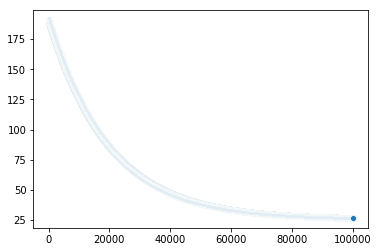

In [6]:
numIterations= 100000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations)

In [ ]:
computational efficiency (cost_) and model accuracy (parameters)